# Projet  3 : Réaliser une étude de santé publique

---
## <font color=blue>Sommaire</font>  

[Préparation des données](#preparation_donnees)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[Exploration des fichiers "FAOSTAT_vegetal.csv" et "FAOSTAT_animal.csv"](#exploration_veg_ani)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[Exploration du dataframe data obtenu en regroupant veg et ani](#exploration_data)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[Exploration du fichier "FAOSTAT_population.csv"](#exploration_population)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[Exploration du fichier "FAOSTAT_undernourishment.csv"](#exploration_undernourishment)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[Exploration du fichier "FAOSTAT_cereal.csv"](#exploration_cereal)  
  
[Mission 1 : Calcul de la population mondiale](#question01)  
[Mission 2 : Redondance d'informations dans les bilans alimentaires](#question02)  
[Mission 3 : Disponibilité alimentaire pour chaque pays et chaque produit](#question03)  
[Mission 4 : Ratios énergie/poids et pourcentage de protéines pour chaque produit](#question04)  
[Mission 5 : Cinq des vingts aliments les plus caloriques et les plus riches en protéines](#question05)  
[Mission 6 : La disponibilité intérieure en kcal des produits végétaux](#question06)  
[Mission 7 : Nombre d'humains pouvant être nourris avec la disponibilité intérieure mondiale en produits végétaux](#question07)  
[Mission 8 : Nombre d'humains pouvant être nourris avec la disponibilité alimentaire, la nourriture pour animaux et les pertes en produits végétaux](#question08)  
[Mission 9 : Nombre d'humains pouvant être nourris avec la disponibilité alimentaire mondiale ?](#question09)  
[Mission 10 : Proportion de la population mondiale considérée comme étant en sous-nutrition ?](#question10)  
[Mission 11 : Proportion de céréales destinée à l'alimentation animale](#question11)  
[Mission 12 : Les 3 produits avec les plus forts ratios Autres utilisations / Disponibilité intérieure et Nourriture animale / Nourriture totale parmi les produits les plus exportés par les pays avec des personnes en sous-nutrition](#question12)  
[Mission 13 : Tonnes de céréales libérées si les USA diminuent leur production animale de 10% ?](#question13)  
[Mission 14 : Proportion de manioc exportée et proportion de personnes en sous-nutrition en Thaïlande](#question14)  
  
[Mission 15 : Clé primaire pour la table population](#question15)  
[Mission 16 : Clé primaire pour la table dispo_alim](#question16)  
[Mission 17 : Clé primaire pour la table equilibre_prod](#question17)  
[Mission 18 : Clé primaire pour la table sous_nutrition](#question18)  
[Mission 19 : Requêtes SQL](#question19)  
[Mission 20 : Recherche sur les autres utilisations possibles de quelques produits](#question20)  
[Enrichir l'analyse](#enrichir_analyse)  
  
[Aller plus loin : missions 15 à 19 avec SQLAlchemy](#sqlalchemy)

<a id='preparation_donnees'></a>

---
## <font color=blue>Préparation des données</font>

**Importation des librairies**

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

**Définition de l'année de référence de l'étude**

In [2]:
YEAR_REFERENCE = 2013

<a id="exploration_veg_ani"></a>

**<font color=red>Exploration des fichiers "FAOSTAT_vegetal.csv" et "FAOSTAT_animal.csv"</font>**  
  
Les 2 fichiers ont la même structure. Je les explore donc en même temps.  
Je commence par un head() et un describe(include='all') pour comprendre la structure et les données.  
Je vérifie les valeurs uniques de certaines variables catégorielles.  
Je vérifie la présence de valeur NA.

In [3]:
veg = pd.read_csv("FAOSTAT_vegetal.csv")
ani = pd.read_csv("FAOSTAT_animal.csv")

In [4]:
veg.head()

Code Domaine              Domaine  Code Pays         Pays  Code Élément  \
0          FBS  Bilans Alimentaires          2  Afghanistan          5511   
1          FBS  Bilans Alimentaires          2  Afghanistan          5611   
2          FBS  Bilans Alimentaires          2  Afghanistan          5072   
3          FBS  Bilans Alimentaires          2  Afghanistan          5301   
4          FBS  Bilans Alimentaires          2  Afghanistan          5527   

                    Élément  Code Produit Produit  Code Année  Année  \
0                Production          2511     Blé        2013   2013   
1   Importations - Quantité          2511     Blé        2013   2013   
2        Variation de stock          2511     Blé        2013   2013   
3  Disponibilité intérieure          2511     Blé        2013   2013   
4                  Semences          2511     Blé        2013   2013   

                Unité  Valeur Symbole Description du Symbole  
0  Milliers de tonnes  5169.0       S  Données standardisées  
1  Milliers de tonnes  1173.0       S  Données standardisées  
2  Milliers de tonnes  -350.0       S  Données standardisées  
3  Milliers de tonnes  5992.0       S  Données standardisées  
4  Milliers de tonnes   322.0       S  Données standardisées

In [5]:
veg.describe(include='all')

Code Domaine              Domaine      Code Pays    Pays  \
count        104871               104871  104871.000000  104871   
unique            1                    1            NaN     175   
top             FBS  Bilans Alimentaires            NaN   Chine   
freq         104871               104871            NaN     860   
mean            NaN                  NaN     127.694682     NaN   
std             NaN                  NaN      75.423255     NaN   
min             NaN                  NaN       1.000000     NaN   
25%             NaN                  NaN      66.000000     NaN   
50%             NaN                  NaN     121.000000     NaN   
75%             NaN                  NaN     189.000000     NaN   
max             NaN                  NaN     351.000000     NaN   

         Code Élément                   Élément   Code Produit Produit  \
count   104871.000000                    104871  104871.000000  104871   
unique            NaN                        15            NaN      75   
top               NaN  Disponibilité intérieure            NaN    Maïs   
freq              NaN                     11747            NaN    2318   
mean      3728.248429                       NaN    2587.470998     NaN   
std       2276.474811                       NaN      61.107727     NaN   
min        645.000000                       NaN    2511.000000     NaN   
25%        674.000000                       NaN    2546.000000     NaN   
50%       5142.000000                       NaN    2575.000000     NaN   
75%       5511.000000                       NaN    2618.000000     NaN   
max       5911.000000                       NaN    2899.000000     NaN   

        Code Année     Année               Unité         Valeur Symbole  \
count     104871.0  104871.0              104871  104871.000000  104871   
unique         NaN       NaN                   4            NaN       3   
top            NaN       NaN  Milliers de tonnes            NaN       S   
freq           NaN       NaN               67783            NaN   67182   
mean        2013.0    2013.0                 NaN     321.271016     NaN   
std            0.0       0.0                 NaN    6395.039684     NaN   
min         2013.0    2013.0                 NaN  -39863.000000     NaN   
25%         2013.0    2013.0                 NaN       0.000000     NaN   
50%         2013.0    2013.0                 NaN       1.000000     NaN   
75%         2013.0    2013.0                 NaN      17.000000     NaN   
max         2013.0    2013.0                 NaN  739267.000000     NaN   

       Description du Symbole  
count                  104871  
unique                      3  
top     Données standardisées  
freq                    67182  
mean                      NaN  
std                       NaN  
min                       NaN  
25%                       NaN  
50%                       NaN  
75%                       NaN  
max                       NaN

In [6]:
veg.Produit.unique()

array(['Blé', 'Riz (Eq Blanchi)', 'Orge', 'Maïs', 'Millet',
       'Céréales, Autres', 'Pommes de Terre', 'Sucre, canne',
       'Sucre, betterave', 'Sucre Eq Brut', 'Edulcorants Autres', 'Miel',
       'Légumineuses Autres', 'Noix', 'Graines de tournesol',
       'Graines de coton', 'Coco (Incl Coprah)', 'Sésame', 'Olives',
       'Plantes Oleiferes, Autre', 'Huile de Soja', "Huile d'Arachide",
       'Huile de Tournesol', 'Huile de Colza&Moutarde',
       'Huile Graines de Coton', 'Huile de Palme', 'Huile de Sésame',
       "Huile d'Olive", 'Huil Plantes Oleif Autr', 'Tomates',
       'Légumes, Autres', 'Oranges, Mandarines', 'Agrumes, Autres',
       'Bananes', 'Pommes', 'Ananas', 'Dattes', 'Raisin',
       'Fruits, Autres', 'Café', 'Feve de Cacao', 'Thé', 'Poivre',
       'Épices, Autres', 'Vin', 'Bière', 'Boissons Alcooliques',
       'Aliments pour enfants', 'Miscellanees', 'Seigle', 'Avoine',
       'Sorgho', 'Manioc', 'Patates douces', 'Ignames', 'Racines, Nda',
       'Haricot

In [7]:
veg.Élément.unique()

array(['Production', 'Importations - Quantité', 'Variation de stock',
       'Disponibilité intérieure', 'Semences', 'Pertes', 'Nourriture',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Aliments pour animaux', 'Exportations - Quantité', 'Traitement',
       'Autres Utilisations'], dtype=object)

In [8]:
veg.isna().sum()

Code Domaine              0
Domaine                   0
Code Pays                 0
Pays                      0
Code Élément              0
Élément                   0
Code Produit              0
Produit                   0
Code Année                0
Année                     0
Unité                     0
Valeur                    0
Symbole                   0
Description du Symbole    0
dtype: int64

In [9]:
ani.head()

Code Domaine              Domaine  Code Pays         Pays  Code Élément  \
0          FBS  Bilans Alimentaires          2  Afghanistan          5511   
1          FBS  Bilans Alimentaires          2  Afghanistan          5611   
2          FBS  Bilans Alimentaires          2  Afghanistan          5301   
3          FBS  Bilans Alimentaires          2  Afghanistan          5142   
4          FBS  Bilans Alimentaires          2  Afghanistan           645   

                                             Élément  Code Produit  \
0                                         Production          2731   
1                            Importations - Quantité          2731   
2                           Disponibilité intérieure          2731   
3                                         Nourriture          2731   
4  Disponibilité alimentaire en quantité (kg/pers...          2731   

            Produit  Code Année  Année               Unité  Valeur Symbole  \
0  Viande de Bovins        2013   2013  Milliers de tonnes  134.00       S   
1  Viande de Bovins        2013   2013  Milliers de tonnes    6.00       S   
2  Viande de Bovins        2013   2013  Milliers de tonnes  140.00       S   
3  Viande de Bovins        2013   2013  Milliers de tonnes  140.00       S   
4  Viande de Bovins        2013   2013                  kg    4.59      Fc   

  Description du Symbole  
0  Données standardisées  
1  Données standardisées  
2  Données standardisées  
3  Données standardisées  
4        Donnée calculée

In [10]:
ani.describe(include='all')

Code Domaine              Domaine     Code Pays   Pays  Code Élément  \
count         37166                37166  37166.000000  37166  37166.000000   
unique            1                    1           NaN    175           NaN   
top             FBS  Bilans Alimentaires           NaN  Chine           NaN   
freq          37166                37166           NaN    258           NaN   
mean            NaN                  NaN    126.800839    NaN   3511.032718   
std             NaN                  NaN     74.767139    NaN   2332.283315   
min             NaN                  NaN      1.000000    NaN    645.000000   
25%             NaN                  NaN     63.000000    NaN    674.000000   
50%             NaN                  NaN    121.000000    NaN   5142.000000   
75%             NaN                  NaN    189.000000    NaN   5511.000000   
max             NaN                  NaN    351.000000    NaN   5911.000000   

                         Élément  Code Produit             Produit  \
count                      37166  37166.000000               37166   
unique                        15           NaN                  23   
top     Disponibilité intérieure           NaN  Lait - Excl Beurre   
freq                        3731           NaN                2128   
mean                         NaN   2758.421191                 NaN   
std                          NaN     27.454449                 NaN   
min                          NaN   2731.000000                 NaN   
25%                          NaN   2736.000000                 NaN   
50%                          NaN   2762.000000                 NaN   
75%                          NaN   2767.000000                 NaN   
max                          NaN   2848.000000                 NaN   

        Code Année    Année               Unité         Valeur Symbole  \
count      37166.0  37166.0               37166   37166.000000   37166   
unique         NaN      NaN                   4            NaN       3   
top            NaN      NaN  Milliers de tonnes            NaN       S   
freq           NaN      NaN               22296            NaN   22126   
mean        2013.0   2013.0                 NaN     148.291647     NaN   
std            0.0      0.0                 NaN    1933.728473     NaN   
min         2013.0   2013.0                 NaN   -1368.000000     NaN   
25%         2013.0   2013.0                 NaN       0.000000     NaN   
50%         2013.0   2013.0                 NaN       1.000000     NaN   
75%         2013.0   2013.0                 NaN      11.000000     NaN   
max         2013.0   2013.0                 NaN  135600.000000     NaN   

       Description du Symbole  
count                   37166  
unique                      3  
top     Données standardisées  
freq                    22126  
mean                      NaN  
std                       NaN  
min                       NaN  
25%                       NaN  
50%                       NaN  
75%                       NaN  
max                       NaN

In [11]:
ani.Produit.unique()

array(['Viande de Bovins', "Viande d'Ovins/Caprins",
       'Viande de Volailles', 'Viande, Autre', 'Abats Comestible',
       'Beurre, Ghee', 'Crème', 'Graisses Animales Crue', 'Oeufs',
       'Lait - Excl Beurre', 'Poissons Eau Douce', 'Viande de Suides',
       'Huiles de Poissons', 'Huiles de Foie de Poisso', 'Perciform',
       'Poissons Pelagiques', 'Poissons Marins, Autres', 'Crustacés',
       'Cephalopodes', 'Mollusques, Autres', 'Animaux Aquatiques Autre',
       'Plantes Aquatiques', 'Viande de Anim Aquatiq'], dtype=object)

In [12]:
ani.Élément.unique()

array(['Production', 'Importations - Quantité',
       'Disponibilité intérieure', 'Nourriture',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Semences', 'Pertes', 'Exportations - Quantité',
       'Aliments pour animaux', 'Autres Utilisations',
       'Variation de stock', 'Traitement'], dtype=object)

In [13]:
ani.isna().sum()

Code Domaine              0
Domaine                   0
Code Pays                 0
Pays                      0
Code Élément              0
Élément                   0
Code Produit              0
Produit                   0
Code Année                0
Année                     0
Unité                     0
Valeur                    0
Symbole                   0
Description du Symbole    0
dtype: int64

**Pour les clés primaires des tableaux veg et ani**, je privilégie des champs numériques de code. Ma clé primaire peut être l'index car il est unique pour chaque ligne. La clé primaire peut aussi être la combinaison des champs : Code Pays, Code Elément, Code Produit et Code Année.

<a id="exploration_data"></a>

**<font color=red>Exploration du dataframe data obtenu en regroupant veg et ani</font>**

In [14]:
# regrouper veg et ani
veg["origin"] = "vegetal"
ani["origin"] = "animal"
temp = ani.append(veg)

In [15]:
# on supprime veg et ani
del ani, veg

In [16]:
temp.head()

Code Domaine              Domaine  Code Pays         Pays  Code Élément  \
0          FBS  Bilans Alimentaires          2  Afghanistan          5511   
1          FBS  Bilans Alimentaires          2  Afghanistan          5611   
2          FBS  Bilans Alimentaires          2  Afghanistan          5301   
3          FBS  Bilans Alimentaires          2  Afghanistan          5142   
4          FBS  Bilans Alimentaires          2  Afghanistan           645   

                                             Élément  Code Produit  \
0                                         Production          2731   
1                            Importations - Quantité          2731   
2                           Disponibilité intérieure          2731   
3                                         Nourriture          2731   
4  Disponibilité alimentaire en quantité (kg/pers...          2731   

            Produit  Code Année  Année               Unité  Valeur Symbole  \
0  Viande de Bovins        2013   2013  Milliers de tonnes  134.00       S   
1  Viande de Bovins        2013   2013  Milliers de tonnes    6.00       S   
2  Viande de Bovins        2013   2013  Milliers de tonnes  140.00       S   
3  Viande de Bovins        2013   2013  Milliers de tonnes  140.00       S   
4  Viande de Bovins        2013   2013                  kg    4.59      Fc   

  Description du Symbole  origin  
0  Données standardisées  animal  
1  Données standardisées  animal  
2  Données standardisées  animal  
3  Données standardisées  animal  
4        Donnée calculée  animal

In [17]:
# on renomme les colonnes de temp en vérifiant leur ordre avec le head ci-dessus
temp.columns = ["xx","xx2","country_code","country","xx3","element","item_code",
                "item","xx4","year","unit","value","xx5","xx6","origin"]

# on vérifie le résultat avec un nouveau head
temp.head()

xx                  xx2  country_code      country   xx3  \
0  FBS  Bilans Alimentaires             2  Afghanistan  5511   
1  FBS  Bilans Alimentaires             2  Afghanistan  5611   
2  FBS  Bilans Alimentaires             2  Afghanistan  5301   
3  FBS  Bilans Alimentaires             2  Afghanistan  5142   
4  FBS  Bilans Alimentaires             2  Afghanistan   645   

                                             element  item_code  \
0                                         Production       2731   
1                            Importations - Quantité       2731   
2                           Disponibilité intérieure       2731   
3                                         Nourriture       2731   
4  Disponibilité alimentaire en quantité (kg/pers...       2731   

               item   xx4  year                unit   value xx5  \
0  Viande de Bovins  2013  2013  Milliers de tonnes  134.00   S   
1  Viande de Bovins  2013  2013  Milliers de tonnes    6.00   S   
2  Viande de Bovins  2013  2013  Milliers de tonnes  140.00   S   
3  Viande de Bovins  2013  2013  Milliers de tonnes  140.00   S   
4  Viande de Bovins  2013  2013                  kg    4.59  Fc   

                     xx6  origin  
0  Données standardisées  animal  
1  Données standardisées  animal  
2  Données standardisées  animal  
3  Données standardisées  animal  
4        Donnée calculée  animal

In [18]:
# on tranforme temp en table pivot
data = temp.pivot_table(index = ["country_code","country","item_code","item","year","origin"],\
                       columns = ["element"], values = ["value"], aggfunc=sum)

# on vérifie data avec un head avant de renommer les colonnes
data.head()

value  \
element                                            Aliments pour animaux   
country_code country item_code item   year origin                          
1            Arménie 2511      Blé    2013 vegetal                  93.0   
                     2513      Orge   2013 vegetal                 137.0   
                     2514      Maïs   2013 vegetal                  96.0   
                     2515      Seigle 2013 vegetal                   1.0   
                     2516      Avoine 2013 vegetal                   4.0   

                                                                        \
element                                            Autres Utilisations   
country_code country item_code item   year origin                        
1            Arménie 2511      Blé    2013 vegetal                 0.0   
                     2513      Orge   2013 vegetal                26.0   
                     2514      Maïs   2013 vegetal                 NaN   
                     2515      Seigle 2013 vegetal                 NaN   
                     2516      Avoine 2013 vegetal                 NaN   

                                                                                                   \
element                                            Disponibilité alimentaire (Kcal/personne/jour)   
country_code country item_code item   year origin                                                   
1            Arménie 2511      Blé    2013 vegetal                                         1024.0   
                     2513      Orge   2013 vegetal                                            0.0   
                     2514      Maïs   2013 vegetal                                            0.0   
                     2515      Seigle 2013 vegetal                                            1.0   
                     2516      Avoine 2013 vegetal                                            2.0   

                                                                                                           \
element                                            Disponibilité alimentaire en quantité (kg/personne/an)   
country_code country item_code item   year origin                                                           
1            Arménie 2511      Blé    2013 vegetal                                             130.60       
                     2513      Orge   2013 vegetal                                               0.00       
                     2514      Maïs   2013 vegetal                                               0.03       
                     2515      Seigle 2013 vegetal                                               0.12       
                     2516      Avoine 2013 vegetal                                               0.37       

                                                                                                                  \
element                                            Disponibilité de matière grasse en quantité (g/personne/jour)   
country_code country item_code item   year origin                                                                  
1            Arménie 2511      Blé    2013 vegetal                                               3.60              
                     2513      Orge   2013 vegetal                                               0.00              
                     2514      Maïs   2013 vegetal                                                NaN              
                     2515      Seigle 2013 vegetal                                               0.00              
                     2516      Avoine 2013 vegetal                                               0.03              

                                                                                                             \
element                                            Disponibilité de protéines en quantité (g/personne/jour)   
country_code country item_code i

In [19]:
# on renomme les colonnes (attention à la colonne sur les matières grasses en plus - je la conserve au cas où)
data.columns = ["feed","other_uses","food_supply_kcalcapitaday","food_supply_quantity_kgcapitayr",
                "fat_supply_quantity_gcapitaday","protein_supply_quantity_gcapitaday", "domestic_supply",
                "export_quantity","import_quantity","food","waste","production","seed","processing","stock_variation"]
data = data.reset_index()
# on vérifie avec head
data.head()

country_code  country  item_code    item  year   origin   feed  other_uses  \
0             1  Arménie       2511     Blé  2013  vegetal   93.0         0.0   
1             1  Arménie       2513    Orge  2013  vegetal  137.0        26.0   
2             1  Arménie       2514    Maïs  2013  vegetal   96.0         NaN   
3             1  Arménie       2515  Seigle  2013  vegetal    1.0         NaN   
4             1  Arménie       2516  Avoine  2013  vegetal    4.0         NaN   

   food_supply_kcalcapitaday  food_supply_quantity_kgcapitayr  ...  \
0                     1024.0                           130.60  ...   
1                        0.0                             0.00  ...   
2                        0.0                             0.03  ...   
3                        1.0                             0.12  ...   
4                        2.0                             0.37  ...   

   protein_supply_quantity_gcapitaday  domestic_supply  export_quantity  \
0                               30.52            554.0              1.0   
1                                0.00            198.0              0.0   
2                                0.01            102.0              NaN   
3                                0.02              1.0              NaN   
4                                0.09              6.0              NaN   

   import_quantity   food  waste  production  seed  processing  \
0            361.0  389.0   32.0       312.0  30.0        10.0   
1              9.0    0.0   15.0       189.0  14.0         7.0   
2             82.0    0.0    7.0        21.0   0.0         NaN   
3              0.0    0.0    0.0         1.0   0.0         NaN   
4              1.0    1.0    0.0         5.0   0.0         NaN   

   stock_variation  
0           -118.0  
1              0.0  
2              NaN  
3              0.0  
4              NaN  

[5 rows x 21 columns]

In [20]:
# on explore le tableau obtenu, selon la même méthode que précedemment
data.describe(include='all')

country_code country     item_code   item     year   origin  \
count   15702.000000   15702  15702.000000  15702  15702.0    15702   
unique           NaN     175           NaN     98      NaN        2   
top              NaN   Chine           NaN   Café      NaN  vegetal   
freq             NaN      97           NaN    175      NaN    11971   
mean      126.728570     NaN   2631.356133    NaN   2013.0      NaN   
std        75.037989     NaN     91.749548    NaN      0.0      NaN   
min         1.000000     NaN   2511.000000    NaN   2013.0      NaN   
25%        63.000000     NaN   2558.000000    NaN   2013.0      NaN   
50%       121.000000     NaN   2613.000000    NaN   2013.0      NaN   
75%       189.000000     NaN   2732.000000    NaN   2013.0      NaN   
max       351.000000     NaN   2899.000000    NaN   2013.0      NaN   

                 feed     other_uses  food_supply_kcalcapitaday  \
count     2757.000000    5571.000000               14333.000000   
unique            NaN            NaN                        NaN   
top               NaN            NaN                        NaN   
freq              NaN            NaN                        NaN   
mean       600.490388     169.822474                  34.783646   
std       5275.296919    5068.461345                 107.286928   
min          0.000000       0.000000                 -21.000000   
25%          0.000000       0.000000                   0.000000   
50%          5.000000       0.000000                   4.000000   
75%         79.000000       5.000000                  21.000000   
max     153802.000000  347309.000000                1711.000000   

        food_supply_quantity_kgcapitayr  ...  \
count                      14107.000000  ...   
unique                              NaN  ...   
top                                 NaN  ...   
freq                                NaN  ...   
mean                           8.726097  ...   
std                           24.687642  ...   
min                           -1.930000  ...   
25%                            0.060000  ...   
50%                            0.830000  ...   
75%                            5.190000  ...   
max                          430.760000  ...   

        protein_supply_quantity_gcapitaday  domestic_supply  export_quantity  \
count                         11641.000000     15478.000000     12320.000000   
unique                                 NaN              NaN              NaN   
top                                    NaN              NaN              NaN   
freq                                   NaN              NaN              NaN   
mean                              1.223622       770.038442       113.088636   
std                               3.595607     10342.095619      1053.744877   
min                              -0.370000     -3430.000000       -41.000000   
25%                               0.010000         0.000000         0.000000   
50%                               0.100000         7.000000         0.000000   
75%                               0.660000        81.000000         9.000000   
max                              54.970000    739267.000000     42797.000000   

        import_quantity           food         waste     production  \
count      14946.000000   14107.000000   4329.000000    9271.000000   
unique              NaN            NaN           NaN            NaN   
top                 NaN            NaN           NaN            NaN   
freq                NaN            NaN           NaN            NaN   
mean          98.805701     435.751896    125.677062    1289.361126   
std          941.446680    5988.714416   1268.864033   13638.213889   
min         -201.000000    -246.000000      0.000000       0.000000   
25%            0.000000       0.000000      0.000000       2.000000   
50%            2.000000       5.000000      4.000000      23.000000   
75%           18.000000      55.000000     27.000000     201.000000   
max        65564.000000  430046

In [21]:
data.item.unique()

array(['Blé', 'Orge', 'Maïs', 'Seigle', 'Avoine', 'Millet', 'Sorgho',
       'Céréales, Autres', 'Pommes de Terre', 'Manioc', 'Racines, Nda',
       'Sucre, betterave', 'Sucre Eq Brut', 'Edulcorants Autres',
       'Haricots', 'Pois', 'Légumineuses Autres', 'Noix', 'Soja',
       'Arachides Decortiquees', 'Graines de tournesol',
       'Graines Colza/Moutarde', 'Coco (Incl Coprah)', 'Sésame', 'Olives',
       'Plantes Oleiferes, Autre', 'Huile de Soja', "Huile d'Arachide",
       'Huile de Tournesol', 'Huile de Colza&Moutarde',
       'Huile Graines de Coton', 'Huile de Palmistes', 'Huile de Palme',
       'Huile de Coco', 'Huile de Sésame', "Huile d'Olive",
       'Huile de Germe de Maïs', 'Huil Plantes Oleif Autr', 'Tomates',
       'Oignons', 'Légumes, Autres', 'Oranges, Mandarines',
       'Citrons & Limes', 'Pamplemousse', 'Agrumes, Autres', 'Bananes',
       'Bananes plantains', 'Pommes', 'Ananas', 'Dattes', 'Raisin',
       'Fruits, Autres', 'Café', 'Feve de Cacao', 'Thé', 'Poiv

In [22]:
data.isna().sum()

country_code                              0
country                                   0
item_code                                 0
item                                      0
year                                      0
origin                                    0
feed                                  12945
other_uses                            10131
food_supply_kcalcapitaday              1369
food_supply_quantity_kgcapitayr        1595
fat_supply_quantity_gcapitaday         3825
protein_supply_quantity_gcapitaday     4061
domestic_supply                         224
export_quantity                        3382
import_quantity                         756
food                                   1595
waste                                 11373
production                             6431
seed                                  13587
processing                            13374
stock_variation                        8845
dtype: int64

**Je constate** de nombreuses valeurs nulles pour certaines colonnes.  
Les colonnes feed, other_uses, domestic_supply, export_quantity, import_quantity, food, waste, production, seed, processing, stock_variation sont exprimées en milliers de tonnes. Je crée des colonnes, avec les mêmes noms complétés de \_kg, exprimées en kg en multipliant par les données par 1 million.

In [23]:
data["feed_kg"] = data.feed * 1000000
data["other_uses_kg"] = data.other_uses * 1000000
data["domestic_supply_kg"] = data.domestic_supply * 1000000
data["export_quantity_kg"] = data.export_quantity * 1000000
data["import_quantity_kg"] = data.import_quantity * 1000000
data["food_kg"] = data.food * 1000000
data["waste_kg"] = data.waste * 1000000
data["production_kg"] = data.production * 1000000
data["seed_kg"] = data.seed * 1000000
data["processing_kg"] = data.processing * 1000000
data["stock_variation_kg"] = data.stock_variation * 1000000

**Le dataframe data peut avoir deux clés primaires** : l'index ou la combinaison des champs country_code, item_code et year  
  
  

<a id="exploration_population"></a>

**<font color=red>Exploration du fichier "FAOSTAT_population.csv"</font>**

In [24]:
pop1 = pd.read_csv("FAOSTAT_population.csv")
pop1.head()

Code Domaine              Domaine  Code Pays            Pays  Code Élément  \
0          FBS  Bilans Alimentaires          2     Afghanistan           511   
1          FBS  Bilans Alimentaires        202  Afrique du Sud           511   
2          FBS  Bilans Alimentaires          3         Albanie           511   
3          FBS  Bilans Alimentaires          4         Algérie           511   
4          FBS  Bilans Alimentaires         79       Allemagne           511   

             Élément  Code Produit     Produit  Code Année  Année  \
0  Population totale          2501  Population        2013   2013   
1  Population totale          2501  Population        2013   2013   
2  Population totale          2501  Population        2013   2013   
3  Population totale          2501  Population        2013   2013   
4  Population totale          2501  Population        2013   2013   

            Unité  Valeur Symbole Description du Symbole  
0  1000 personnes   30552     NaN      Donnée officielle  
1  1000 personnes   52776     NaN      Donnée officielle  
2  1000 personnes    3173     NaN      Donnée officielle  
3  1000 personnes   39208     NaN      Donnée officielle  
4  1000 personnes   82727     NaN      Donnée officielle

In [25]:
pop1.describe(include='all')

Code Domaine              Domaine   Code Pays    Pays  Code Élément  \
count           175                  175  175.000000     175         175.0   
unique            1                    1         NaN     175           NaN   
top             FBS  Bilans Alimentaires         NaN  Israël           NaN   
freq            175                  175         NaN       1           NaN   
mean            NaN                  NaN  126.720000     NaN         511.0   
std             NaN                  NaN   75.168519     NaN           0.0   
min             NaN                  NaN    1.000000     NaN         511.0   
25%             NaN                  NaN   64.500000     NaN         511.0   
50%             NaN                  NaN  121.000000     NaN         511.0   
75%             NaN                  NaN  188.500000     NaN         511.0   
max             NaN                  NaN  351.000000     NaN         511.0   

                  Élément  Code Produit     Produit  Code Année   Année  \
count                 175         175.0         175       175.0   175.0   
unique                  1           NaN           1         NaN     NaN   
top     Population totale           NaN  Population         NaN     NaN   
freq                  175           NaN         175         NaN     NaN   
mean                  NaN        2501.0         NaN      2013.0  2013.0   
std                   NaN           0.0         NaN         0.0     0.0   
min                   NaN        2501.0         NaN      2013.0  2013.0   
25%                   NaN        2501.0         NaN      2013.0  2013.0   
50%                   NaN        2501.0         NaN      2013.0  2013.0   
75%                   NaN        2501.0         NaN      2013.0  2013.0   
max                   NaN        2501.0         NaN      2013.0  2013.0   

                 Unité        Valeur Symbole Description du Symbole  
count              175  1.750000e+02       1                    175  
unique               1           NaN       1                      2  
top     1000 personnes           NaN       A      Donnée officielle  
freq               175           NaN       1                    174  
mean               NaN  4.807996e+04     NaN                    NaN  
std                NaN  1.786327e+05     NaN                    NaN  
min                NaN  5.400000e+01     NaN                    NaN  
25%                NaN  2.543500e+03     NaN                    NaN  
50%                NaN  9.413000e+03     NaN                    NaN  
75%                NaN  2.888150e+04     NaN                    NaN  
max                NaN  1.416667e+06     NaN                    NaN

In [26]:
pop1.isna().sum()

Code Domaine                0
Domaine                     0
Code Pays                   0
Pays                        0
Code Élément                0
Élément                     0
Code Produit                0
Produit                     0
Code Année                  0
Année                       0
Unité                       0
Valeur                      0
Symbole                   174
Description du Symbole      0
dtype: int64

**Je simplifie le tableau pop1 en ne gardant que les champs utiles.**  
  
Domaine, Elément, Produit ont la même valeur pour toutes les lignes -> on peut supprimer ces colonnes et les codes associés.  
La colonne Symbole n'est renseigné que pour 1 ligne et ne semble pas apporter d'information importante - > on peut aussi la supprimer.  
  
Dans notre cas, nous n'avons qu'une année, mais je garde cette colonne car elle est significative, et nous pourrions dans le futur avoir plusieurs années.  

**Je crée une colonne population** qui multiplie la colonne value par son unité (1000). Puis je supprime les colonnes value et unit.

In [27]:
pop1 = pop1[["Code Pays","Pays","Année","Valeur","Unité"]]
pop1.columns = ["country_code","country","year","value","unit"]

pop1["population"] = pop1.value * 1000
pop1.drop(columns=["value","unit"], inplace=True)
pop1.head()

country_code         country  year  population
0             2     Afghanistan  2013    30552000
1           202  Afrique du Sud  2013    52776000
2             3         Albanie  2013     3173000
3             4         Algérie  2013    39208000
4            79       Allemagne  2013    82727000

**Le dataframe pop1 peut avoir deux clés primaires** : l'index ou la combinaison des champs country_code et year

<a id="exploration_undernourishment"></a>

**<font color=red>Exploration du fichier "FAOSTAT_undernourishment.csv"</font>**

In [28]:
und = pd.read_csv("FAOSTAT_undernourishment.csv")
und.head()

Code Domaine                             Domaine  Code zone            Zone  \
0           FS  Données de la sécurité alimentaire          2     Afghanistan   
1           FS  Données de la sécurité alimentaire          2     Afghanistan   
2           FS  Données de la sécurité alimentaire          2     Afghanistan   
3           FS  Données de la sécurité alimentaire          2     Afghanistan   
4           FS  Données de la sécurité alimentaire        202  Afrique du Sud   

   Code Élément Élément  Code Produit  \
0          6132  Valeur        210011   
1          6132  Valeur        210011   
2          6132  Valeur        210011   
3          6132  Valeur        210011   
4          6132  Valeur        210011   

                                             Produit  Code année      Année  \
0  Nombre de personnes sous-alimentées (millions)...    20122014  2012-2014   
1  Nombre de personnes sous-alimentées (millions)...    20132015  2013-2015   
2  Nombre de personnes sous-alimentées (millions)...    20142016  2014-2016   
3  Nombre de personnes sous-alimentées (millions)...    20152017  2015-2017   
4  Nombre de personnes sous-alimentées (millions)...    20122014  2012-2014   

      Unité Valeur Symbole Description du Symbole  
0  millions    8.1       F         Estimation FAO  
1  millions      9       F         Estimation FAO  
2  millions    9.9       F         Estimation FAO  
3  millions   10.5       F         Estimation FAO  
4  millions    2.6       F         Estimation FAO

In [29]:
und.describe(include='all')

Code Domaine                             Domaine   Code zone     Zone  \
count           816                                 816  816.000000      816   
unique            1                                   1         NaN      204   
top              FS  Données de la sécurité alimentaire         NaN  Grenade   
freq            816                                 816         NaN        4   
mean            NaN                                 NaN  129.264706      NaN   
std             NaN                                 NaN   76.624419      NaN   
min             NaN                                 NaN    1.000000      NaN   
25%             NaN                                 NaN   62.500000      NaN   
50%             NaN                                 NaN  127.500000      NaN   
75%             NaN                                 NaN  193.250000      NaN   
max             NaN                                 NaN  351.000000      NaN   

        Code Élément Élément  Code Produit  \
count          816.0     816         816.0   
unique           NaN       1           NaN   
top              NaN  Valeur           NaN   
freq             NaN     816           NaN   
mean          6132.0     NaN      210011.0   
std              0.0     NaN           0.0   
min           6132.0     NaN      210011.0   
25%           6132.0     NaN      210011.0   
50%           6132.0     NaN      210011.0   
75%           6132.0     NaN      210011.0   
max           6132.0     NaN      210011.0   

                                                  Produit    Code année  \
count                                                 816  8.160000e+02   
unique                                                  1           NaN   
top     Nombre de personnes sous-alimentées (millions)...           NaN   
freq                                                  816           NaN   
mean                                                  NaN  2.013702e+07   
std                                                   NaN  1.118832e+04   
min                                                   NaN  2.012201e+07   
25%                                                   NaN  2.012951e+07   
50%                                                   NaN  2.013702e+07   
75%                                                   NaN  2.014452e+07   
max                                                   NaN  2.015202e+07   

            Année     Unité Valeur Symbole Description du Symbole  
count         816       816    668     816                    816  
unique          4         1    153       2                      2  
top     2015-2017  millions   <0.1       F         Estimation FAO  
freq          204       816    156     668                    668  
mean          NaN       NaN    NaN     NaN                    NaN  
std           NaN       NaN    NaN     NaN                    NaN  
min           NaN       NaN    NaN     NaN                    NaN  
25%           NaN       NaN    NaN     NaN                    NaN  
50%           NaN       NaN    NaN     NaN                    NaN  
75%           NaN       NaN    NaN     NaN                    NaN  
max           NaN       NaN    NaN     NaN                    NaN

**Constatations** : les colonnes année et valeur ne sont pas considérées comme des valeurs numériques. Il faut étudier ces deux colonnes.  
  
Pour la colonne année, on constate qu'il s'agit d'un intervalle qui encadre l'année des données. 2012-2014 donne les données pour 2013. Il faudra créer une nouvelle colonne année à partir de cet intervalle.  
  
Pour la colonne valeur, on constate que la ligne top du describe indique une valeur avec le signe '<'. Il faudra approfondir cette piste.

In [30]:
und.isna().sum()

Code Domaine                0
Domaine                     0
Code zone                   0
Zone                        0
Code Élément                0
Élément                     0
Code Produit                0
Produit                     0
Code année                  0
Année                       0
Unité                       0
Valeur                    148
Symbole                     0
Description du Symbole      0
dtype: int64

In [31]:
und["Description du Symbole"].unique()

array(['Estimation FAO', 'Non disponible'], dtype=object)

In [32]:
und[und["Description du Symbole"] == "Non disponible"].Valeur.unique()

array([nan], dtype=object)

In [33]:
len(und[und["Description du Symbole"] == "Non disponible"])

148

**Je simplifie le tableau und en ne gardant que les champs utiles.**  
Domaine, Elément, Produit ont la même valeur pour toutes les lignes -> on peut supprimer ces colonnes et les codes associés.  
La colonne Symbole n'apporte aucune information importante : elle vaut soit "Estimation FAO" lorsqu'une valeur est renseignée, soit "Nan" lors des 148 cas où aucune valeur n'est renseignée (668 + 148 = 816) -> on peut la supprimer également.  
  
**Je crée une colonne year** qui calcule l'année au milieu de l'intervalle indiqué par interyear, puis je supprime interyear.  
  
**J'étudie les valeurs de la colonne value**.

In [34]:
# simplification
und = und[['Code zone','Zone','Année','Valeur','Unité']]
und.columns = ['country_code','country','interyear','value','unit']

# création colonne year
und['year'] = ((und.interyear.str.slice(0,4).astype(int) + und.interyear.str.slice(5,9).astype(int)) / 2).astype(int)
und = und.drop(columns='interyear')

# étude des valeurs de la colonne value
und.value.unique()

array(['8.1', '9', '9.9', '10.5', '2.6', '2.9', '3.2', '3.4', '0.2',
       '1.8', '1.9', '<2', nan, '8', '7.3', '6.9', '1.6', '1.7', '1.5',
       '0.1', '<0.6', '<0.2', '26.4', '26.2', '25.5', '24.8', '<0.1',
       '<0.3', '1', '1.1', '2.2', '2.1', '0.5', '0.6', '<5.1', '<5.2',
       '0.3', '3.5', '3.6', '3.8', '4', '2.8', '1.4', '<0.9', '137.3',
       '129.7', '125.6', '124.5', '136.2', '128.6', '124.6', '123.5',
       '0.9', '0.8', '4.2', '4.7', '4.8', '4.9', '3.9', '4.3', '4.6',
       '0.7', '0.4', '1.3', '<1.2', '<7.9', '<8', '<8.1', '24', '22.8',
       '21.9', '<3.6', '<1.6', '2', '2.4', '5.2', '5.1', '5', '213.1',
       '206.5', '199.8', '195.9', '19.1', '17.7', '18.8', '20.2', '4.1',
       '9.3', '9.7', '10.1', '10.3', '<1.5', '<3.2', '1.2', '<0.4', '9.6',
       '10.6', '11.7', '8.2', '9.1', '10', '10.7', '3.7', '5.4', '7.7',
       '8.5', '8.8', '6.5', '6', '5.7', '5.6', '2.7', '3', '12.2', '13.8',
       '16.4', '21.5', '12.6', '15.5', '17.2', '2.3', '38.4', '39.3',

**Je constate** la présence de nombreuses valeurs avec le signe '<'. Cela explique que cette colonne ne soit pas considérée comme numérique.  
Je crée une colonne is_approximate qui sera vraie pour les lignes dont la valeur contient le signe '<'.  
Puis je supprime le signe '<' et je convertis la colonne value en numérique.  

**Je crée une colonne undernourished** qui multiplie la colonne value par son unité (1 million). Pour finir, je supprime les colonnes value et unit.

In [35]:
und["is_approximate"] = und.value.str.contains("<")
und["value"] = und["value"].str.replace('<','')
und["value"] = pd.to_numeric(und["value"])

und["undernourished"] = und.value * 1000000
und.drop(columns=["value","unit"], inplace=True)
und.describe(include='all')

country_code  country        year is_approximate  undernourished
count     816.000000      816   816.00000            668    6.680000e+02
unique           NaN      204         NaN              2             NaN
top              NaN  Grenade         NaN          False             NaN
freq             NaN        4         NaN            390             NaN
mean      129.264706      NaN  2014.50000            NaN    5.442066e+06
std        76.624419      NaN     1.11872            NaN    2.127507e+07
min         1.000000      NaN  2013.00000            NaN    1.000000e+05
25%        62.500000      NaN  2013.75000            NaN    2.000000e+05
50%       127.500000      NaN  2014.50000            NaN    7.000000e+05
75%       193.250000      NaN  2015.25000            NaN    2.800000e+06
max       351.000000      NaN  2016.00000            NaN    2.131000e+08

In [36]:
und.isna().sum()

country_code        0
country             0
year                0
is_approximate    148
undernourished    148
dtype: int64

In [37]:
und.head()

country_code         country  year is_approximate  undernourished
0             2     Afghanistan  2013          False       8100000.0
1             2     Afghanistan  2014          False       9000000.0
2             2     Afghanistan  2015          False       9900000.0
3             2     Afghanistan  2016          False      10500000.0
4           202  Afrique du Sud  2013          False       2600000.0

**Le dataframe und peut avoir deux clés primaires** : l'index ou la combinaison des champs country_code et year

<a id="exploration_cereal"></a>

**<font color=red>Exploration du fichier "FAOSTAT_cereal.csv"</font>**

In [38]:
cer = pd.read_csv("FAOSTAT_cereal.csv")
cer.head()

Code Domaine              Domaine  Code Pays         Pays  Code Élément  \
0          FBS  Bilans Alimentaires          2  Afghanistan          5511   
1          FBS  Bilans Alimentaires          2  Afghanistan          5611   
2          FBS  Bilans Alimentaires          2  Afghanistan          5072   
3          FBS  Bilans Alimentaires          2  Afghanistan          5301   
4          FBS  Bilans Alimentaires          2  Afghanistan          5527   

                    Élément  Code Produit Produit  Code Année  Année  \
0                Production          2511     Blé        2013   2013   
1   Importations - Quantité          2511     Blé        2013   2013   
2        Variation de stock          2511     Blé        2013   2013   
3  Disponibilité intérieure          2511     Blé        2013   2013   
4                  Semences          2511     Blé        2013   2013   

                Unité  Valeur Symbole Description du Symbole  
0  Milliers de tonnes  5169.0       S  Données standardisées  
1  Milliers de tonnes  1173.0       S  Données standardisées  
2  Milliers de tonnes  -350.0       S  Données standardisées  
3  Milliers de tonnes  5992.0       S  Données standardisées  
4  Milliers de tonnes   322.0       S  Données standardisées

In [39]:
cer.describe(include='all')

Code Domaine              Domaine     Code Pays   Pays  Code Élément  \
count         16057                16057  16057.000000  16057  16057.000000   
unique            1                    1           NaN    175           NaN   
top             FBS  Bilans Alimentaires           NaN  Chine           NaN   
freq          16057                16057           NaN    126           NaN   
mean            NaN                  NaN    128.528243    NaN   3944.553030   
std             NaN                  NaN     75.298386    NaN   2191.371293   
min             NaN                  NaN      1.000000    NaN    645.000000   
25%             NaN                  NaN     66.000000    NaN    684.000000   
50%             NaN                  NaN    122.000000    NaN   5142.000000   
75%             NaN                  NaN    191.000000    NaN   5521.000000   
max             NaN                  NaN    351.000000    NaN   5911.000000   

                         Élément  Code Produit Produit  Code Année    Année  \
count                      16057  16057.000000   16057     16057.0  16057.0   
unique                        15           NaN       9         NaN      NaN   
top     Disponibilité intérieure           NaN    Maïs         NaN      NaN   
freq                        1500           NaN    2318         NaN      NaN   
mean                         NaN   2554.817836     NaN      2013.0   2013.0   
std                          NaN     99.697147     NaN         0.0      0.0   
min                          NaN   2511.000000     NaN      2013.0   2013.0   
25%                          NaN   2513.000000     NaN      2013.0   2013.0   
50%                          NaN   2516.000000     NaN      2013.0   2013.0   
75%                          NaN   2520.000000     NaN      2013.0   2013.0   
max                          NaN   2805.000000     NaN      2013.0   2013.0   

                     Unité         Valeur Symbole Description du Symbole  
count                16057   16057.000000   16057                  16057  
unique                   4            NaN       3                      3  
top     Milliers de tonnes            NaN       S  Données standardisées  
freq                 11132            NaN   11042                  11042  
mean                   NaN     608.890108     NaN                    NaN  
std                    NaN    6947.381722     NaN                    NaN  
min                    NaN  -39863.000000     NaN                    NaN  
25%                    NaN       0.000000     NaN                    NaN  
50%                    NaN       3.000000     NaN                    NaN  
75%                    NaN      54.620000     NaN                    NaN  
max                    NaN  353699.000000     NaN                    NaN

In [40]:
cer.isna().sum()

Code Domaine              0
Domaine                   0
Code Pays                 0
Pays                      0
Code Élément              0
Élément                   0
Code Produit              0
Produit                   0
Code Année                0
Année                     0
Unité                     0
Valeur                    0
Symbole                   0
Description du Symbole    0
dtype: int64

In [41]:
# je renomme les colonnes et supprime celles qui ne me serviront pas
cer.columns = ["domain_code","domain","country_code","country","element_code","element",
               "item_code","item","year_code","year","unit","value","symbole","symbole_description"]
cer.drop(columns=["domain_code","domain","year_code","symbole","symbole_description"], inplace=True)
cer.head()

country_code      country  element_code                   element  \
0             2  Afghanistan          5511                Production   
1             2  Afghanistan          5611   Importations - Quantité   
2             2  Afghanistan          5072        Variation de stock   
3             2  Afghanistan          5301  Disponibilité intérieure   
4             2  Afghanistan          5527                  Semences   

   item_code item  year                unit   value  
0       2511  Blé  2013  Milliers de tonnes  5169.0  
1       2511  Blé  2013  Milliers de tonnes  1173.0  
2       2511  Blé  2013  Milliers de tonnes  -350.0  
3       2511  Blé  2013  Milliers de tonnes  5992.0  
4       2511  Blé  2013  Milliers de tonnes   322.0

In [42]:
# par rapport à l'énoncé, la table céréale sert surtout à établir la liste des produits considérés
# comme des céréales (et leur code associé) - je vérifie donc les valeurs de cette colonne
cer.item.unique()

array(['Blé', 'Riz (Eq Blanchi)', 'Orge', 'Maïs', 'Millet',
       'Céréales, Autres', 'Seigle', 'Avoine', 'Sorgho'], dtype=object)

**Le dataframe cer peut avoir deux clés primaires** : l'index ou la combinaison des champs country_code, element_code, item_code et year.

**L'exploration préliminaire de mes fichiers de données est terminée.  
Je peux désormais commencer le travail d'analyse.**

<a id='question01'></a>

---
## <font color=blue>Mission 1 : Calcul de la population mondiale</font>

**Pour connaître la population**, j'utilise mon dataframe pop1 basé sur le fichier "FAOSTAT_population.csv".  
J'ai déjà simplifié sa structure en enlevant les colonnes inutiles.

Pour le calcul de la population mondiale, je somme les valeurs pour tous les pays en agrégeant par année.  
Dans ce fichier, je ne possède les valeurs que pour 2013. Mais mon analyse sera toujours valable si mes données s'enrichissent d'autres années.

In [43]:
population_mondiale = pop1[["year","population"]].groupby("year").sum()
population_mondiale.style.format("{:,.0f}")

Le nombre obtenu me semble supérieur aux chiffres officiels. Une recherche sur internet me confirme cette impression.  
Il faut vérifier s'il n'y a pas des duplicates ou des valeurs fausses.

In [44]:
# je vérifie les doublons les plus évidents : ligne entière
pop1[pop1.duplicated()]

Empty DataFrame
Columns: [country_code, country, year, population]
Index: []

In [45]:
# je vérifie les doublons sur la clé primaire country_code, year
pop1[pop1.duplicated(subset=["country_code", "year"])]

Empty DataFrame
Columns: [country_code, country, year, population]
Index: []

In [46]:
# je vérifie la liste des pays pour vérifier s'il n'y a pas un pays ou une zone de pays en doublon
pop1.country.unique()

array(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie', 'Australie', 'Autriche', 'Azerbaïdjan', 'Bahamas',
       'Bangladesh', 'Barbade', 'Bélarus', 'Belgique', 'Belize', 'Bénin',
       'Bermudes', 'Bolivie (État plurinational de)',
       'Bosnie-Herzégovine', 'Botswana', 'Brésil', 'Brunéi Darussalam',
       'Bulgarie', 'Burkina Faso', 'Cabo Verde', 'Cambodge', 'Cameroun',
       'Canada', 'Chili', 'Chine - RAS de Hong-Kong',
       'Chine - RAS de Macao', 'Chine, continentale',
       'Chine, Taiwan Province de', 'Chypre', 'Colombie', 'Congo',
       'Costa Rica', "Côte d'Ivoire", 'Croatie', 'Cuba', 'Danemark',
       'Djibouti', 'Dominique', 'Égypte', 'El Salvador',
       'Émirats arabes unis', 'Équateur', 'Espagne', 'Estonie',
       "États-Unis d'Amérique", 'Éthiopie', 'Fédération de Russie',
       'Fidji', 'Finlande', 'France', 'Gabon', 'Gambie', 'Géorgie',
       'Gha

**Je remarque l'existence de plusieurs pays avec l'intitulé Chine.**  
Je soupçonne un doublon entre Chine d'une part, et l'ensemble Hong-Kong, Macao, Chine continentale et Taiwan d'autre part. Je vérifie les codes pays et que la somme des habitants pour les deux ensembles est égale en 2013.

In [47]:
temp = pop1[pop1["country"].str.contains('Chine')]
print(temp)

     country_code                    country  year  population
33             96   Chine - RAS de Hong-Kong  2013     7204000
34            128       Chine - RAS de Macao  2013      566000
35             41        Chine, continentale  2013  1385567000
36            214  Chine, Taiwan Province de  2013    23330000
174           351                      Chine  2013  1416667000


In [48]:
print("Vérification que la somme des habitants pour les deux ensembles est égale : {} ?= {}".\
      format(temp[(temp.year == YEAR_REFERENCE) & (temp.country_code != 351)].population.sum(),\
              temp[(temp.year == YEAR_REFERENCE) & (temp.country_code == 351)].population.sum()))

Vérification que la somme des habitants pour les deux ensembles est égale : 1416667000 ?= 1416667000


**Les habitants de la Chine sont comptés en doublon.**  
Je choisis d'enlever le pays 'Chine' avec le code 351, car je pense qu'il est intéressant d'analyser distinctement les situations à Hong-Kong, Macao, Taiwan et en Chine Continentale, ces pays ou régions présentant des écarts de développement économique.  
  
**Je crée une liste des country_code de la Chine**, avec le doublon. Cela me permettra par la suite de vérifier facilement si un dataframe contient les données de la Chine en double. Et de le corriger si nécessaire.
  
Et je relance le calcul de la population mondiale.

In [49]:
# création de la liste des country_code de la Chine à partir du dataframe temp 
# composé des pays qui contiennent le mot Chine
liste_chine = temp.sort_values(by="country_code").country_code.unique()

# j'enlève la Chine dont le country_code est 351
pop1 = pop1[pop1.country_code != 351]

# je recommence le calcul de la population mondiale
population_mondiale = pop1[["year","population"]].groupby("year").sum() * 1000
population_mondiale.style.format("{:,.0f}")

<mark>**<font color=red>La population mondiale est de 6&nbsp;997&nbsp;326&nbsp;000 (6,997 milliards) personnes en 2013.</font>**</mark>

---
**<font color=blue>Pour aller plus loin : utilisation de données plus complètes de la FAO</font>**

En explorant les données mises à disposition par la FAO, j'ai remarqué l'existence d'une base de données spécifique à la population mondiale.  
A titre de curiosité, je calcule la population mondiale en 2013 et les années suivantes avec ces données (remarque : je n'ai téléchargé que l'élément "population totale").

In [50]:
pop2 = pd.read_csv("FAOSTAT_population2.csv")
pop2.head()

Code Domaine                       Domaine  Code zone         Zone  \
0           OA  Séries temporelles annuelles          2  Afghanistan   
1           OA  Séries temporelles annuelles          2  Afghanistan   
2           OA  Séries temporelles annuelles          2  Afghanistan   
3           OA  Séries temporelles annuelles          2  Afghanistan   
4           OA  Séries temporelles annuelles          2  Afghanistan   

   Code Élément            Élément  Code Produit                 Produit  \
0           511  Population totale          3010  Population-Estimations   
1           511  Population totale          3010  Population-Estimations   
2           511  Population totale          3010  Population-Estimations   
3           511  Population totale          3010  Population-Estimations   
4           511  Population totale          3010  Population-Estimations   

   Code année  Année           Unité     Valeur Symbole  \
0        2013   2013  1000 personnes  31731.688       X   
1        2014   2014  1000 personnes  32758.020       X   
2        2015   2015  1000 personnes  33736.494       X   
3        2016   2016  1000 personnes  34656.032       X   
4        2017   2017  1000 personnes  35530.081       X   

          Description du Symbole  \
0  Sources internationales sûres   
1  Sources internationales sûres   
2  Sources internationales sûres   
3  Sources internationales sûres   
4  Sources internationales sûres   

                                                Note  
0  UNDESA, Population Division – World Population...  
1  UNDESA, Population Division – World Population...  
2  UNDESA, Population Division – World Population...  
3  UNDESA, Population Division – World Population...  
4  UNDESA, Population Division – World Population...

In [51]:
pop2.describe(include = 'all')

Code Domaine                       Domaine    Code zone     Zone  \
count          1155                          1155  1155.000000     1155   
unique            1                             1          NaN      231   
top              OA  Séries temporelles annuelles          NaN  Grenade   
freq           1155                          1155          NaN        5   
mean            NaN                           NaN   132.619048      NaN   
std             NaN                           NaN    77.083719      NaN   
min             NaN                           NaN     1.000000      NaN   
25%             NaN                           NaN    67.000000      NaN   
50%             NaN                           NaN   131.000000      NaN   
75%             NaN                           NaN   196.000000      NaN   
max             NaN                           NaN   351.000000      NaN   

        Code Élément            Élément  Code Produit                 Produit  \
count         1155.0               1155        1155.0                    1155   
unique           NaN                  1           NaN                       1   
top              NaN  Population totale           NaN  Population-Estimations   
freq             NaN               1155           NaN                    1155   
mean           511.0                NaN        3010.0                     NaN   
std              0.0                NaN           0.0                     NaN   
min            511.0                NaN        3010.0                     NaN   
25%            511.0                NaN        3010.0                     NaN   
50%            511.0                NaN        3010.0                     NaN   
75%            511.0                NaN        3010.0                     NaN   
max            511.0                NaN        3010.0                     NaN   

         Code année        Année           Unité        Valeur Symbole  \
count   1155.000000  1155.000000            1155  1.155000e+03    1155   
unique          NaN          NaN               1           NaN       1   
top             NaN          NaN  1000 personnes           NaN       X   
freq            NaN          NaN            1155           NaN    1155   
mean    2015.000000  2015.000000             NaN  3.813908e+04     NaN   
std        1.414826     1.414826             NaN  1.593472e+05     NaN   
min     2013.000000  2013.000000             NaN  7.920000e-01     NaN   
25%     2014.000000  2014.000000             NaN  4.511110e+02     NaN   
50%     2015.000000  2015.000000             NaN  5.481966e+03     NaN   
75%     2016.000000  2016.000000             NaN  2.069351e+04     NaN   
max     2017.000000  2017.000000             NaN  1.441131e+06     NaN   

               Description du Symbole  \
count                            1155   
unique                              1   
top     Sources internationales sûres   
freq                             1155   
mean                              NaN   
std                               NaN   
min                               NaN   
25%                               NaN   
50%                               NaN   
75%                               NaN   
max                               NaN   

                                                     Note  
count                                                1155  
unique                                                  1  
top     UNDESA, Population Division – World Population...  
freq                                                 1155  
mean                                                  NaN  
std                                                   NaN  
min                                                   NaN  
25%                                                   NaN  
50%                                                   NaN  
75%                                                   NaN  
max                                                   NaN

In [52]:
pop2.isna().sum()

Code Domaine              0
Domaine                   0
Code zone                 0
Zone                      0
Code Élément              0
Élément                   0
Code Produit              0
Produit                   0
Code année                0
Année                     0
Unité                     0
Valeur                    0
Symbole                   0
Description du Symbole    0
Note                      0
dtype: int64

In [53]:
# Je supprime les colonnes Domaine, Eléments, Produit, Symbole et Notes qui contiennent toujours la même valeur
# je crée une colonne population à partir de value et unit, et je supprime ces deux colonnes.
pop2 = pop2[["Code zone","Zone","Année","Valeur","Unité"]]
pop2.columns = ["country_code","country","year","value","unit"]
pop2["population"] = pop2.value * 1000
pop2.drop(columns=["value","unit"], inplace=True)
pop2.head()

country_code      country  year  population
0             2  Afghanistan  2013  31731688.0
1             2  Afghanistan  2014  32758020.0
2             2  Afghanistan  2015  33736494.0
3             2  Afghanistan  2016  34656032.0
4             2  Afghanistan  2017  35530081.0

In [54]:
# je vérifie la présence du doublon pour la chine
temp = pop2[pop2.country_code.isin(liste_chine)]
print(temp.country.unique())

['Chine - RAS de Hong-Kong' 'Chine - RAS de Macao' 'Chine, continentale'
 'Chine, Taiwan Province de' 'Chine']


In [55]:
print("Vérification que la somme des habitants pour les deux ensembles est égale : {} ?= {}".\
      format(temp[(temp.year == YEAR_REFERENCE) & (temp.country_code != 351)].population.sum(),\
              temp[(temp.year == YEAR_REFERENCE) & (temp.country_code == 351)].population.sum()))

Vérification que la somme des habitants pour les deux ensembles est égale : 1413857481.9999998 ?= 1413857481.9999998


In [56]:
# j'enlève la Chine dont le country_code est 351
pop2 = pop2[pop2.country_code != 351]

# on calcule la population mondiale : somme des valeurs en regroupant par année
population_mondiale2 = pop2[["year","population"]].groupby("year").sum()
population_mondiale2.style.format("{:,.0f}")

J'obtiens une population mondiale supérieure avec cette base de données.  
Je commence par vérifier que les deux fichiers prennent en compte le même nombre de pays.

In [57]:
print ("Le fichier sur les biens alimentaires porte sur {} pays".format(len(pop1.country.unique())))
print ("Le fichier sur la population mondiale porte sur {} pays".format(len(pop2.country.unique())))

Le fichier sur les biens alimentaires porte sur 174 pays
Le fichier sur la population mondiale porte sur 230 pays


En lisant la documentation de la FAO, je me rends compte que les données sur les biens alimentaires peuvent être difficilement collectés pour certains petits pays. Ce fichier ne comporte donc pas les données de population pour tous les pays.  
  
<mark>**<font color=red>Avec le fichier spécifique à la population mondiale, j'arrive à une population de 7&nbsp;213&nbsp;211&nbsp;612 (7,213 milliards) personnes en 2013 et de 7&nbsp;550&nbsp;036&nbsp;044 (7,550 milliards) personnes en 2017.</font>**  
Je pense que ce résultat est plus proche de la réalité car il prend en compte plus de pays. Et les chiffres pour chaque pays sont plus précis : ils ne sont pas arrondis au millier.</mark>  

<mark>**<font color=red>CONCLUSION IMPORTANTE :</font> pour la suite du projet, j'utiliserai les données de population fournies par le dataframe pop2 car elles sont précises et elles couvrent un plus grand nombre de pays.**</mark>

<a id='question02'></a>

---
## <font color=blue>Mission 2 : Redondance d'informations dans les bilans alimentaires</font>

**Détermination de l'équation à 3 termes**

La définirion de la disponibilité intérieure donnée par la section "définitions et standards" du site de la FAO donne les deux premiers termes de l'équation :  
disponibilité intérieure = production + importations - exportations + variation de stock  
On remarque que cette équation définit la provenance de la disponibilité intérieure.

Les autres champs à notre disposition correspondent à des utilisations de cette disponibilité intérieure. Nous avons donc une autre équation qui définit l'utilisation de la disponibilité intérieure :  
disponibilité intérieure = semences + pertes + nourriture + aliments pour animaux + traitement + autres utilisations

<mark>**<font color=red>Nous obtenons donc l'équation à 3 termes :</font>**</mark>  
<mark>disponibilité intérieure = production + importations - exportations + variation de stock = semences + pertes + nourriture + aliments pour animaux + traitement + autres utilisations</mark>

**Vérification de l'équation avec le blé en France**

In [58]:
# je crée un dataframe qui ne contient les données que pour le blé en France en 2013
temp = data[(data["country"] == "France") & (data["item"] == "Blé") & (data.year == 2013)]
temp

country_code country  item_code item  year   origin    feed  other_uses  \
4144            68  France       2511  Blé  2013  vegetal  7822.0      2824.0   

      food_supply_kcalcapitaday  food_supply_quantity_kgcapitayr  ...  \
4144                      811.0                           108.43  ...   

      other_uses_kg  domestic_supply_kg  export_quantity_kg  \
4144   2.824000e+09        2.029800e+10        2.150200e+10   

      import_quantity_kg       food_kg     waste_kg  production_kg  \
4144        2.055000e+09  6.971000e+09  358000000.0   3.861400e+10   

          seed_kg  processing_kg  stock_variation_kg  
4144  748000000.0   1.575000e+09        1.131000e+09  

[1 rows x 32 columns]

In [59]:
disponibilite_interieure_1 = temp["domestic_supply"]
disponibilite_interieure_2 = temp["production"] + temp["import_quantity"] \
                                - temp["export_quantity"] + temp["stock_variation"]
disponibilite_interieure_3 = temp["seed"] + temp["waste"] + temp["food"] + temp["feed"] \
                                + temp["processing"] + temp["other_uses"]
print("Disponibilité intérieure du blé en France en 2013 (en milliers de tonnes) = {} = {} = {}".\
  format(disponibilite_interieure_1.values[0],disponibilite_interieure_2.values[0],disponibilite_interieure_3.values[0]))

Disponibilité intérieure du blé en France en 2013 (en milliers de tonnes) = 20298.0 = 20298.0 = 20298.0


<mark>**<font color=red>Notre équation est vérifiée par les données sur le blé en France.</font>**</mark>

<a id='question03'></a>

---
## <font color=blue>Mission 3 : Disponibilité alimentaire pour chaque pays et chaque produit</font>

**Méthodologie** :  
**Première étape** : Je supprime le doublon sur les données de la Chine (country_code == 351).  
  
**Deuxième étape** : j'effectue une jointure à gauche entre les dataframes data et pop2 sur les champs country_code et year. Cela me permet de créer une table dataclean.  
  
**Troisième étape** : je crée deux colonnes dans lesquelles je calcule les valeurs des deux disponibilités alimentaires.  
food_supply = food_supply_kcalcapitaday * population * 365 (jours)  
protein_supply_quantity = protein_supply_quantity_gcapitaday * population * 365 (jours) * 0.001 (g en kg)  
  
**Quatrième étape** : je crée sur les données de l'année de référence une première table pivot pour afficher la disponibilité alimentaire en kcal et une deuxième table pivot pour afficher la disponibilité alimentaire en kg de protéines.

In [60]:
# première étape : préparation du dataframe data
data = data[data["country_code"] != 351]

In [61]:
# deuxième étape : jointure
dataclean = pd.merge(data, pop2[["country_code","year","population"]], how="left", on=["country_code","year"])
dataclean.describe(include='all')

country_code country     item_code   item     year   origin  \
count   15605.000000   15605  15605.000000  15605  15605.0    15605   
unique           NaN     174           NaN     98      NaN        2   
top              NaN    Inde           NaN   Café      NaN  vegetal   
freq             NaN      97           NaN    174      NaN    11896   
mean      125.334508     NaN   2631.376610    NaN   2013.0      NaN   
std        73.151148     NaN     91.753174    NaN      0.0      NaN   
min         1.000000     NaN   2511.000000    NaN   2013.0      NaN   
25%        63.000000     NaN   2558.000000    NaN   2013.0      NaN   
50%       120.000000     NaN   2613.000000    NaN   2013.0      NaN   
75%       188.000000     NaN   2732.000000    NaN   2013.0      NaN   
max       276.000000     NaN   2899.000000    NaN   2013.0      NaN   

                 feed     other_uses  food_supply_kcalcapitaday  \
count     2720.000000    5496.000000               14241.000000   
unique            NaN            NaN                        NaN   
top               NaN            NaN                        NaN   
freq              NaN            NaN                        NaN   
mean       479.501838     157.391376                  34.789832   
std       4240.119637    5076.785816                 107.287655   
min          0.000000       0.000000                 -21.000000   
25%          0.000000       0.000000                   0.000000   
50%          4.000000       0.000000                   4.000000   
75%         74.000000       4.000000                  21.000000   
max     150000.000000  347309.000000                1711.000000   

        food_supply_quantity_kgcapitayr  ...  domestic_supply_kg  \
count                      14015.000000  ...        1.538200e+04   
unique                              NaN  ...                 NaN   
top                                 NaN  ...                 NaN   
freq                                NaN  ...                 NaN   
mean                           8.719368  ...        6.402935e+08   
std                           24.618223  ...        9.067267e+09   
min                           -1.930000  ...       -3.430000e+09   
25%                            0.060000  ...        0.000000e+00   
50%                            0.830000  ...        7.000000e+06   
75%                            5.190000  ...        7.675000e+07   
max                          430.760000  ...        7.392670e+11   

        export_quantity_kg  import_quantity_kg       food_kg      waste_kg  \
count         1.222600e+04        1.485200e+04  1.401500e+04  4.278000e+03   
unique                 NaN                 NaN           NaN           NaN   
top                    NaN                 NaN           NaN           NaN   
freq                   NaN                 NaN           NaN           NaN   
mean          1.105969e+08        8.726454e+07  3.479314e+08  1.060538e+08   
std           1.053319e+09        7.173727e+08  4.475704e+09  1.113100e+09   
min          -4.100000e+07       -2.010000e+08 -2.460000e+08  0.000000e+00   
25%           0.000000e+00        0.000000e+00  0.000000e+00  0.000000e+00   
50%           0.000000e+00        2.000000e+06  5.000000e+06  4.000000e+06   
75%           9.000000e+06        1.800000e+07  5.200000e+07  2.600000e+07   
max           4.279700e+10        6.338100e+10  4.268500e+11  5.504700e+10   

        production_kg       seed_kg  processing_kg  stock_variation_kg  \
count    9.180000e+03  2.091000e+03   2.292000e+03        6.776000e+03   
unique            NaN           NaN            NaN                 NaN   
top               NaN           NaN            NaN                 NaN   
freq              NaN           NaN            NaN                 NaN   
mean     1.090379e+09  7.397465e+07   9.619053e+08       -1.540762e+07   
std      1.206734e+10  5.280692e+08   1.038180e+10        5.498345e+08   
min      0.000000e+00  0.000000e+00  -1.900000e+07       -3.986300e+10   
25% 

In [62]:
# troisième étape : calcul des 2 colonnes supplémentaires
dataclean["food_supply_kcal"] = dataclean.food_supply_kcalcapitaday.values * dataclean.population.values * 365
dataclean["protein_supply_quantity_kg"] = dataclean.protein_supply_quantity_gcapitaday.values \
                                            * dataclean.population.values * 365 * 0.001
dataclean[["country","year","item","food_supply_kcal","protein_supply_quantity_kg"]].head()

country  year    item  food_supply_kcal  protein_supply_quantity_kg
0  Arménie  2013     Blé      1.081478e+12                3.223311e+07
1  Arménie  2013    Orge      0.000000e+00                0.000000e+00
2  Arménie  2013    Maïs      0.000000e+00                1.056131e+04
3  Arménie  2013  Seigle      1.056131e+09                2.112262e+04
4  Arménie  2013  Avoine      2.112262e+09                9.505177e+04

In [63]:
# quatrième étape : les tables pivots
disponibilite_alimentaire_kcal = dataclean[dataclean.year == YEAR_REFERENCE].\
        pivot_table("food_supply_kcal",index="country",columns="item").style.format("{:,.0f}")
disponibilite_alimentaire_kgprotein = dataclean[dataclean.year == YEAR_REFERENCE].\
        pivot_table("protein_supply_quantity_kg",index="country",columns="item").style.format("{:,.0f}")

<mark>**<font color=red>Tableau de la disponibilité en kcal pour chaque pays et chaque produit :</font>**</mark>

In [64]:
disponibilite_alimentaire_kcal

<mark>**<font color=red>Tableau de la disponibilité en kg de protéines pour chaque pays et chaque produit :</font>**</mark>

In [65]:
disponibilite_alimentaire_kgprotein

<a id='question04'></a>

---
## <font color=blue>Mission 4 : Ratios énergie/poids et pourcentage de protéines pour chaque produit</font>

**Définition des équations**  
  
L'équation de définition de la disponiblité alimentaire est :  
food_supply_kcalcapitaday = food_kg * ratio(énergie/poids) / population / 365  
  
Ce qui permet de calculer le ratio(énergie/poids) avec la simple division suivante :  
ratio(énergie/poids) = food_supply_kcal / food_kg  
  
Pour le pourcentage de protéines, avec le raisonnement identique on obtient l'équation :  
pourcentage de protéines : protein_supply_quantity_kg / food_kg  
  
**Actions à mener**  
Je commence par remplacer les valeurs égales à 0 par des NaN (valeurs non disponibles) afin de ne pas fausser les résultats en cas de division par 0, de calcul de moyennes, etc.  
Puis j'ajoute deux colonnes ratio_energie_poids et pourcentage_proteines à mon dataframe data avec les calculs des ratios.

In [66]:
# je remplace les 0 par des NaN dans mon dataframe dataclean, et je vérifie mon dataframe
dataclean.replace(0.0,np.nan, inplace=True)
dataclean.head(20)

country_code  country  item_code                    item  year   origin  \
0              1  Arménie       2511                     Blé  2013  vegetal   
1              1  Arménie       2513                    Orge  2013  vegetal   
2              1  Arménie       2514                    Maïs  2013  vegetal   
3              1  Arménie       2515                  Seigle  2013  vegetal   
4              1  Arménie       2516                  Avoine  2013  vegetal   
5              1  Arménie       2517                  Millet  2013  vegetal   
6              1  Arménie       2518                  Sorgho  2013  vegetal   
7              1  Arménie       2520        Céréales, Autres  2013  vegetal   
8              1  Arménie       2531         Pommes de Terre  2013  vegetal   
9              1  Arménie       2532                  Manioc  2013  vegetal   
10             1  Arménie       2534            Racines, Nda  2013  vegetal   
11             1  Arménie       2537        Sucre, betterave  2013  vegetal   
12             1  Arménie       2542           Sucre Eq Brut  2013  vegetal   
13             1  Arménie       2543      Edulcorants Autres  2013  vegetal   
14             1  Arménie       2546                Haricots  2013  vegetal   
15             1  Arménie       2547                    Pois  2013  vegetal   
16             1  Arménie       2549     Légumineuses Autres  2013  vegetal   
17             1  Arménie       2551                    Noix  2013  vegetal   
18             1  Arménie       2555                    Soja  2013  vegetal   
19             1  Arménie       2556  Arachides Decortiquees  2013  vegetal   

     feed  other_uses  food_supply_kcalcapitaday  \
0    93.0         NaN                     1024.0   
1   137.0        26.0                        NaN   
2    96.0         NaN                        NaN   
3     1.0         NaN                        1.0   
4     4.0         NaN                        2.0   
5     NaN         NaN                        NaN   
6     NaN         NaN                        NaN   
7     1.0        12.0                       14.0   
8   225.0        16.0                       82.0   
9     NaN         NaN                        NaN   
10    NaN         NaN                        NaN   
11    1.0         NaN                        NaN   
12    NaN         NaN                      302.0   
13    NaN         NaN                       18.0   
14    5.0         NaN                        NaN   
15    2.0         NaN                        NaN   
16    3.0         NaN                        NaN   
17    NaN         NaN                       18.0   
18    NaN         NaN                        NaN   
19    NaN         NaN                        6.0   

    food_supply_quantity_kgcapitayr  ...  import_quantity_kg      food_kg  \
0                            130.60  ...         361000000.0  389000000.0   
1                               NaN  ...           9000000.0          NaN   
2                              0.03  ...          82000000.0          NaN   
3                              0.12  ...                 NaN          NaN   
4                              0.37  ...           1000000.0    1000000.0   
5                               NaN  ...                 NaN          NaN   
6                               NaN  ...                 NaN          NaN   
7                              1.96  ...           4000000.0    6000000.0   
8                             45.10  ...           5000000.0  134000000.0   
9                               NaN  ...                 NaN          NaN   
10                              NaN  ...                 NaN          NaN   
11                              NaN  ...                 NaN          NaN   
12                            33.03  ...          85000000.0   98000000.0   
13                             1.82  ...           2000000.0    5000000.0   
14                              NaN  ...                 NaN          NaN   
15                 

In [67]:
# je crée mes 2 colonnes de ratios
dataclean["ratio_energie_poids"] = dataclean["food_supply_kcal"] / dataclean["food_kg"]
dataclean["pourcentage_proteines"] = dataclean["protein_supply_quantity_kg"] / dataclean["food_kg"]

In [68]:
# je vérifie les résultats obtenus sur les oeufs
dataclean[(dataclean.item=="Oeufs")][["ratio_energie_poids","pourcentage_proteines"]].describe()

ratio_energie_poids  pourcentage_proteines
count           169.000000             169.000000
mean           1356.822727               0.106537
std             170.444184               0.011500
min             682.714250               0.055140
25%            1285.338010               0.101979
50%            1380.300455               0.107610
75%            1446.059966               0.113176
max            2019.390058               0.137776

**Analyse des résultats obtenus pour l'oeuf**  
Mes recherches sur internet m'indiquent une valeur calorique d'environ 145-147 kcal pour 100g d'oeufs de poule soit 1450 kcal par kg d'oeuf, et un pourcentage de protéines d'environ 12%.  
Ces deux chiffres sont assez proches des résultats obtenus : médiane de 1380 kcal par kg d'oeuf et de 10,76% de protéines.  
  
On remarque que toutes les valeurs comprises entre les premier et troisième quartiles sont cohérents avec ces chiffres. Par contre, le minimum et le maximum pour le ratio énergie/poids et le minimum pour le pourcentage de protéines sont des outliers.  
**Il semble y avoir un certain nombre de valeurs abérantes. Il convient de se méfier des valeurs extrêmes, comme les deux graphiques ci-dessous le confirme.**

{'whiskers': [<matplotlib.lines.Line2D at 0x2e2995f7f60>,
 'caps': [<matplotlib.lines.Line2D at 0x2e2995e9630>,
 'boxes': [<matplotlib.lines.Line2D at 0x2e2995f7b70>],
 'medians': [<matplotlib.lines.Line2D at 0x2e2995e9cc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2e2995e9da0>],
 'means': []}

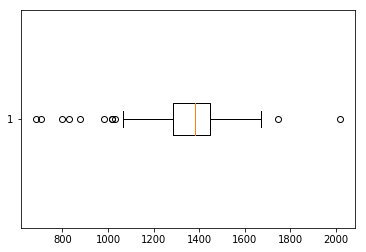

In [69]:
temp = dataclean[(dataclean.item=="Oeufs")][["ratio_energie_poids"]].dropna().values
plt.boxplot(temp, vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x2e299395e10>,
 'caps': [<matplotlib.lines.Line2D at 0x2e29938f4e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2e2993959e8>],
 'medians': [<matplotlib.lines.Line2D at 0x2e29938fb70>],
 'fliers': [<matplotlib.lines.Line2D at 0x2e29938feb8>],
 'means': []}

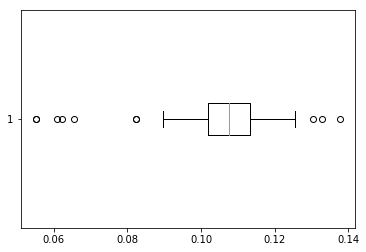

In [70]:
temp = dataclean[(dataclean.item=="Oeufs")][["pourcentage_proteines"]].dropna().values
plt.boxplot(temp, vert=False)

In [71]:
# je vérifie les résultats obtenus sur l'avoine
dataclean[(dataclean.item=="Avoine")][["ratio_energie_poids","pourcentage_proteines"]].describe()

ratio_energie_poids  pourcentage_proteines
count            83.000000              91.000000
mean           2152.491850               0.084792
std             547.388214               0.017580
min            1188.162600               0.045546
25%            1780.758533               0.073746
50%            2085.681248               0.086262
75%            2429.264337               0.093634
max            3998.042812               0.135285

**Analyse des résultats obtenus sur l'avoine**  
Mes recherches sur internet m'indiquent une teneur en protéines comprise entre 13% et 16% selon les sources, et un apport calorique de 3500 kcal par kg. Toutefois, ces chiffres ne concernent que les flocons d'avoine et le son d'avoine, c'est-à-dire les graines d'avoine et leur enveloppe.  
En poussant plus loin la recherche sur l'ensemble de la plante, les données indiquent un pourcentage en protéine plus proche de 10.70% (données wikipedia), qui semble plus cohérent avec les données obtenues (médiane de 8.63%). Le même raisonnement peut expliquer les écarts pour le ratio énergie/poids.  
  
Tout comme dans le cas de l'oeuf, **je constate dans le tableau ci-dessus la présence de valeurs abérantes**.

**Pour afficher les résultats**, je crée deux tables pivots (une par ratio)

In [72]:
ratio_energie_poids = dataclean.pivot_table("ratio_energie_poids",index="country",columns="item")
pourcentage_proteines = dataclean.pivot_table("pourcentage_proteines", index="country", columns="item")

<mark>**<font color=red>Tableau des ratios Energie/poids pour chaque aliment et pays</font>**</mark>

In [73]:
ratio_energie_poids

item                                    Abats Comestible  Agrumes, Autres  \
country                                                                     
Afghanistan                                  1092.647747       296.976054   
Afrique du Sud                               1313.490914              NaN   
Albanie                                      1065.426970              NaN   
Algérie                                       982.005272              NaN   
Allemagne                                     956.831475       157.775403   
Angola                                       1138.727292       346.328252   
Antigua-et-Barbuda                                   NaN              NaN   
Arabie saoudite                              1203.273439       260.231756   
Argentine                                    1080.144183              NaN   
Arménie                                      1056.130785              NaN   
Australie                                    1090.324656              NaN   
Autriche                                     1138.505611              NaN   
Azerbaïdjan                                  1081.778509              NaN   
Bahamas                                       963.848200              NaN   
Bangladesh                                   1236.849926              NaN   
Barbade                                       721.810495              NaN   
Belgique                                     1130.639411              NaN   
Belize                                               NaN              NaN   
Bermudes                                             NaN              NaN   
Bolivie (État plurinational de)              1070.693845              NaN   
Bosnie-Herzégovine                           1169.621898              NaN   
Botswana                                     1068.244451              NaN   
Brunéi Darussalam                                    NaN       148.086340   
Brésil                                       1112.159258              NaN   
Bulgarie                                     1205.518848              NaN   
Burkina Faso                                 1198.373826              NaN   
Bélarus                                      1137.468240              NaN   
Bénin                                        1217.208205              NaN   
Cabo Verde                                    759.354760              NaN   
Cambodge                                     1044.434777              NaN   
...                                                  ...              ...   
Soudan                                       1078.894658              NaN   
Sri Lanka                                     998.992006              NaN   
Suisse                                       1088.422870              NaN   
Suriname                                     1386.189700       297.040650   
Suède                                        1169.855052       233.971010   
Sénégal                                      1073.732667              NaN   
Tadjikistan                                  1193.960114              NaN   
Tchad                                        1065.279997              NaN   
Tchéquie (la)                                1171.813808              NaN   
Thaïlande                                     994.888749              NaN   
Timor-Leste                                  1296.880770              NaN   
Togo                                         1028.270408              NaN   
Trinité-et-Tobago                             984.221040       246.055260   
Tunisie                                      1072.083645       277.263012   
Turkménistan                                  652.897035              NaN   
Turquie                                      1257.380752              NaN   
Ukraine                                      1090.547121              NaN   
Uruguay                                      1119.529642              NaN   
Vanuatu                                       923.968300              NaN

<mark>**<font color=red>Tableau des pourcentages de protéines pour chaque aliment et pays</font>**</mark>

In [74]:
pourcentage_proteines

item                                    Abats Comestible  Agrumes, Autres  \
country                                                                     
Afghanistan                                     0.168268         0.005940   
Afrique du Sud                                  0.199342              NaN   
Albanie                                         0.154971              NaN   
Algérie                                         0.154666              NaN   
Allemagne                                       0.177014         0.001578   
Angola                                          0.212562         0.004849   
Antigua-et-Barbuda                                   NaN              NaN   
Arabie saoudite                                 0.180491         0.005205   
Argentine                                       0.187675              NaN   
Arménie                                         0.169735         0.010561   
Australie                                       0.175361              NaN   
Autriche                                        0.179315              NaN   
Azerbaïdjan                                     0.176690              NaN   
Bahamas                                         0.166608              NaN   
Bangladesh                                      0.160790              NaN   
Barbade                                         0.113427              NaN   
Belgique                                        0.187686              NaN   
Belize                                               NaN              NaN   
Bermudes                                             NaN              NaN   
Bolivie (État plurinational de)                 0.175204              NaN   
Bosnie-Herzégovine                              0.160823              NaN   
Botswana                                        0.176746              NaN   
Brunéi Darussalam                                    NaN         0.002962   
Brésil                                          0.184301              NaN   
Bulgarie                                        0.190472         0.005304   
Burkina Faso                                    0.172566              NaN   
Bélarus                                         0.184365              NaN   
Bénin                                           0.174467              NaN   
Cabo Verde                                      0.108208              NaN   
Cambodge                                        0.180165              NaN   
...                                                  ...              ...   
Soudan                                          0.154642              NaN   
Sri Lanka                                       0.174824              NaN   
Suisse                                          0.187011              NaN   
Suriname                                        0.196047         0.005941   
Suède                                           0.157930         0.002340   
Sénégal                                         0.171797              NaN   
Tadjikistan                                     0.165164              NaN   
Tchad                                           0.177547              NaN   
Tchéquie (la)                                   0.179288              NaN   
Thaïlande                                       0.185713              NaN   
Timor-Leste                                     0.194532              NaN   
Togo                                            0.179947              NaN   
Trinité-et-Tobago                               0.167318         0.004921   
Tunisie                                         0.168853         0.004852   
Turkménistan                                    0.143637              NaN   
Turquie                                         0.166603              NaN   
Ukraine                                         0.183212              NaN   
Uruguay                                         0.176637              NaN   
Vanuatu                                         0.154303              NaN

<a id='question05'></a>

---
## <font color=blue>Mission 5 : Cinq des vingts aliments les plus caloriques et les plus riches en protéines</font>

**Méthodologie**  
  
Pour répondre à cette question, je crée un sous-dataframe de dataclean dans lequel j'aggrège avec la colonne item comme attribut de partitionnement en ne gardant que la moyenne pour les deux ratios calculés à la question précédente.  
Remarque : j'ai déjà remplacé les 0 par des NaN dans mon dataframe dataclean.  
  
Puis je crée deux Series Pandas qui comportent chacune les 20 premières lignes de chaque colonne triée par ordre décroissant. Cela me permet d'afficher les 20 aliments les plus caloriques et les 20 aliments les plus riches en protéines.

In [75]:
# aggrégation pour obtenir la moyenne des ratios pour chaque produit
temp = dataclean.groupby("item")[["ratio_energie_poids","pourcentage_proteines"]].mean()

In [76]:
# tri des produits par ratios moyens dcéroissants
aliments_les_plus_caloriques = temp["ratio_energie_poids"].sort_values(ascending=False).iloc[:20]
aliments_les_plus_riches_en_proteines = temp["pourcentage_proteines"].sort_values(ascending=False).iloc[:20]
print("Les 20 aliments les plus caloriques sont :")
print(aliments_les_plus_caloriques)
print(" ")
print("Les 20 aliments les plus riches en protéines sont :")
print(aliments_les_plus_riches_en_proteines)

Les 20 aliments les plus caloriques sont :
item
Huiles de Foie de Poisso    10000.566745
Huile de Sésame              9517.848106
Huile de Son de Riz          9362.998495
Huile d'Arachide             9042.869079
Huiles de Poissons           9024.613330
Huile d'Olive                9003.752733
Huil Plantes Oleif Autr      8956.012948
Huile de Germe de Maïs       8955.888632
Huile de Palmistes           8912.819776
Huile Graines de Coton       8881.749901
Huile de Palme               8811.511683
Huile de Tournesol           8771.381759
Huile de Colza&Moutarde      8754.760719
Huile de Soja                8720.520365
Huile de Coco                8602.738340
Graisses Animales Crue       7651.936007
Beurre, Ghee                 7391.330498
Palmistes                    6553.555655
Sésame                       5858.329439
Arachides Decortiquees       5747.068079
Name: ratio_energie_poids, dtype: float64
 
Les 20 aliments les plus riches en protéines sont :
item
Soja                        0.2

<mark>**<font color=red>Cinq des aliments les plus caloriques sont</font>** : l'huile d'Olive (et toutes les huiles en général), les graisses animales crues, le beurre, le sésame et les arachides décortiquées.</mark>  
  
<mark>**<font color=red>Cinq des aliments les plus riches en protéines sont</font>** : le soja, les pois, les haricots, la viande de bovins (et les viandes en général) et les poissons pélagiques.</mark>  
Remarque : ces aliments sont à la fois riches en protéines et possèdent un bon PDCAAS (> 0.70) : 0,91 pour le soja, entre 0,70 et 0.80 pour les pois et les haricots, 0.92 pour la viande bovine, et 0,90 pour le thon (qui est un exemple de poisson pélagique).

---
**<font color=blue>Pour aller plus loin</font>**  
  
Est-ce que les aliments d'origine végétale sont en moyenne plus caloriques et riches en protéines que les aliments d'origine animale ?
  
Pour répondre à cette question qui me vient à l'esprit, je vais créer une nouvelle agrégation basée sur l'origine des aliments.

In [77]:
temp = dataclean.groupby("origin")[["ratio_energie_poids","pourcentage_proteines"]].mean()
temp

ratio_energie_poids  pourcentage_proteines
origin                                             
animal           1995.548563               0.102680
vegetal          3057.225159               0.063527

Le tableau semble montrer que les aliments d'origine végétale sont en moyenne plus caloriques alors que les aliments d'origine animale sont en moyenne plus riches en protéines.

<a id='question06'></a>

---
## <font color=blue>Mission 6 : La disponibilité intérieure en kcal des produits végétaux</font>

**Méthodologie**  
  
La disponibilité intérieure en kg est donnée pour chaque pays et chaque produit par la colonne "domestic_supply_kg". Pour obtenir son équivalent en kcal, il faut convertir cette colonne en kcal en la multipliant par le ratio énergie/poids. Je crée une colonne domestic_supply_kcal avec cette valeur.  
  
Je vérifie ensuite les années pour lesquelles je dispose des données (mon analyse exploratoire des dataframes me fait supposer que je ne dispose des données que pour 2013).

Ensuite, il faut restreindre aux produits dont l'origine est végétale et l'année considérée, et faire la somme.

In [78]:
dataclean["domestic_supply_kcal"] = dataclean.domestic_supply_kg.values * dataclean.ratio_energie_poids.values

# vérification des années disponibles
dataclean.year.unique()

array([2013], dtype=int64)

In [79]:
dispo_interieure_mondiale_yearref_kcal = dataclean[(dataclean.origin == "vegetal") & \
            (dataclean.year == YEAR_REFERENCE)][["domestic_supply_kcal"]].sum().sum()
print("La disponibilité intérieure mondiale en produits végétaux en {} est de {:,.0f} kcal".\
              format(YEAR_REFERENCE, dispo_interieure_mondiale_yearref_kcal))

La disponibilité intérieure mondiale en produits végétaux en 2013 est de 12,365,391,149,753,944 kcal


<mark>**<font color=red>La disponibilité intérieure mondiale pour les produits végétaux en 2013 vaut 12&nbsp;365&nbsp;391 milliards de kcal.</font>**</mark>  
Nous ne disposons pas de données postérieures à 2013.

<a id='question07'></a>

---
## <font color=blue>Mission 7 : Nombre d'humains pouvant être nourris avec la disponibilité intérieure mondiale en produits végétaux</font>

**Calcul des besoins moyens en calories par jour**  
Pour déterminer les besoins en calories pour un être humain, je me base sur le document établi par la FAO en annexe 2 disponible sur __[ce lien](http://www.fao.org/3/y5740f/y5740f0f.htm)__, qui fournit le tableau suivant :  
  
| Catégorie | KCAL |  
| --- | --- |  
| ENFANTS 1-3 ans | 1022 |  
| ENFANTS 4-6 ans | 1352 |  
| ENFANTS 7-9 ans | 1698 |  
| FILLES (10-17 ans) | 2326 |  
| GARCONS (10-17 ans) | 2824 |  
| FEMMES 18-59 ans | 2408 |  
| FEMMES 60 ans et plus | 2142 |  
| HOMMES 18-59 ans | 3091 |  
| HOMMES 60 ans et plus | 2496 |  
  
Pour les enfants, j'établis les hypothèses suivantes :  
- Au sein des moins de 10 ans, les catégories 1 à 3 ans, 4 à 6 ans et 7 à 9 ans sont équi-représentées ;  
- Il y a autant d'enfants de moins de 10 ans que d'enfants entre 10 et 17 ans ;  
  
D'après les informations sur la population mondiale trouvées sur internet :  
- il y a environ autant d'hommes que de femmes ;  
- Au sein des adultes, il y a environ 80% de moins de 60 ans et 20% de plus de 60 ans ;  
- Il y a environ 30% d'enfants et 70% d'adultes.  
  
Avec ces données, j'obtiens <font color=red>un besoin moyen en apport calorique de 2454 kcal par personne par jour</font>.  
  
  
**Calcul des besoins moyens en protéines par jour**  
D'après les informations trouvées sur internet, une personne a besoin en moyenne entre 0,80 et 0,90 grammes de protéines par kg par jour. Sachant que le poids moyen d'un individu dans le monde est de 62kg, sur la base 0,85 grammes par kg par jour, cela donne <font color=red>un besoin moyen en protéines de 52,7 grammes par jour, soit 0,0527 kg par jour</font>.

In [80]:
BESOIN_MOYEN_CALORIES_KCAL = 2454
BESOIN_MOYEN_PROTEINES_KG = 0.0527

**Remarque sur la population mondiale de référence pour le calcul des pourcentages**  
J'ai rempli la base dataclean avec les valeurs de population issues du dataframe pop2, qui sont les plus précises à ma disposition.  
J'ai également constaté que les données des bilans alimentaires ne sont pas disponibles pour tous les pays. Je vais donc calculer le pourcentage d'humains nourris sur la population des seuls pays pour lesquels je dispose des bilans alimentaires, afin d'avoir des données comparables.  
Je stocke en mémoire cette population mondiale de référence et je la vérifie à titre d'information.

In [81]:
# je sélectionne les données de population sur l'année de référence en les regroupant par pays
# je récupère la moyenne car la population d'un pays se retrouve sur chaque ligne de produit.
temp = dataclean[dataclean.year == YEAR_REFERENCE][["country","population"]].groupby("country").mean()
population_mondiale_yearref = temp.population.sum()
print("La population mondiale de référence pour le calcul des pourcentages est de {:,.0f} personnes en {}".\
              format(population_mondiale_yearref, YEAR_REFERENCE))

La population mondiale de référence pour le calcul des pourcentages est de 7,045,805,319 personnes en 2013


**Calcul du nombre d'humains nourris en kcal**  
Nombre d'humains pouvant être nourris par toute la disponibilité intérieure = disponibilité intérieure mondiale kcal / (besoin apport calorique moyen par jour x 365 jours)

In [82]:
nombre_humains_nourris_yearref_kcal = dispo_interieure_mondiale_yearref_kcal / (BESOIN_MOYEN_CALORIES_KCAL * 365)
pourcent_humains_nourris_yearref_kcal = nombre_humains_nourris_yearref_kcal / population_mondiale_yearref
print("En {}, la disponibilité intérieure mondiale en produits végétaux en kcal permet de nourrir \
{:,.0f} personnes,\nsoit {:,.2%} de la population mondiale".\
      format(YEAR_REFERENCE, nombre_humains_nourris_yearref_kcal, pourcent_humains_nourris_yearref_kcal))

En 2013, la disponibilité intérieure mondiale en produits végétaux en kcal permet de nourrir 13,805,127,943 personnes,
soit 195.93% de la population mondiale


**Calcul du nombre d'humains nourris en kg de protéines**  
Je commence par calculer la disponibilité intérieure mondiale en kg de protéines.  
Puis je rapporte ce nombre aux besoins journaliers moyens en protéines (en kg) x 365 jours

In [83]:
dataclean["domestic_supply_kgproteines"] = dataclean.domestic_supply_kg.values * dataclean.pourcentage_proteines.values
dispo_interieure_mondiale_yearref_kgproteines = dataclean[(dataclean.origin == "vegetal") & \
        (dataclean.year == YEAR_REFERENCE)][["domestic_supply_kgproteines"]].sum().sum()
nombre_humains_nourris_yearref_kgproteines = \
        dispo_interieure_mondiale_yearref_kgproteines / (BESOIN_MOYEN_PROTEINES_KG * 365)
pourcent_humains_nourris_yearref_kgproteines = \
        nombre_humains_nourris_yearref_kgproteines / population_mondiale_yearref
print("En {}, la disponibilité intérieure mondiale en produits végétaux est de {:,.0f} kg de protéines".\
      format(YEAR_REFERENCE, dispo_interieure_mondiale_yearref_kgproteines))
print("Elle permet de nourrir {:,.0f} personnes, soit {:,.2%} de la population mondiale".\
      format(nombre_humains_nourris_yearref_kgproteines, pourcent_humains_nourris_yearref_kgproteines))

En 2013, la disponibilité intérieure mondiale en produits végétaux est de 291,253,009,450 kg de protéines
Elle permet de nourrir 15,141,431,699 personnes, soit 214.90% de la population mondiale


<mark>**<font color=red>La disponibilité intérieure mondiale en produits végétaux permet en 2013 de nourrir :**</font></mark>  
<mark>- **<font color=red>13,805 milliards d'humains en termes de calories, soit 196% de la population mondiale ;**</font></mark>  
<mark>- **<font color=red>16,088 milliards d'habitants en termes de protéines, soit 228% de la population mondiale.**</font></mark>  
  
Nous ne disposons pas de données postérieures à 2013.

<a id='question08'></a>

---
## <font color=blue>Mission 8 : Nombre d'humains pouvant être nourris avec la disponibilité alimentaire, la nourriture pour animaux et les pertes en produits végétaux</font>

**Méthodologie**  
  
Je crée de nouvelles colonnes dans le dataframe dataclean : food_kcal, food_kgproteines, feed_kcal, feed_kgproteines, waste_kcal, waste_kgproteines. Il faut faire attention aux unités et se baser sur les données de food, feed et waste en kg.  
  
Je calcule la quantité de kcal et de kg de protéines disponibles en additionnant ces valeurs, et j'en déduis le nombre d'humains qui peuvent être nourris.

In [84]:
dataclean["food_kcal"] = dataclean.food_kg.values * dataclean.ratio_energie_poids.values
dataclean["feed_kcal"] = dataclean.feed_kg.values * dataclean.ratio_energie_poids.values
dataclean["waste_kcal"] = dataclean.waste_kg.values * dataclean.ratio_energie_poids.values
dataclean["food_kgproteines"] = dataclean.food_kg.values * dataclean.pourcentage_proteines.values
dataclean["feed_kgproteines"] = dataclean.feed_kg.values * dataclean.pourcentage_proteines.values
dataclean["waste_kgproteines"] = dataclean.waste_kg.values * dataclean.pourcentage_proteines.values

dispo_food_feed_waste_yearref_kcal = dataclean[(dataclean.origin == "vegetal") & \
        (dataclean.year == YEAR_REFERENCE)][["food_kcal","feed_kcal","waste_kcal"]].sum().sum()
dispo_food_feed_waste_yearref_kgproteines = dataclean[(dataclean.origin == "vegetal") & \
        (dataclean.year == YEAR_REFERENCE)][["food_kgproteines","feed_kgproteines","waste_kgproteines"]].sum().sum()
print("La disponibilité intérieure calculée sur ces éléments est de {:,.0f} kcal \net de {:,.0f} kg de protéines\
 en {}".format(dispo_food_feed_waste_yearref_kcal, dispo_food_feed_waste_yearref_kgproteines, YEAR_REFERENCE))

La disponibilité intérieure calculée sur ces éléments est de 9,221,644,934,450,558 kcal 
et de 204,628,255,934 kg de protéines en 2013


In [85]:
nombre_humains_nourris_yearref_kcal = dispo_food_feed_waste_yearref_kcal / (BESOIN_MOYEN_CALORIES_KCAL * 365)
nombre_humains_nourris_yearref_kgproteines = dispo_food_feed_waste_yearref_kgproteines / (BESOIN_MOYEN_PROTEINES_KG * 365)
pourcent_humains_nourris_yearref_kcal = nombre_humains_nourris_yearref_kcal / population_mondiale_yearref
pourcent_humains_nourris_yearref_kgproteines = nombre_humains_nourris_yearref_kgproteines / population_mondiale_yearref

print("{:,.0f} personnes nourries en termes de calories, soit {:,.2%} de la population mondiale".\
      format(nombre_humains_nourris_yearref_kcal, pourcent_humains_nourris_yearref_kcal))
print("{:,.0f} personnes nourries en termes de protéines, soit {:,.2%} de la population mondiale".\
      format(nombre_humains_nourris_yearref_kgproteines, pourcent_humains_nourris_yearref_kgproteines))

10,295,346,635 personnes nourries en termes de calories, soit 146.12% de la population mondiale
10,638,052,348 personnes nourries en termes de protéines, soit 150.98% de la population mondiale


<mark>**<font color=red>La disponibilité alimentaire, la nourriture pour animaux et les pertes en produits végétaux permettent en 2013 de nourrir :**</font></mark>  
<mark>- **<font color=red>10,295 milliards d'humains en termes de calories, soit 146% de la population mondiale ;**</font></mark>  
<mark>- **<font color=red>11,303 milliards d'habitants en termes de protéines, soit 160% de la population mondiale.**</font></mark>  
  
Nous ne disposons pas de données postérieures à 2013.

<a id='question09'></a>

---
## <font color=blue>Mission 9 : Nombre d'humains pouvant être nourris avec la disponibilité alimentaire mondiale ?</font>

**Méthodologie**  
  
J'utilise le même raisonnement que pour la question précédente, avec les colonnes food_kcal et food_kgproteines créées précédemment et pour les produits de toutes origines.

In [86]:
dispo_food_yearref_kcal = dataclean[dataclean.year == YEAR_REFERENCE][["food_kcal"]].sum().sum()
dispo_food_yearref_kgproteines = dataclean[dataclean.year == YEAR_REFERENCE][["food_kgproteines"]].sum().sum()
print("La disponibilité alimentaire en {} est de {:,.0f} kcal \net de {:,.0f} kg de protéines".\
      format(YEAR_REFERENCE, dispo_food_yearref_kcal, dispo_food_yearref_kgproteines))

La disponibilité alimentaire en 2013 est de 7,405,720,327,339,505 kcal 
et de 208,268,631,198 kg de protéines


In [87]:
nombre_humains_nourris_yearref_kcal = dispo_food_yearref_kcal / (BESOIN_MOYEN_CALORIES_KCAL * 365)
nombre_humains_nourris_yearref_kgproteines = dispo_food_yearref_kgproteines / (BESOIN_MOYEN_PROTEINES_KG * 365)
pourcent_humains_nourris_yearref_kcal = nombre_humains_nourris_yearref_kcal / population_mondiale_yearref
pourcent_humains_nourris_yearref_kgproteines = nombre_humains_nourris_yearref_kgproteines / population_mondiale_yearref
print("{:,.0f} personnes nourries en termes de calories, soit {:,.2%} de la population mondiale".\
      format(nombre_humains_nourris_yearref_kcal, pourcent_humains_nourris_yearref_kcal))
print("{:,.0f} personnes nourries en termes de protéines, soit {:,.2%} de la population mondiale".\
      format(nombre_humains_nourris_yearref_kgproteines, pourcent_humains_nourris_yearref_kgproteines))

8,267,988,889 personnes nourries en termes de calories, soit 117.35% de la population mondiale
10,827,305,305 personnes nourries en termes de protéines, soit 153.67% de la population mondiale


<mark>**<font color=red>La disponibilité alimentaire mondiale permet en 2013 de nourrir :</font>**</mark>  
<mark>- **<font color=red>8,268 milliards d'humains en termes de calories, soit 117% de la population mondiale ;</font>**</mark>  
<mark>- **<font color=red>11,504 milliards d'habitants en termes de protéines, soit 163% de la population mondiale.</font>**</mark>  
  
Nous ne disposons pas de données postérieures à 2013.

<a id='question10'></a>

---
## <font color=blue>Mission 10 : Proportion de la population mondiale considérée comme étant en sous-nutrition ?

**Méthodologie**  
  
Je commence par consulter le describe de und, la table qui contient les données sur la sous-nutrition, pour me la remémorer. Pour rappel, j'ai observé la présence de valeurs approximatives, caractérisées par le signe '<' avant la valeur. J'ai conservé la valeur en supprimant le signe '<' et j'ai gardé note de ces approximations à travers une colonne booléenne is_approximate.  
  
Je remarque la présence de la Chine (country_code = 351). Je suspecte le même doublon que précédemment. Je vérifie et je supprime le doublon si nécessaire.  
  
Je crée un dataframe undclean qui ajoute une colone population au dataframe und par jointure sur le dataframe pop2.  
Le choix du dataframe pop2 comme référence pour la population mondiale a déjà effectué auparavant. L'observation du describe() de undclean conforte ce choix.  
En effet, la liste des pays contenue dans le dataframe pop2 correspond mieux à la liste des pays contenue dans le dataframe de sous-alimentation. Le country_code maximum est 299 dans undclean et dans pop2, contre 276 pour le dataframe pop1.  
De plus, le dataframe pop2 présente l'avantage de fournir les données de population pour les années 2013 à 2017, contre la seule année 2013 pour le dataframe pop1.

Pour finir, on calcule le nombre de personnes sous-alimentées par an à l'aide d'une aggrégation sur le champs year que l'on ramène à la population mondiale de l'année.

In [88]:
und.describe(include = 'all')

country_code  country        year is_approximate  undernourished
count     816.000000      816   816.00000            668    6.680000e+02
unique           NaN      204         NaN              2             NaN
top              NaN  Grenade         NaN          False             NaN
freq             NaN        4         NaN            390             NaN
mean      129.264706      NaN  2014.50000            NaN    5.442066e+06
std        76.624419      NaN     1.11872            NaN    2.127507e+07
min         1.000000      NaN  2013.00000            NaN    1.000000e+05
25%        62.500000      NaN  2013.75000            NaN    2.000000e+05
50%       127.500000      NaN  2014.50000            NaN    7.000000e+05
75%       193.250000      NaN  2015.25000            NaN    2.800000e+06
max       351.000000      NaN  2016.00000            NaN    2.131000e+08

In [89]:
# la Chine est-elle en doublon ?
und[und.country_code.isin(liste_chine)].country_code.unique()

array([351,  96, 128,  41, 214], dtype=int64)

In [90]:
# suppression du doublon sur la Chine et création de undclean
und = und[und.country_code != 351]
undclean = pd.merge(und, pop2[["country_code","year","population"]], how="left", on=["country_code","year"])
undclean.describe(include='all')

country_code  country         year is_approximate  undernourished  \
count     812.000000      812   812.000000            664    6.640000e+02   
unique           NaN      203          NaN              2             NaN   
top              NaN  Grenade          NaN          False             NaN   
freq             NaN        4          NaN            386             NaN   
mean      128.172414      NaN  2014.500000            NaN    4.696084e+06   
std        75.210152      NaN     1.118723            NaN    1.902981e+07   
min         1.000000      NaN  2013.000000            NaN    1.000000e+05   
25%        61.000000      NaN  2013.750000            NaN    2.000000e+05   
50%       127.000000      NaN  2014.500000            NaN    7.000000e+05   
75%       193.000000      NaN  2015.250000            NaN    2.800000e+06   
max       299.000000      NaN  2016.000000            NaN    2.131000e+08   

          population  
count   8.120000e+02  
unique           NaN  
top              NaN  
freq             NaN  
mean    3.614035e+07  
std     1.379312e+08  
min     1.187000e+03  
25%     1.352932e+06  
50%     7.406496e+06  
75%     2.501857e+07  
max     1.403500e+09

In [91]:
# je calcule le nombre d'humains en sous-nutrition en additionnant le nombre pour chaque pays pour chaque année
nombre_humains_sous_nutrition = undclean[["year","undernourished","population"]].groupby("year").sum()
nombre_humains_sous_nutrition.style.format("{:,.0f}")

Les chiffres sont cohérents avec le rapport de la FAO qui évoque 777 millions d'humains souffrant de sous-nutrition en 2015 et 815 millions en 2016. Ce deuxième chiffre est basé sur des estimations. Les chiffres collectés par la suite semblent avoir revus à la baisse cette estimation.

In [92]:
# j'ajoute une colone percentage à mon tableau
nombre_humains_sous_nutrition["percentage"] = \
        nombre_humains_sous_nutrition.undernourished / nombre_humains_sous_nutrition.population
nombre_humains_sous_nutrition[["percentage"]].style.format("{:,.2%}")

<mark>**<font color=red>La proportion de la population mondiale considérée comme étant en sous-nutrition est passée de 10,85% en 2013 à 10,53% en 2016.</font>**</mark>

---
**<font color=blue>Pour aller plus loin</font>**  
  
Nous avons supprimé les signes '<' dans le dataframe und, tout en gardant les valeurs numériques associées à ces signes. Nous avons donc créé une approximation sur certaines lignes, matérialisée par la colonne is_approximate.  
  
Sur le site de la FAO, nous pouvons aussi télécharger la prévalence de la sous-nutrition, c'est-à-dire la proportion de la population considérée comme étant en sous-nutrition pour un pays donné et une année donnée. J'analyse ces données pour savoir si elles permettent d'avoir des données moins approximatives.
  
Si c'est le cas, j'incorpore ces données au dataframe undclean avec une jointure, puis je crée une nouvelle colonne où je calcule une nouvelle valeur plus précise des personnes en sous-nutrition.

Je peux maintenant calculer un pourcentage de personnes en sous-nutrition au niveau mondial plus précis.

In [93]:
und2 = pd.read_csv("FAOSTAT_undernourishment2.csv")
und2.describe(include='all')

Code Domaine                             Domaine   Code zone     Zone  \
count           816                                 816  816.000000      816   
unique            1                                   1         NaN      204   
top              FS  Données de la sécurité alimentaire         NaN  Grenade   
freq            816                                 816         NaN        4   
mean            NaN                                 NaN  129.264706      NaN   
std             NaN                                 NaN   76.624419      NaN   
min             NaN                                 NaN    1.000000      NaN   
25%             NaN                                 NaN   62.500000      NaN   
50%             NaN                                 NaN  127.500000      NaN   
75%             NaN                                 NaN  193.250000      NaN   
max             NaN                                 NaN  351.000000      NaN   

        Code Élément Élément  Code Produit  \
count          816.0     816         816.0   
unique           NaN       1           NaN   
top              NaN  Valeur           NaN   
freq             NaN     816           NaN   
mean          6121.0     NaN      210041.0   
std              0.0     NaN           0.0   
min           6121.0     NaN      210041.0   
25%           6121.0     NaN      210041.0   
50%           6121.0     NaN      210041.0   
75%           6121.0     NaN      210041.0   
max           6121.0     NaN      210041.0   

                                                  Produit    Code année  \
count                                                 816  8.160000e+02   
unique                                                  1           NaN   
top     Prévalence de la sous-alimentation (%) (moyenn...           NaN   
freq                                                  816           NaN   
mean                                                  NaN  2.013702e+07   
std                                                   NaN  1.118832e+04   
min                                                   NaN  2.012201e+07   
25%                                                   NaN  2.012951e+07   
50%                                                   NaN  2.013702e+07   
75%                                                   NaN  2.014452e+07   
max                                                   NaN  2.015202e+07   

            Année Unité Valeur Symbole Description du Symbole  
count         816   816    668     816                    816  
unique          4     1    231       2                      2  
top     2015-2017     %   <2.5       F         Estimation FAO  
freq          204   816    186     668                    668  
mean          NaN   NaN    NaN     NaN                    NaN  
std           NaN   NaN    NaN     NaN                    NaN  
min           NaN   NaN    NaN     NaN                    NaN  
25%           NaN   NaN    NaN     NaN                    NaN  
50%           NaN   NaN    NaN     NaN                    NaN  
75%           NaN   NaN    NaN     NaN                    NaN  
max           NaN   NaN    NaN     NaN                    NaN

In [94]:
# Je vérifie le doublon sur la Chine et je le supprime si nécessaire
und2[und2["Code zone"].isin(liste_chine)].Zone.unique()

array(['Chine', 'Chine - RAS de Hong-Kong', 'Chine - RAS de Macao',
       'Chine, continentale', 'Chine, Taiwan Province de'], dtype=object)

In [95]:
und2 = und2[und2["Code zone"] != 351]

In [96]:
# je constate que le champ Valeur contient le même nombre de données non renseignées.
# Cette colonne n'est toujours pas de type numérique. Je vérifie les valeurs qu'il contient.
und2.Valeur.unique()

array(['25.5', '27.6', '29.3', '30.3', '4.8', '5.3', '5.8', '6.1', '5.7',
       '5.5', '4.7', '4.6', '<2.5', nan, '30.8', '27', '24.8', '23.9',
       '5.4', '3.5', '3.4', '3.6', '3.8', '4.3', '16.8', '16.5', '15.8',
       '15.2', '4.4', '4', '3.7', '6.6', '6.7', '6.5', '10.2', '9.6',
       '9.9', '10.4', '21.4', '19.9', '19.6', '19.8', '24.9', '26.8',
       '28.5', '2.7', '2.6', '3.3', '3', '20.2', '20.3', '20.8', '21.3',
       '14', '13.3', '12.7', '12.3', '18.8', '18.7', '18.5', '7.4', '7.3',
       '12.2', '11.9', '11.6', '11.4', '9.8', '9.3', '8.9', '8.8', '4.1',
       '3.9', '4.5', '7.9', '7.1', '38.7', '38.2', '37.7', '37.5', '4.9',
       '21.1', '20.7', '19.3', '19.1', '19.4', '19.7', '6', '5.9', '5.6',
       '5.2', '11.8', '11.3', '11', '10.3', '3.1', '2.5', '8.2', '8',
       '7.8', '2.9', '2.8', '21.5', '21', '26.9', '24.7', '22.8', '9',
       '9.1', '9.4', '9.7', '7.6', '7.5', '6.3', '6.4', '16.6', '16.1',
       '17', '24.1', '25.4', '26.1', '26', '8.7', '8.1', '4

Il n'y a qu'une valeur avec le signe '<'. Ces données semblent donc comporter moins d'approximations. J'entreprends la même simplification que celle menée sur und auparavant.

In [97]:
# simplification
und2 = und2[["Code zone","Zone","Année","Valeur","Unité"]]
und2.columns = ["country_code","country","interyear","value","unit"]

# création colonne year
und2["year"] = ((und2.interyear.str.slice(0,4).astype(int) + und2.interyear.str.slice(5,9).astype(int)) / 2).astype(int)
und2.drop(columns="interyear", inplace=True)

# création colonne is_approximate
und2["percentage_is_approximate"] = und2.value.str.contains("<")
und2["value"] = und2["value"].str.replace('<','')
und2["value"] = pd.to_numeric(und2["value"])

# calcul du pourcentage
und2["percentage_undernourished"] = und2.value / 100
und2.drop(columns=["value","unit"], inplace=True)
und2.describe(include='all')

country_code  country         year percentage_is_approximate  \
count     812.000000      812   812.000000                       664   
unique           NaN      203          NaN                         2   
top              NaN  Grenade          NaN                     False   
freq             NaN        4          NaN                       478   
mean      128.172414      NaN  2014.500000                       NaN   
std        75.210152      NaN     1.118723                       NaN   
min         1.000000      NaN  2013.000000                       NaN   
25%        61.000000      NaN  2013.750000                       NaN   
50%       127.000000      NaN  2014.500000                       NaN   
75%       193.000000      NaN  2015.250000                       NaN   
max       299.000000      NaN  2016.000000                       NaN   

        percentage_undernourished  
count                  664.000000  
unique                        NaN  
top                           NaN  
freq                          NaN  
mean                     0.110800  
std                      0.112825  
min                      0.025000  
25%                      0.025000  
50%                      0.064500  
75%                      0.152250  
max                      0.618000

In [98]:
# je complète undclean avec une jointure
undclean = pd.merge(undclean, und2[["country_code","year","percentage_is_approximate","percentage_undernourished"]], \
                    how="left", on=["country_code","year"])
undclean.describe(include='all')

country_code  country         year is_approximate  undernourished  \
count     812.000000      812   812.000000            664    6.640000e+02   
unique           NaN      203          NaN              2             NaN   
top              NaN  Grenade          NaN          False             NaN   
freq             NaN        4          NaN            386             NaN   
mean      128.172414      NaN  2014.500000            NaN    4.696084e+06   
std        75.210152      NaN     1.118723            NaN    1.902981e+07   
min         1.000000      NaN  2013.000000            NaN    1.000000e+05   
25%        61.000000      NaN  2013.750000            NaN    2.000000e+05   
50%       127.000000      NaN  2014.500000            NaN    7.000000e+05   
75%       193.000000      NaN  2015.250000            NaN    2.800000e+06   
max       299.000000      NaN  2016.000000            NaN    2.131000e+08   

          population percentage_is_approximate  percentage_undernourished  
count   8.120000e+02                       664                 664.000000  
unique           NaN                         2                        NaN  
top              NaN                     False                        NaN  
freq             NaN                       478                        NaN  
mean    3.614035e+07                       NaN                   0.110800  
std     1.379312e+08                       NaN                   0.112825  
min     1.187000e+03                       NaN                   0.025000  
25%     1.352932e+06                       NaN                   0.025000  
50%     7.406496e+06                       NaN                   0.064500  
75%     2.501857e+07                       NaN                   0.152250  
max     1.403500e+09                       NaN                   0.618000

In [99]:
# j'ajoute une nouvelle colonne undernourished2
undclean["undernourished2"] = undclean["percentage_undernourished"] * undclean["population"]

# je calcule le nombre d'humains en sous-nutrition en additionnant le nombre pour chaque pays pour chaque année
nombre_humains_sous_nutrition2 = undclean[["year","undernourished2","population"]].groupby("year").sum()
nombre_humains_sous_nutrition2.style.format("{:,.0f}")

Les chiffres obtenus avec cette méthode sont un peu plus éloignés de ceux du rapport de la FAO, qui évoque 777 millions d'humains souffrant de sous-nutrition en 2015, par rapport à la première méthode.

In [100]:
# j'ajoute une colone percentage à mon tableau
nombre_humains_sous_nutrition2["percentage"] = \
            nombre_humains_sous_nutrition2.undernourished2 / nombre_humains_sous_nutrition2.population
nombre_humains_sous_nutrition2[["percentage"]].style.format("{:,.2%}")

<mark>**<font color=red>Avec cette méthode, je trouve que la proportion de la population mondiale considérée comme étant en sous-nutrition est passée de 10,82% en 2013 à 10,50% en 2016.</font>**</mark>  
J'obtiens le même résultat à 0,03% près.

---
**<font color=blue>Quelle méthode présente le moins d'approximations ?</font>**

Pour savoir quelle méthode est la plus précise, il faut étudier le nombre d'approximations et l'ampleur possible de ces approximations.

In [101]:
nombre_appros = undclean[["year","is_approximate","percentage_is_approximate"]].groupby("year").sum()
nombre_appros

is_approximate  percentage_is_approximate
year                                           
2013              70                         47
2014              70                         47
2015              69                         46
2016              69                         46

La deuxième méthode, basée sur la prévalence de la sous-nutrition (en pourcentage), contient un moins grand nombre d'approximations.  
  
Par contre, l'analyse des valeurs uniques de 'value' semble montrer que l'ampleur des approximations est supérieure avec la deuxième méthode :  
- toutes les valeurs inférieures à 2,5% sont regroupées sous la même valeur '<2,5' pour la prévalence de la sous-nutrition (en %);  
- nous avons plusieurs valeurs différentes précédées du signe '<' dans le cas du nombre de personnes en état de sous-nutrition.  
  
Par conséquent, **il est difficile de conclure qu'une méthode est plus précise que l'autre**. Le très faible écart de résultat de 0,03% entre les deux méthodes montre que nous obtenons des résultats très similaires dans les deux cas.

<a id='question11'></a>

---
## <font color=blue>Mission 11 : Proportion de céréales destinée à l'alimentation animale</font>

**Méthodologie**  
  
Première étape : j'établis la liste des céréales à partir de mon dataframe cer en sélectionnant les valeurs uniques de la colonne item_code.  
  
Deuxième étape : je crée une colonne is_cereal dans mon dataframe dataclean où je regarde si l'item_code est dans ma liste de céréales.  
  
Troisième étape : j'effectue mon calcul, en sélectionnant les lignes des céréales pour l'année de référence. Je peux utiliser indifféremment le duo de champs "food" et "feed" ou le duo "food_kg" et "feed_kg". Par soucis de cohérence avec mes autres calculs en kg, je choisis de travailler sur les valeurs en kg.

In [102]:
# création de la liste des céréales et d'une colonne is_cereal dans le dataframe dataclean
liste_cereal = cer.item_code.unique()
dataclean["is_cereal"] = dataclean.item_code.isin(liste_cereal)

In [103]:
# calcul du ratio
food_cereal = dataclean[dataclean.is_cereal & (dataclean.year == YEAR_REFERENCE)]["food_kg"].sum()
feed_cereal = dataclean[dataclean.is_cereal & (dataclean.year == YEAR_REFERENCE)]["feed_kg"].sum()
ratio = feed_cereal / (food_cereal + feed_cereal)
print("{:,.2%} des céréales sont destinées à l'alimentation animale en {}".format(ratio, YEAR_REFERENCE))

45.91% des céréales sont destinées à l'alimentation animale en 2013


<mark>**<font color=red>En 2013, 45,91% des céréales sont destinées à l'alimentation animale.</font>**</mark>  
Nous disposons pas de données pour les années postérieures.

<a id='question12'></a>

---
## <font color=blue>Mission 12 : Les 3 produits avec les plus forts ratios Autres utilisations / Disponibilité intérieure et Nourriture animale / Nourriture totale parmi les produits les plus exportés par les pays avec des personnes en sous-nutrition</font>

**Méthodologie**  
  
J'utilise le dataframe undclean pour créer la liste des pays pour lesquels la FAO recense des personnes en état de sous-nutrition. Je filtre sur l'année de référence et sur la valeur de la colonne undernourished qui doit être différente de 0. Puis je supprime les lignes non renseignées et je ne conserve que les valeurs uniques du champs country_code.  
  
Je crée un dataframe temporaire pour y stocker les quantités exportées par ces pays et sur l'année de référence, regroupées par produit. Puis je trie les quantités exportées par ordre décroissant et je conserve les 15 plus grosses exportations. Cela me donne la liste des 15 produits les plus exportés par ces pays.  
  
Je crée à nouveau un dataframe temporaire où je sélectionne les données pour l'année de référence et pour les 15 produits les plus exportés par ces pays, en triant les données par ordre décroissant de quantités importées et en ne conservant que les 200 premières valeurs.  
  
J'aggrège ces informations par produit, en faisant une somme. Puis, j'ajoute une colonne pour chaque ratio. Je n'ai plus qu'à trier les résultats par ordre croissant en ne conservant que les trois premiers produits.

In [104]:
# liste des pays avec des données sur la sous-nutrition à partir de undclean
liste_pays_sous_nutrition = undclean[(undclean.year == YEAR_REFERENCE) & \
                                     (undclean.undernourished != 0)].dropna().country_code.unique()

In [105]:
# création de la liste des 15 produits les plus exportés par ces pays
temp = dataclean[(dataclean.year == YEAR_REFERENCE) & (dataclean.country_code.isin(liste_pays_sous_nutrition))].\
        groupby(["item_code","item"])["export_quantity_kg"].sum()
liste_produits_exports = temp.sort_values(ascending=False).iloc[:15]
liste_produits_exports = liste_produits_exports.map('{:,.0f}'.format)
print(liste_produits_exports)
print(liste_produits_exports.index.get_level_values('item_code').values)

item_code  item               
2511       Blé                    198,045,000,000
2514       Maïs                   128,654,000,000
2848       Lait - Excl Beurre     125,090,000,000
2555       Soja                   106,899,000,000
2542       Sucre Eq Brut           68,286,000,000
2577       Huile de Palme          50,673,000,000
2605       Légumes, Autres         44,499,000,000
2513       Orge                    41,460,000,000
2805       Riz (Eq Blanchi)        41,444,000,000
2611       Oranges, Mandarines     37,461,000,000
2532       Manioc                  36,052,000,000
2625       Fruits, Autres          30,075,000,000
2531       Pommes de Terre         29,258,000,000
2763       Poissons Pelagiques     23,133,000,000
2601       Tomates                 21,962,000,000
Name: export_quantity_kg, dtype: object
[2511 2514 2848 2555 2542 2577 2605 2513 2805 2611 2532 2625 2531 2763
 2601]


In [106]:
# création d'un dataframe temporaire avec les 200 plus grandes importations pour ces produits
temp = dataclean[(dataclean.year == YEAR_REFERENCE) & \
            (dataclean.item_code.isin(liste_produits_exports.index.get_level_values('item_code').values))].\
            sort_values(by="import_quantity_kg", ascending=False).iloc[:200]

# aggrégation par produit des valeurs qui vont nous servir, et création des colonnes avec le calcul des ratios
importations_par_produit = temp[["item","other_uses_kg","domestic_supply_kg","feed_kg","food_kg"]].\
        groupby("item").sum()
importations_par_produit["ratio_autresutilisations_disponibiliteinterieure"] = \
        importations_par_produit["other_uses_kg"] / importations_par_produit["domestic_supply_kg"]
importations_par_produit["ratio_feed_feedfood"] = importations_par_produit["feed_kg"] / \
            (importations_par_produit["food_kg"] + importations_par_produit["feed_kg"])

# tri des ratios
ratio1 = importations_par_produit[["ratio_autresutilisations_disponibiliteinterieure"]].\
        sort_values(by="ratio_autresutilisations_disponibiliteinterieure", ascending=False).iloc[:5]
ratio2 = importations_par_produit[["ratio_feed_feedfood"]].\
        sort_values(by="ratio_feed_feedfood", ascending=False).iloc[:5]

In [107]:
ratio1

ratio_autresutilisations_disponibiliteinterieure
item                                                             
Huile de Palme                                           0.724803
Manioc                                                   0.302335
Maïs                                                     0.264426
Pommes de Terre                                          0.065253
Sucre Eq Brut                                            0.038188

In [108]:
ratio2

ratio_feed_feedfood
item                                    
Orge                            0.983505
Maïs                            0.876510
Poissons Pelagiques             0.755359
Soja                            0.646089
Manioc                          0.622408

<mark>**<font color=red>En 2013, les 3 produits dont la plus grande proportion (par rapport à la disponibilité intérieure) est destinée à d'autres utilisations sont l'huile de palme, le manioc et le maïs.  
Les 3 produits dont la plus grande proportion alimentaire est destinée à l'alimentation animale sont l'orge, le maïs et les poissons pélagiques.</font>**</mark>  
Nous disposons pas de données pour les années postérieures.

---
**<font color=blue>Aller plus loin</font>**  
  
J'ai précédemment sélectionner les 15 produits les plus exportés sur la base des quantités exportées en kg. J'aurais pu effectuer cette sélection sur la base du pourcentage que représente chaque produit dans les exportations du pays.  
Seule la façon de sélectionner les 15 produits change. Pour le reste, la méthodologie reste la même.

In [109]:
# liste des pays avec des données sur la sous-nutrition à partir de undclean
liste_pays_sous_nutrition = undclean[(undclean.year == YEAR_REFERENCE) & \
                                     (undclean.undernourished != 0)].dropna().country_code.unique()

In [110]:
# création d'un dataframe avec la quantité totale des exportattions pour chaque pays et chaque année
temp1 = dataclean[(dataclean.year == YEAR_REFERENCE) & \
                  (dataclean.country_code.isin(liste_pays_sous_nutrition))]\
                [["country_code","country","year","item_code","item","export_quantity_kg"]]
temp2 = temp1[["country_code","year","export_quantity_kg"]].\
                groupby(["country_code","year"]).sum().add_prefix("total_").reset_index()
# jointure pour ajouter les exportations totales du pays à chaque ligne de temp1
temp1 = pd.merge(temp1, temp2, how="left", on=["country_code","year"])
# création d'une colonne calculant le pourcentage de l'exportation du produit dans les exportations du pays
temp1["export_percentage"] = temp1.export_quantity_kg / temp1.total_export_quantity_kg
# création de la liste des 15 produits les plus exportés sur la base de ce ratio
liste_produits_exports2 = temp1[["item_code","item","export_percentage"]].\
        groupby(["item_code","item"]).mean().sort_values(by="export_percentage", ascending=False).iloc[:15]
print(liste_produits_exports2)
print(liste_produits_exports2.index.get_level_values('item_code').values)

                               export_percentage
item_code item                                  
2511      Blé                           0.123083
2542      Sucre Eq Brut                 0.113259
2848      Lait - Excl Beurre            0.104639
2763      Poissons Pelagiques           0.098716
2615      Bananes                       0.079187
2514      Maïs                          0.058183
2560      Coco (Incl Coprah)            0.054592
2577      Huile de Palme                0.050335
2605      Légumes, Autres               0.050129
2625      Fruits, Autres                0.047087
2805      Riz (Eq Blanchi)              0.046328
2559      Graines de coton              0.045245
2551      Noix                          0.044925
2561      Sésame                        0.043482
2555      Soja                          0.041320
[2511 2542 2848 2763 2615 2514 2560 2577 2605 2625 2805 2559 2551 2561
 2555]


In [111]:
# création d'un dataframe temporaire avec les 200 plus grandes importations pour ces produits
temp = dataclean[(dataclean.year == YEAR_REFERENCE) & \
             (dataclean.item_code.isin(liste_produits_exports2.index.get_level_values('item_code').values))].\
                sort_values(by="import_quantity_kg", ascending=False).iloc[:200]

# aggrégation par produit des valeurs qui vont nous servir, et création des colonnes avec le calcul des ratios
importations_par_produit2 = temp[["item","other_uses_kg","domestic_supply_kg","feed_kg","food_kg"]].\
                groupby("item").sum()
importations_par_produit2["ratio_autresutilisations_disponibiliteinterieure"] = \
            importations_par_produit2["other_uses_kg"] / importations_par_produit2["domestic_supply_kg"]
importations_par_produit2["ratio_feed_feedfood"] = importations_par_produit2["feed_kg"] / \
                (importations_par_produit2["food_kg"] + importations_par_produit2["feed_kg"])

# tri des ratios
ratio11 = importations_par_produit2[["ratio_autresutilisations_disponibiliteinterieure"]].\
        sort_values(by="ratio_autresutilisations_disponibiliteinterieure", ascending=False).iloc[:5]
ratio12 = importations_par_produit2[["ratio_feed_feedfood"]].\
        sort_values(by="ratio_feed_feedfood", ascending=False).iloc[:5]

In [112]:
ratio11

ratio_autresutilisations_disponibiliteinterieure
item                                                                
Huile de Palme                                              0.718114
Maïs                                                        0.240174
Sucre Eq Brut                                               0.042782
Blé                                                         0.033876
Lait - Excl Beurre                                          0.033051

In [113]:
ratio12

ratio_feed_feedfood
item                                    
Maïs                            0.878391
Poissons Pelagiques             0.755359
Soja                            0.646089
Blé                             0.244729
Riz (Eq Blanchi)                0.089010

En procédant de cette façon, 5 des 15 produits sélectionnés sont modifiés. L'orge, les oranges-mandarines, le manioc, les pommes de terre et les tomates sont remplacés par les bananes, la coco, les graines de coton, les noix et le sésame.  
  
<mark>**<font color=red>Avec cette méthode de sélection des produits exportés, les 3 produits dont la plus grande proportion (par rapport à la disponibilité intérieure) est destinée à d'autres utilisations sont l'huile de palme, le maïs et le sucre en 2013.  
Les 3 produits dont la plus grande proportion alimentaire est destinée à l'alimentation animale sont le maïs, les poissons pélagiques et le soja.</font>**</mark>  

<a id='question13'></a>

---
## <font color=blue>Mission 13 : Tonnes de céréales libérées si les USA diminuent leur production animale de 10% ?</font>

**Méthodologie**  
  
Si la production de produits animaux diminue de 10%, l'utilisation de céréales pour l'alimentation animale (feed) diminue de 10%. Il faut donc calculer la somme des feed_kg des céréales aux Etats-Unis pour l'année de référence.  
  
Je commence par chercher quel est la valeur du champ country pour les Etats-Unis dans le dataframe dataclean.  
Puis je crée un dataframe temporaire dans lequel je sélectionne les lignes de dataclean pour les céréales aux Etats-Unis sur l'année de référence.
Je n'ai plus qu'à calculer la somme de ces lignes, en convertissant le résultat des kg aux tonnes, et en ne gardant que 10% de la valeur obtenue.

In [114]:
# les Etats-Unis sont-ils référencés sous USA ou U.S.A ou U.S.A. ?
dataclean[dataclean.country.str.contains("USA") | dataclean.country.str.contains("U.S.A")].country.unique()

array([], dtype=object)

In [115]:
# les Etats-Unis sont-ils référencés avec un nom comprenant Amérique ?
dataclean[dataclean.country.str.contains("Amérique")].country.unique()

array(["États-Unis d'Amérique"], dtype=object)

In [116]:
# je crée mon dataframe temporaire et je calcule les quantités libérées
temp = dataclean[(dataclean.year == YEAR_REFERENCE) & (dataclean.country == "États-Unis d'Amérique") & \
                 dataclean.is_cereal]
quantite_liberee = temp["feed_kg"].sum() * 0.001 * 0.1
print("Quantité libérée = {:,.0f} tonnes en {}".format(quantite_liberee, YEAR_REFERENCE))

Quantité libérée = 14,009,600 tonnes en 2013


<mark>**<font color=red>Les Etats-Unis pourraient libérer 14 009 600 tonnes (14 millions de tonnes) de céréales en 2013 en diminuant leur production animale de 10%.</font>**</mark>  
Nous disposons pas de données pour les années postérieures.

<a id='question14'></a>

---
## <font color=blue>Mission 14 : Proportion de manioc exportée et proportion de personnes en sous-nutrition en Thaïlande</font>

**Méthodologie**  
  
Je vérifie dans le dataframe dataclean la valeur du champs country pour la Thaïlande.  
  
La proportion de manioc exportée est calculée à partir du dataframe dataclean. Elle correspond au ratio quantité exportée / quantité produite. Faire le ratio quantité exportée / disponibilité intérieure risquerait de brouiller l'information car la disponibilité intérieure comprend également les importations. Ce qui nous intéresse ici est de savoir quelle proportion de la production est exportée.  
  
La proportion de personnes en sous-nutrition est issue du dataframe undclean. Nous pouvons comparer le pourcentage issu de la prévalence et le pourcentage calculé à partir du nombre de personnes en situation de sous-nutrition et de la population.

In [117]:
# vérification du référencement de la Thaïlande dans le champs country
dataclean[dataclean.country.str.contains("Thaïlande")].country.unique()

array(['Thaïlande'], dtype=object)

In [118]:
# création d'un dataframe temporaire avec les données sur la Manioc pour la Thaïlande, lors de l'année de référence
temp = dataclean[(dataclean.year == YEAR_REFERENCE) & (dataclean.country == "Thaïlande") & (data.item == "Manioc")]
proportion_manioc_exportee = temp["export_quantity_kg"].values / temp["production_kg"].values
print("Proportion de manioc exportée par la Thaïlande en {} = {:.2%}".\
          format(YEAR_REFERENCE,proportion_manioc_exportee[0]))

Proportion de manioc exportée par la Thaïlande en 2013 = 83.41%


In [119]:
# vérification de la proportion de personnes en sous-nutrition en Thaïlande pour chaque année
sous_nutrition_thailande = undclean[(undclean.country == "Thaïlande")]\
        [["year","undernourished","population","percentage_undernourished"]]
sous_nutrition_thailande["calculated_percentage_undernourished"] = \
        sous_nutrition_thailande.undernourished / sous_nutrition_thailande.population
sous_nutrition_thailande.index = sous_nutrition_thailande.year
sous_nutrition_thailande.drop(columns=["year","undernourished","population"], inplace=True)
sous_nutrition_thailande.style.format("{:.2%}")

Les deux calculs donnent une proportion d'habitants en situation de sous-nutrition similaire.

<mark>**<font color=red>La Thaïlande exporte 83,41% de son manioc en 2013 alors que 9% de sa population est en situation de sous-nutrition. La proportion de personnes en sous-nutrition est toujours de 9% en 2016.</font>**</mark>  
  
<mark>On remarque que la Thaïlande exporte une très grande partie de sa production de manioc alors que 9% de sa population, soit presque un habitant sur dix, souffre de sous-nutrition. On peut se demander si l'utilisation de ces quantités exportées pour la nourriture de sa population ne permettrait pas de diminuer significativement la sous-nutrition en Thaïlande.</mark>

<a id='preparation_questions1519'></a>

## <font color=blue>Préparation des données pour traiter les missions 15 à 19</font>

J'ai pour l'instant importé les données pour 2013 et les années suivantes disponibles. Je dois donc importer les données de l'année 2012 pour la population, les bilans alimentaires et la sous-nutrition. Ensuite, j'effectue les mêmes transformations et ajouts de colonnes que précédemment. Je peux ainsi ajouter les nouvelles lignes aux dataframes existants.

In [120]:
# données 2012 population
pop2012 = pd.read_csv("FAOSTAT_2012_population.csv")
pop2012 = pop2012[["Code zone","Zone","Année","Valeur","Unité"]]
pop2012.columns = ["country_code","country","year","value","unit"]
pop2012["population"] = pop2012.value * 1000
pop2012.drop(columns=["value","unit"], inplace=True)

# je supprime le doublon sur la Chine
pop2012 = pop2012[pop2012.country_code != 351]

# je vérifie la population mondiale
population_mondiale2012 = pop2012[["year","population"]].groupby("year").sum()
population_mondiale2012.style.format("{:,.0f}")

In [121]:
# données 2012 sous-nutrition
temp = pd.read_csv("FAOSTAT_2012_undernourishment.csv")
temp.describe(include='all')

Code Domaine                             Domaine   Code zone     Zone  \
count           408                                 408  408.000000      408   
unique            1                                   1         NaN      204   
top              FS  Données de la sécurité alimentaire         NaN  Grenade   
freq            408                                 408         NaN        2   
mean            NaN                                 NaN  129.264706      NaN   
std             NaN                                 NaN   76.671471      NaN   
min             NaN                                 NaN    1.000000      NaN   
25%             NaN                                 NaN   62.500000      NaN   
50%             NaN                                 NaN  127.500000      NaN   
75%             NaN                                 NaN  193.250000      NaN   
max             NaN                                 NaN  351.000000      NaN   

        Code Élément Élément   Code Produit  \
count     408.000000     408     408.000000   
unique           NaN       1            NaN   
top              NaN  Valeur            NaN   
freq             NaN     408            NaN   
mean     6126.500000     NaN  210026.000000   
std         5.506753     NaN      15.018416   
min      6121.000000     NaN  210011.000000   
25%      6121.000000     NaN  210011.000000   
50%      6126.500000     NaN  210026.000000   
75%      6132.000000     NaN  210041.000000   
max      6132.000000     NaN  210041.000000   

                                                  Produit  Code année  \
count                                                 408       408.0   
unique                                                  2         NaN   
top     Prévalence de la sous-alimentation (%) (moyenn...         NaN   
freq                                                  204         NaN   
mean                                                  NaN  20112013.0   
std                                                   NaN         0.0   
min                                                   NaN  20112013.0   
25%                                                   NaN  20112013.0   
50%                                                   NaN  20112013.0   
75%                                                   NaN  20112013.0   
max                                                   NaN  20112013.0   

            Année     Unité Valeur Symbole Description du Symbole  
count         408       408    334     408                    408  
unique          1         2    154       2                      2  
top     2011-2013  millions   <2.5       F         Estimation FAO  
freq          408       204     47     334                    334  
mean          NaN       NaN    NaN     NaN                    NaN  
std           NaN       NaN    NaN     NaN                    NaN  
min           NaN       NaN    NaN     NaN                    NaN  
25%           NaN       NaN    NaN     NaN                    NaN  
50%           NaN       NaN    NaN     NaN                    NaN  
75%           NaN       NaN    NaN     NaN                    NaN  
max           NaN       NaN    NaN     NaN                    NaN

In [122]:
# création de la colonne year à partir de l'intervalle d'années
temp.columns = ["xx1","xx2","country_code","country","xx3","xx4",
                "item_code","item_french","xx5","interyear","unit","value","xx6","xx7"]
temp["year"] = ((temp.interyear.str.slice(0,4).astype(int) + temp.interyear.str.slice(5,9).astype(int)) / 2).astype(int)
temp.drop(columns="interyear", inplace=True)
# création de la colonne item en anglais en fonction d'item code
temp["item"] = ["undernourished" if row == 210011 else "percentage_undernourished" for row in temp["item_code"]]
# supression du doublon sur la Chine
temp=temp[temp.country_code != 351]
# création dataframe und2012 grâce à une table pivot
und2012 = temp.pivot_table(index=["country_code","country","year"], columns=["item"], values=["value"], aggfunc=sum)
und2012.head()

value               
item                                percentage_undernourished undernourished
country_code country           year                                         
1            Arménie           2012                       5.1            0.1
2            Afghanistan       2012                      23.4            7.2
3            Albanie           2012                         6            0.2
4            Algérie           2012                         5            1.9
5            Samoa américaines 2012                         0              0

In [123]:
# on traite les approximations et on convertit les valeurs pour prendre en compte les unités
# jointure pour avoir la population de chaque pays puis calculer undernourished2
und2012.columns = ["percentage_undernourished", "undernourished"]
und2012.reset_index(inplace=True)
und2012["is_approximate"] = und2012.undernourished.str.contains('<')
und2012["undernourished"] = und2012["undernourished"].str.replace('<','')
und2012["undernourished"] = pd.to_numeric(und2012["undernourished"]) * 1000000
und2012["percentage_is_approximate"] = und2012.percentage_undernourished.str.contains('<')
und2012["percentage_undernourished"] = und2012["percentage_undernourished"].str.replace('<','')
und2012["percentage_undernourished"] = pd.to_numeric(und2012["percentage_undernourished"]) / 100
und2012 = pd.merge(und2012, pop2012[["country_code","year","population"]], how="left", on=["country_code","year"])
und2012["undernourished2"] = und2012.percentage_undernourished * und2012.population
und2012 = und2012[["country_code","country","year","is_approximate","undernourished","population",
                   "percentage_is_approximate","percentage_undernourished","undernourished2"]]
# je vérifie la cohérence du nombre de personnes en sous-nutitrion
und2012[["year","undernourished","undernourished2"]].groupby("year").sum().style.format("{:,.0f}")

In [124]:
# données 2012 bilans alimentaires
ani2012 = pd.read_csv("FAOSTAT_2012_animal.csv")
ani2012["origin"] = "animal"
veg2012 = pd.read_csv("FAOSTAT_2012_vegetal.csv")
veg2012["origin"] = "vegetal"
temp = ani2012.append(veg2012)
del ani2012, veg2012
temp.head()

Code Domaine              Domaine  Code Pays         Pays  Code Élément  \
0          FBS  Bilans Alimentaires          2  Afghanistan          5511   
1          FBS  Bilans Alimentaires          2  Afghanistan          5611   
2          FBS  Bilans Alimentaires          2  Afghanistan          5301   
3          FBS  Bilans Alimentaires          2  Afghanistan          5142   
4          FBS  Bilans Alimentaires          2  Afghanistan           645   

                                             Élément  Code Produit  \
0                                         Production          2731   
1                            Importations - Quantité          2731   
2                           Disponibilité intérieure          2731   
3                                         Nourriture          2731   
4  Disponibilité alimentaire en quantité (kg/pers...          2731   

            Produit  Code Année  Année               Unité  Valeur Symbole  \
0  Viande de Bovins        2012   2012  Milliers de tonnes  139.00       S   
1  Viande de Bovins        2012   2012  Milliers de tonnes   14.00       S   
2  Viande de Bovins        2012   2012  Milliers de tonnes  153.00       S   
3  Viande de Bovins        2012   2012  Milliers de tonnes  153.00       S   
4  Viande de Bovins        2012   2012                  kg    5.14      Fc   

  Description du Symbole  origin  
0  Données standardisées  animal  
1  Données standardisées  animal  
2  Données standardisées  animal  
3  Données standardisées  animal  
4        Donnée calculée  animal

In [125]:
temp.columns = ["xx","xx2","country_code","country","xx3","element","item_code","item",
                "xx4","year","unit","value","xx5","xx6","origin"]
data2012 = temp.pivot_table(index = ["country_code","country","item_code","item","year","origin"],\
                       columns = ["element"], values = ["value"], aggfunc=sum)
data2012.head()

value  \
element                                            Aliments pour animaux   
country_code country item_code item   year origin                          
1            Arménie 2511      Blé    2012 vegetal                  92.0   
                     2513      Orge   2012 vegetal                 121.0   
                     2514      Maïs   2012 vegetal                  53.0   
                     2515      Seigle 2012 vegetal                   1.0   
                     2516      Avoine 2012 vegetal                   3.0   

                                                                        \
element                                            Autres Utilisations   
country_code country item_code item   year origin                        
1            Arménie 2511      Blé    2012 vegetal                 0.0   
                     2513      Orge   2012 vegetal                16.0   
                     2514      Maïs   2012 vegetal                 NaN   
                     2515      Seigle 2012 vegetal                 NaN   
                     2516      Avoine 2012 vegetal                 NaN   

                                                                                                   \
element                                            Disponibilité alimentaire (Kcal/personne/jour)   
country_code country item_code item   year origin                                                   
1            Arménie 2511      Blé    2012 vegetal                                          995.0   
                     2513      Orge   2012 vegetal                                            1.0   
                     2514      Maïs   2012 vegetal                                            0.0   
                     2515      Seigle 2012 vegetal                                            1.0   
                     2516      Avoine 2012 vegetal                                            2.0   

                                                                                                           \
element                                            Disponibilité alimentaire en quantité (kg/personne/an)   
country_code country item_code item   year origin                                                           
1            Arménie 2511      Blé    2012 vegetal                                             126.94       
                     2513      Orge   2012 vegetal                                               0.17       
                     2514      Maïs   2012 vegetal                                               0.03       
                     2515      Seigle 2012 vegetal                                               0.15       
                     2516      Avoine 2012 vegetal                                               0.32       

                                                                                                                  \
element                                            Disponibilité de matière grasse en quantité (g/personne/jour)   
country_code country item_code item   year origin                                                                  
1            Arménie 2511      Blé    2012 vegetal                                               3.53              
                     2513      Orge   2012 vegetal                                               0.01              
                     2514      Maïs   2012 vegetal                                                NaN              
                     2515      Seigle 2012 vegetal                                               0.01              
                     2516      Avoine 2012 vegetal                                               0.03              

                                                                                                             \
element                                            Disponibilité de protéines en quantité (g/personne/jour)   
country_code country item_code i

In [126]:
data2012.columns = ["feed","other_uses","food_supply_kcalcapitaday","food_supply_quantity_kgcapitayr",
        "fat_supply_quantity_gcapitaday","protein_supply_quantity_gcapitaday","domestic_supply",
        "export_quantity","import_quantity","food","waste","production","seed","processing","stock_variation"]
data2012.reset_index(inplace=True)
data2012 = data2012[data2012["country_code"] != 351]
data2012.replace(0.0, np.nan, inplace=True)

data2012["feed_kg"] = data2012.feed * 1000000
data2012["other_uses_kg"] = data2012.other_uses * 1000000
data2012["domestic_supply_kg"] = data2012.domestic_supply * 1000000
data2012["export_quantity_kg"] = data2012.export_quantity * 1000000
data2012["import_quantity_kg"] = data2012.import_quantity * 1000000
data2012["food_kg"] = data2012.food * 1000000
data2012["waste_kg"] = data2012.waste * 1000000
data2012["production_kg"] = data2012.production * 1000000
data2012["seed_kg"] = data2012.seed * 1000000
data2012["processing_kg"] = data2012.processing * 1000000
data2012["stock_variation_kg"] = data2012.stock_variation * 1000000

data2012 = pd.merge(data2012, pop2012[["country_code","year","population"]], how="left", on=["country_code","year"])
data2012["food_supply_kcal"] = data2012.food_supply_kcalcapitaday.values * data2012.population.values * 365
data2012["protein_supply_quantity_kg"] = data2012.protein_supply_quantity_gcapitaday.values * \
        data2012.population.values * 365 * 0.001
data2012["ratio_energie_poids"] = data2012["food_supply_kcal"] / data2012["food_kg"]
data2012["pourcentage_proteines"] = data2012["protein_supply_quantity_kg"] / data2012["food_kg"]
data2012["domestic_supply_kcal"] = data2012.domestic_supply_kg.values * data2012.ratio_energie_poids.values
data2012["domestic_supply_kgproteines"] = data2012.domestic_supply_kg.values * data2012.pourcentage_proteines.values
data2012["food_kcal"] = data2012.food_kg.values * data2012.ratio_energie_poids.values
data2012["feed_kcal"] = data2012.feed_kg.values * data2012.ratio_energie_poids.values
data2012["waste_kcal"] = data2012.waste_kg.values * data2012.ratio_energie_poids.values
data2012["food_kgproteines"] = data2012.food_kg.values * data2012.pourcentage_proteines.values
data2012["feed_kgproteines"] = data2012.feed_kg.values * data2012.pourcentage_proteines.values
data2012["waste_kgproteines"] = data2012.waste_kg.values * data2012.pourcentage_proteines.values
data2012["is_cereal"] = data2012.item_code.isin(liste_cereal)
data2012.head()

country_code  country  item_code    item  year   origin   feed  other_uses  \
0             1  Arménie       2511     Blé  2012  vegetal   92.0         NaN   
1             1  Arménie       2513    Orge  2012  vegetal  121.0        16.0   
2             1  Arménie       2514    Maïs  2012  vegetal   53.0         NaN   
3             1  Arménie       2515  Seigle  2012  vegetal    1.0         NaN   
4             1  Arménie       2516  Avoine  2012  vegetal    3.0         NaN   

   food_supply_kcalcapitaday  food_supply_quantity_kgcapitayr  ...  \
0                      995.0                           126.94  ...   
1                        1.0                             0.17  ...   
2                        NaN                             0.03  ...   
3                        1.0                             0.15  ...   
4                        2.0                             0.32  ...   

   pourcentage_proteines  domestic_supply_kcal  domestic_supply_kgproteines  \
0               0.082841          1.476959e+12                 4.407127e+07   
1               0.031557          1.809271e+11                 5.427812e+06   
2                    NaN                   NaN                          NaN   
3                    NaN                   NaN                          NaN   
4               0.084152          8.415212e+09                 3.366085e+05   

      food_kcal     feed_kcal    waste_kcal  food_kgproteines  \
0  1.046642e+12  2.554140e+11  8.051092e+10      3.123096e+07   
1  1.051902e+09  1.272801e+11  1.472662e+10      3.155705e+04   
2           NaN           NaN           NaN               NaN   
3           NaN           NaN           NaN               NaN   
4  2.103803e+09  6.311409e+09           NaN      8.415212e+04   

   feed_kgproteines  waste_kgproteines  is_cereal  
0      7.621347e+06       2.402381e+06       True  
1      3.818403e+06       4.417986e+05       True  
2               NaN                NaN       True  
3               NaN                NaN       True  
4      2.524564e+05                NaN       True  

[5 rows x 46 columns]

In [127]:
# Je vérifie que les colonnes correspondent avant de concaténer les données
print(undclean.columns == und2012.columns)
print(dataclean.columns == data2012.columns)
print(pop2.columns == pop2012.columns)

[ True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True]
[ True  True  True  True]


In [128]:
# j'ajoute les données 2012 aux autres données
undclean = pd.concat([undclean,und2012])
dataclean = pd.concat([dataclean,data2012])
pop2 = pd.concat([pop2,pop2012])

In [129]:
# connection à la base de données
conn_fao = sqlite3.connect("fao.db")
cursor_fao = conn_fao.cursor()

<a id='question15'></a>

---
## <font color=blue>Mission 15 : Clé primaire pour la table population</font>

Création du dataframe table_population qui contient les données à exporter dans la table population. Puis exportation des données.

In [130]:
table_population = pop2[["country","country_code","year","population"]]
table_population.loc[:,"population"] = table_population.loc[:,"population"].round(0)
table_population.columns = ["pays","code_pays","annee","population"]
table_population.to_csv("table_population.csv", index=False)

<mark><font color=red>**La combinaison des champs code_pays et annee** est un bonne clé primaire pour la table population.</font></mark>  
  
Je préfère créer la table directement en Python grâce à la librairie sqlite3, importée au début du notebook, plutôt que d'importer le fichier csv dans la base de données.  
Cela permet de créer directement dans le code la clé primaire en BDD. Pour définir les types de données de chaque colonne, je vérifie les longueurs max et valeurs max des données pour chaque colonne.

In [131]:
# longueur max du champs pays, et taille maxi des champs code_pays, annee et population
print("pays : {}".format(max([len(x) for x in table_population.pays])))
print("code_pays : {}".format(max(table_population.code_pays)))
print("annee : {}".format(max(table_population.annee)))
print("population : {}".format(max(table_population.population)))

pays : 44
code_pays : 299
annee : 2017
population : 1409517397.0


In [132]:
cursor_fao.execute("CREATE TABLE population (pays VARCHAR(50) NOT NULL, code_pays SMALLINT NOT NULL, \
                   annee SMALLINT NOT NULL, population INT, PRIMARY KEY(code_pays, annee))")
cursor_fao.executemany("INSERT INTO population VALUES (?,?,?,?)", table_population.values)
conn_fao.commit()

<a id='question16'></a>

---
## <font color=blue>Mission 16 : Clé primaire pour la table dispo_alim</font>

Création du dataframe table_dispo_alim qui contient les données à exporter dans la table dispo_alim.  
Il faut convertir la colonne food_kg en tonnes en la multipliant par 0.001. Puis exportation des données.

In [133]:
table_dispo_alim = dataclean[["country","country_code","year","item","item_code","origin","food_kg",
            "food_supply_kcalcapitaday","protein_supply_quantity_gcapitaday","fat_supply_quantity_gcapitaday"]]
table_dispo_alim.loc[:,"food_kg"] = table_dispo_alim.loc[:,"food_kg"] * 0.001
table_dispo_alim.columns=["pays","code_pays","annee","produit","code_produit","origine","dispo_alim_tonnes",
                          "dispo_alim_kcal_p_j","dispo_prot","dispo_mat_gr"]
table_dispo_alim.to_csv("table_dispo_alim.csv", index=False)

C:\Anaconda3\envs\Jupyter\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


<mark><font color=red>**La combinaison des champs code_pays, annee et code_produit** est un bonne clé primaire pour la table dispo_alim.</font></mark>

In [134]:
# longueur max des colonnes
print("produit : {}".format(max([len(x) for x in table_dispo_alim.produit])))
print("code_produit : {}".format(max(table_dispo_alim.code_produit)))
print("dispo_alim_tonnes : {}".format(max(table_dispo_alim.dispo_alim_tonnes.dropna())))
print("dispo_alim_kcal_p_j : {}".format(max(table_dispo_alim.dispo_alim_kcal_p_j.dropna())))
print("dispo_prot : {}".format(max(table_dispo_alim.dispo_prot.dropna())))
print("dispo_mat_gr : {}".format(max(table_dispo_alim.dispo_mat_gr.dropna())))

produit : 24
code_produit : 2899
dispo_alim_tonnes : 426850000.0
dispo_alim_kcal_p_j : 1718.0
dispo_prot : 54.97
dispo_mat_gr : 60.76


In [135]:
cursor_fao.execute("CREATE TABLE dispo_alim (pays VARCHAR(50) NOT NULL, code_pays SMALLINT NOT NULL, \
                   annee SMALLINT NOT NULL, produit VARCHAR(30) NOT NULL, code_produit SMALLINT NOT NULL, \
                   origine VARCHAR(10), dispo_alim_tonnes INT, dispo_alim_kcal_p_j FLOAT, dispo_prot FLOAT, \
                   dispo_mat_gr FLOAT, PRIMARY KEY(code_pays, annee, code_produit))")
cursor_fao.executemany("INSERT INTO dispo_alim VALUES (?,?,?,?,?,?,?,?,?,?)", table_dispo_alim.values)
conn_fao.commit()

<a id='question17'></a>

---
## <font color=blue>Mission 17 : Clé primaire pour la table equilibre_prod</font>

Création du dataframe table_equilibre_prod qui contient les données à exporter dans la table equilibre_prod.  
Je choisis d'exprimer l'ensemble de mes valeurs en tonnes comme dans la table dispo_alim, afin d'assurer une cohérence entre les différentes tables de ma base de données.

In [136]:
table_equilibre_prod = dataclean[["country","country_code","year","item","item_code","domestic_supply_kg",
                                  "feed_kg","seed_kg","waste_kg","processing_kg","food_kg","other_uses_kg"]]
#conversion des kg en tonnes
table_equilibre_prod.loc[:,"domestic_supply_kg":"other_uses_kg"] = \
            table_equilibre_prod.loc[:,"domestic_supply_kg":"other_uses_kg"] * 0.001
table_equilibre_prod.columns = ["pays","code_pays","annee","produit","code_produit","dispo_int",
                                "alim_ani","semences","pertes","transfo","nourriture","autres_utilisations"]
table_equilibre_prod.to_csv("table_equilibre_prod.csv", index=False)

<mark><font color=red>**La combinaison des champs code_pays, annee et code_produit** est une bonne clé primaire pour la table equilibre_prod.</font></mark>

In [137]:
# longueur max des colonnes
print("dispo_int : {}".format(max(table_equilibre_prod.dispo_int.dropna())))
print("alim_ani : {}".format(max(table_equilibre_prod.alim_ani.dropna())))
print("semences : {}".format(max(table_equilibre_prod.semences.dropna())))
print("pertes : {}".format(max(table_equilibre_prod.pertes.dropna())))
print("transfo : {}".format(max(table_equilibre_prod.transfo.dropna())))
print("nourriture : {}".format(max(table_equilibre_prod.nourriture.dropna())))
print("autres_utilisations : {}".format(max(table_equilibre_prod.autres_utilisations.dropna())))

dispo_int : 739267000.0
alim_ani : 150000000.0
semences : 18052000.0
pertes : 55047000.0
transfo : 326711000.0
nourriture : 426850000.0
autres_utilisations : 347309000.0


In [138]:
cursor_fao.execute("CREATE TABLE equilibre_prod (pays VARCHAR(50) NOT NULL, code_pays SMALLINT NOT NULL, \
                   annee SMALLINT NOT NULL, produit VARCHAR(30) NOT NULL, code_produit SMALLINT NOT NULL, \
                   dispo_int INT, alim_ani INT, semences INT, pertes INT, transfo INT, nourriture INT, \
                   autres_utilisations INT, PRIMARY KEY(code_pays, annee, code_produit))")
cursor_fao.executemany("INSERT INTO equilibre_prod VALUES (?,?,?,?,?,?,?,?,?,?,?,?)", table_equilibre_prod.values)
conn_fao.commit()

<a id='question18'></a>

---
## <font color=blue>Mission 18 : Clé primaire pour la table sous_nutrition</font>

Création du dataframe table_sous_nutrition qui contient les données à exporter dans la table sous_nutrition.  
Je choisis d'utiliser les données de la colonne undernourished2. Cette colonne contient le nombre de personnes en sous-nutrition calculé à partir de la prévalence de la sous-nutrition. Elle comporte moins de valeurs non renseignées que la colonne undernourished.

In [139]:
table_sous_nutrition = undclean[["country","country_code","year","undernourished2"]]
table_sous_nutrition.loc[:,"undernourished2"] = table_sous_nutrition.loc[:,"undernourished2"].round(0)
table_sous_nutrition.columns = ["pays","code_pays","annee","nb_personnes"]
table_sous_nutrition.to_csv("table_sous_nutrition.csv", index=False)

<mark><font color=red>**La combinaison des champs code_pays et annee** est une bonne clé primaire pour la table sous_nutrition.</font></mark>

In [140]:
# longueur max de la colonne
max(table_sous_nutrition.nb_personnes.dropna())

217247327.0

In [141]:
cursor_fao.execute("CREATE TABLE sous_nutrition (pays VARCHAR(50) NOT NULL, code_pays SMALLINT NOT NULL, \
                   annee SMALLINT NOT NULL, nb_personnes INT, PRIMARY KEY(code_pays, annee))")
cursor_fao.executemany("INSERT INTO sous_nutrition VALUES (?,?,?,?)", table_sous_nutrition.values)
conn_fao.commit()

<a id='question19'></a>

---
## <font color=blue>Mission 19 : Requêtes SQL</font>

**Requete 1 : Les pays avec les plus forts ratios de disponibilité alimentaire par habitant**

Je commence par regarder quelle est la dernière année pour laquelle je dispose de données. Je préfère étudier les chiffres sur une année précises plutôt que de faire une moyenne sur l'ensemble des années disponibles car la situation d'un pays peut évoluer rapidement d'une année sur l'autre dans certains cas, par exemple avec le début ou l'arrêt de conflits armés.  
J'ai choisi d'enregistrer mes résultats sous forme de dataframe pandas pour avoir un plus bel affichage et une plus grande maniabilité pour d'éventuels calculs à venir.

In [142]:
cursor_fao.execute("SELECT max(annee) FROM dispo_alim")
derniere_annee = cursor_fao.fetchone()
requete1a = pd.read_sql_query(
    "SELECT d.annee, d.pays, sum(d.dispo_prot * 0.001) AS dispo_alimentaire_proteines_kg_habitant_jour \
    FROM dispo_alim d \
    WHERE d.annee = ? \
    GROUP BY d.pays \
    ORDER BY dispo_alimentaire_proteines_kg_habitant_jour DESC \
    LIMIT 10", conn_fao, params = derniere_annee)
requete1a.iloc[:,2] = requete1a.iloc[:,2].map('{:.5f}'.format)

In [143]:
print("Pour l'année {}, les 10 pays avec le plus fort ratio de disponibilité alimentaire \
par habitant en termes de protéines (kg) sont : ".format(derniere_annee[0]))
requete1a

Pour l'année 2013, les 10 pays avec le plus fort ratio de disponibilité alimentaire par habitant en termes de protéines (kg) sont : 


annee                      pays  \
0   2013                   Islande   
1   2013  Chine - RAS de Hong-Kong   
2   2013                    Israël   
3   2013                  Lituanie   
4   2013                  Maldives   
5   2013                  Finlande   
6   2013                Luxembourg   
7   2013                Monténégro   
8   2013                  Pays-Bas   
9   2013                   Albanie   

  dispo_alimentaire_proteines_kg_habitant_jour  
0                                      0.13306  
1                                      0.12907  
2                                      0.12800  
3                                      0.12436  
4                                      0.12232  
5                                      0.11756  
6                                      0.11364  
7                                      0.11190  
8                                      0.11146  
9                                      0.11137

<mark><font color=red>**On remarque que les 10 pays avec le plus fort ratio possèdent une disponibilité alimentaire en termes de protéines supérieure à deux fois leurs besoins moyens recommandés.**</font></mark>

In [144]:
requete1b = pd.read_sql_query(
    "SELECT d.annee, d.pays, sum(d.dispo_alim_kcal_p_j) AS dispo_alimentaire_kcal_habitant_jour \
    FROM dispo_alim d \
    WHERE d.annee = ? \
    GROUP BY d.pays \
    ORDER BY dispo_alimentaire_kcal_habitant_jour DESC \
    LIMIT 10", conn_fao, params = derniere_annee)
requete1b.iloc[:,2] = requete1b.iloc[:,2].map('{:,.0f}'.format)

In [145]:
print("Pour l'année {}, les 10 pays avec le plus fort ratio de disponibilité alimentaire \
par habitant en termes de kcal sont : ".format(derniere_annee[0]))
requete1b

Pour l'année 2013, les 10 pays avec le plus fort ratio de disponibilité alimentaire par habitant en termes de kcal sont : 


annee                   pays dispo_alimentaire_kcal_habitant_jour
0   2013               Autriche                                3,770
1   2013               Belgique                                3,737
2   2013                Turquie                                3,708
3   2013  États-Unis d'Amérique                                3,682
4   2013                 Israël                                3,610
5   2013                Irlande                                3,602
6   2013                 Italie                                3,578
7   2013             Luxembourg                                3,540
8   2013                 Égypte                                3,518
9   2013              Allemagne                                3,503

<mark><font color=red>**Les 10 pays avec le plus fort ratio en termes de kcal possèdent une disponibilité alimentaire d'environ 150% des apports moyens recommandés.**</font></mark>

---
**Requete 2 : Les 10 pays avec le plus faible ratio de disponibilité alimentaire**, pour chaque année disponible

In [146]:
liste_annees = []
for annee in cursor_fao.execute("SELECT distinct(annee) FROM dispo_alim"):
    liste_annees.append(annee[0])
selection_une_annee = \
    "SELECT d.annee, d.pays, sum(d.dispo_prot * 0.001) AS dispo_alimentaire_proteines_kg_habitant_jour \
    FROM dispo_alim d \
    WHERE d.annee = ? \
    GROUP BY d.pays \
    ORDER BY dispo_alimentaire_proteines_kg_habitant_jour \
    LIMIT 10"
for i, annee in enumerate(liste_annees):
    if i == 0:
        selectall = ""
    else:
        selectall = selectall + " UNION ALL "
    selectall = selectall + "SELECT * FROM (" + selection_une_annee + ")"
requete2 = pd.read_sql_query(selectall, conn_fao, params = liste_annees)
requete2.iloc[:,2] = requete2.iloc[:,2].map('{:.5f}'.format)

In [147]:
print("Les 10 pays avec le plus faible ratio de disponibilité alimentaire par habitant \
en termes de protéines (kg) sont : ")
requete2

Les 10 pays avec le plus faible ratio de disponibilité alimentaire par habitant en termes de protéines (kg) sont : 


annee                       pays  \
0    2012                    Libéria   
1    2012              Guinée-Bissau   
2    2012                 Mozambique   
3    2012                      Haïti   
4    2012                 Madagascar   
5    2012                      Congo   
6    2012                   Zimbabwe   
7    2012  République centrafricaine   
8    2012       Sao Tomé-et-Principe   
9    2012                    Ouganda   
10   2013                    Libéria   
11   2013              Guinée-Bissau   
12   2013                 Mozambique   
13   2013  République centrafricaine   
14   2013                 Madagascar   
15   2013                      Haïti   
16   2013                   Zimbabwe   
17   2013                      Congo   
18   2013                    Ouganda   
19   2013       Sao Tomé-et-Principe   

   dispo_alimentaire_proteines_kg_habitant_jour  
0                                       0.03807  
1                                       0.04380  
2                                       0.04692  
3                                       0.04721  
4                                       0.04725  
5                                       0.04949  
6                                       0.05072  
7                                       0.05280  
8                                       0.05304  
9                                       0.05369  
10                                      0.03766  
11                                      0.04405  
12                                      0.04568  
13                                      0.04604  
14                                      0.04669  
15                                      0.04770  
16                                      0.04832  
17                                      0.05141  
18                                      0.05264  
19                                      0.05310

<mark><font color=red>**On remarque que seuls les 8 pays avec le plus faible ratio ne possèdent pas une disponibilité alimentaire suffisante en termes de protéines, par rapport aux apports journaliers recommandés.**</font></mark>

In [148]:
cursor_fao.execute("SELECT count(distinct(annee)) FROM dispo_alim")
nombre_annees = cursor_fao.fetchone()
requete2b = pd.read_sql_query(\
    "SELECT d.annee, d.pays, sum(d.dispo_prot * 0.001) AS dispo_alimentaire_proteines_kg_habitant_jour \
    FROM dispo_alim d \
    GROUP BY d.pays, d.annee \
    ORDER BY dispo_alimentaire_proteines_kg_habitant_jour \
    LIMIT ?", conn_fao, params = nombre_annees)
requete2b.iloc[:,2] = requete2b.iloc[:,2].map('{:.5f}'.format)
requete2b

annee     pays dispo_alimentaire_proteines_kg_habitant_jour
0   2013  Libéria                                      0.03766
1   2012  Libéria                                      0.03807

---
**Requete 3 : La quantité totale de produits perdus par pays et par année (en kg)**

In [149]:
# les colonnes de ma table equilibre_prod sont exprimées en tonnes. 
# Je dois donc les convertir en kg en multipliant par 1000
requete3  = pd.read_sql_query("SELECT e.pays, e.annee, sum(e.pertes) * 1000 AS pertes_pays_annee \
    FROM equilibre_prod e \
    GROUP BY e.pays, e.annee \
    ORDER BY e.pays, e.annee", conn_fao)
requete3.iloc[:,2] = requete3.iloc[:,2].map('{:,.0f}'.format)

In [150]:
print("Les quantités totales de produits perdus par pays et par année sont : ")
requete3.head(20)

Les quantités totales de produits perdus par pays et par année sont : 


pays  annee pertes_pays_annee
0          Afghanistan   2012     1,113,000,000
1          Afghanistan   2013     1,135,000,000
2       Afrique du Sud   2012     1,994,000,000
3       Afrique du Sud   2013     2,193,000,000
4              Albanie   2012       271,000,000
5              Albanie   2013       276,000,000
6              Algérie   2012     2,984,000,000
7              Algérie   2013     3,753,000,000
8            Allemagne   2012     3,734,000,000
9            Allemagne   2013     3,781,000,000
10              Angola   2012     2,796,000,000
11              Angola   2013     4,799,000,000
12  Antigua-et-Barbuda   2012               nan
13  Antigua-et-Barbuda   2013               nan
14     Arabie saoudite   2012       987,000,000
15     Arabie saoudite   2013     1,040,000,000
16           Argentine   2012     2,965,000,000
17           Argentine   2013     3,522,000,000
18             Arménie   2012       213,000,000
19             Arménie   2013       228,000,000

---
**Requete 4 : Les 10 pays avec la plus forte proportion de population sous-alimentée**

In [151]:
# je prends l'année la plus récente commune aux deux tables sous_nutrition et population
cursor_fao.execute("SELECT Min(max_date_pop, max_date_sousnut) \
    FROM (SELECT max(annee) AS max_date_pop FROM population), \
    (SELECT max(annee) AS max_date_sousnut FROM sous_nutrition)")
derniere_annee = cursor_fao.fetchone()
requete4 = pd.read_sql_query(
    "SELECT s.annee, s.pays, (1.0 * s.nb_personnes / p.population) AS proportion_personnes_sous_alimentees \
    FROM sous_nutrition s JOIN population p ON s.code_pays = p.code_pays AND s.annee = p.annee \
    WHERE s.annee = ? \
    ORDER BY proportion_personnes_sous_alimentees DESC \
    LIMIT 10", conn_fao, params = derniere_annee)
requete4.iloc[:,2] = requete4.iloc[:,2].map('{:.2%}'.format)

In [152]:
print("Pour l'année {}, les 10 pays avec la plus forte proportion de population sous-alimentée sont : ".\
      format(derniere_annee[0]))
requete4

Pour l'année 2016, les 10 pays avec la plus forte proportion de population sous-alimentée sont : 


annee                                        pays  \
0   2016                   République centrafricaine   
1   2016                                    Zimbabwe   
2   2016                                       Haïti   
3   2016                                      Zambie   
4   2016  République populaire démocratique de Corée   
5   2016                                  Madagascar   
6   2016                                     Ouganda   
7   2016                                       Tchad   
8   2016                                     Libéria   
9   2016                                       Congo   

  proportion_personnes_sous_alimentees  
0                               61.80%  
1                               46.60%  
2                               45.80%  
3                               44.50%  
4                               43.40%  
5                               43.10%  
6                               41.40%  
7                               39.70%  
8                               38.80%  
9                               37.50%

<mark><font color=red>**Dans les pays les plus touchés par la sous-alimentation, plus d'un tiers de la population souffre de sous-nutrition, très loin de la cible de 0% en 2030. On remarque une forte concentration en Afrique subsaharienne.**</font></mark>

---
**Requete 5 : Les 10 produits avec le plus fort ratio autres utilisations / disponibilité intérieure**

In [153]:
# je commence par chercher la dernière année disponible pour la table equilibre prod
cursor_fao.execute("SELECT max(annee) FROM equilibre_prod")
derniere_annee = cursor_fao.fetchone()
# attention, il faut ne conserver que les lignes où dispo_int est renseignée et > 0
# si autres_utilisations est null, le ratio vaut 0 - important pour avoir une moyenne des ratios cohérente
requete5 = pd.read_sql_query(
    "SELECT e.annee, e.produit, avg(1.0 * ifnull(e.autres_utilisations,0) / e.dispo_int) as ratio_autresutil_dispoint \
    FROM equilibre_prod e \
    WHERE e.annee = ?  AND e.dispo_int > 0 AND e.dispo_int IS NOT NULL \
    GROUP BY e.produit \
    ORDER BY ratio_autresutil_dispoint DESC \
    LIMIT 10", conn_fao, params = derniere_annee)
requete5.iloc[:,2] = requete5.iloc[:,2].map('{:.2%}'.format)

In [154]:
print("Pour l'année {}, les 10 produits avec le plus fort ratio autres utilisations / disponibilité intérieure sont :".\
      format(derniere_annee[0]))
requete5

Pour l'année 2013, les 10 produits avec le plus fort ratio autres utilisations / disponibilité intérieure sont :


annee                  produit ratio_autresutil_dispoint
0   2013   Alcool, non Comestible                   100.00%
1   2013       Plantes Aquatiques                    92.07%
2   2013           Huile de Palme                    65.25%
3   2013  Huil Plantes Oleif Autr                    57.99%
4   2013       Huile de Palmistes                    54.06%
5   2013  Huile de Colza&Moutarde                    46.26%
6   2013       Huiles de Poissons                    40.27%
7   2013            Huile de Coco                    36.70%
8   2013   Graisses Animales Crue                    30.48%
9   2013                   Manioc                    23.68%

Le calcul précédent peut être biaisé car on attribue autant de poids à tous les pays, quelque soit leur taille et quelque soit la taille de leur disponibilité intérieure pour un produit donné.  
Par exemple, imaginons que seulement deux pays ont une disponibilité intérieure pour un produit donné. Le premier a un montant de 10 en disponibilité intérieur pour 9 d'autres utilisations (ratio de 90%). Le deuxième a un montant de 100 en disponibilité intérieure pour 9 d'autres utilisations (ratio de 9%).  
Alors, la moyenne des deux ratios donnera 49,5% alors que nous n'avons que 18 d'autres utilisations pour une disponibilité intérieure de 110 (soit un ratio de 16,36%) au niveau mondial.  
Par conséquent, je réalise un deuxième calcul basé sur le ratio de la somme des autres utilisations divisée par la somme des disponibilités intérieures.

In [155]:
# attention, il faut ne conserver que les lignes où dispo_int est renseignée et > 0
cursor_fao.execute("SELECT max(annee) FROM equilibre_prod")
derniere_annee = cursor_fao.fetchone()
requete5b = pd.read_sql_query(
    "SELECT e.annee, e.produit, (1.0 * sum(e.autres_utilisations) / sum(e.dispo_int)) as ratio_autresutil_dispoint \
    FROM equilibre_prod e \
    WHERE e.annee = ?  AND e.dispo_int > 0 AND e.dispo_int IS NOT NULL \
    GROUP BY e.produit \
    ORDER BY ratio_autresutil_dispoint DESC \
    LIMIT 10", conn_fao, params = derniere_annee)
requete5b.iloc[:,2] = requete5b.iloc[:,2].map('{:.2%}'.format)

In [156]:
print("Pour l'année {}, les 10 produits avec le plus fort ratio autres utilisations / disponibilité intérieure sont :".\
      format(derniere_annee[0]))
requete5b

Pour l'année 2013, les 10 produits avec le plus fort ratio autres utilisations / disponibilité intérieure sont :


annee                  produit ratio_autresutil_dispoint
0   2013   Alcool, non Comestible                   100.00%
1   2013  Huil Plantes Oleif Autr                    73.09%
2   2013       Huile de Palmistes                    70.37%
3   2013           Huile de Palme                    69.81%
4   2013                 Girofles                    61.76%
5   2013  Huile de Colza&Moutarde                    55.13%
6   2013   Graisses Animales Crue                    47.02%
7   2013       Huiles de Poissons                    44.81%
8   2013            Huile de Soja                    41.62%
9   2013       Plantes Aquatiques                    37.93%

In [157]:
conn_fao.close()

<a id="question20"></a>

---
## <font color=blue>Mission 20 : Recherche sur les autres utilisations possibles de quelques uns de ces 10 produits</font>

**L'alcool non comestible** peut être synthétisée à partir de produits pétroliers ou être extrait de produits agricoles. C'est cette deuxième catégorie qui nous intéresse dans l'analyse des bilans alimentaires.  
L'alcool non comestible issu des produits agricoles est utilisé pour produire des bio-carburants et est incorporé dans la fabrication des parfums et de produits cosmétiques.

**Les plantes aquatiques**, telles que les algues, sont utilisées pour la fabrication d'engrais naturels, pour l'usage agricole ou de jardinage.  
Elles sont également utilisées par de nombreuses industries (pharmacie, cosmétique, matières plastiques) qui les transforment pour les utiliser comme gélifiants, épaississants et émulsifiants.  
Elles commencent à être utilisées pour la production de bio-carburants, pour laquelle elles offrent un très bon rendement.

**Les huiles de poisson**, au-delà d'un usage en complément alimentaire, sont utilisées par les tanneries pour le travail du cuir, et par les industries de chimie fine et de parachimie pour fabriquer des produits d'étanchéité, des peintures et vernis industriels, des produits hydrofuges, des savons ou encore de la cire de bougie.

Une proportion élevée de la production mondiale de **girofles** est utilisée pour la fabrication des kreteks, des cigarettes indonésiennes.

**L'huile de palmiste** est extraite des graines du fruit alors que **l'huile de palme** est extraite de la pulpe du fruit. Beaucoup utilisées par l'industrie agro-alimentaire, elles servent également à la fabrication d'agro-carburants et à l'industrie des cosmétiques pour la préparation de parfums et de cosmétiques.

<a id="enrichir_analyse"></a>

---
## <font color=blue>Enrichir l'analyse</font>

**La faim trouve ses origines dans différents facteurs :**  
- la pauvreté ;
- les conditions climatiques extrêmes ;
- les conflits armés ;
- le manque de développement des techniques agricoles dans les pays sous-développés ;
- le modèle mono-culture des industries agro-alimentaires ;
- la spéculation financière sur les produits alimentaires ;
- l'utilisation de la production agricole.

**La faim a causé 9,1 millions de décès dans le monde en 2015**, soit 25 000 personnes qui meurent chaque jour.

**La population mondiale devrait atteindre 9,8 milliards en 2050 et 11,2 milliards en 2100.**  
Cette croissance viendra essentiellement des pays d'Afrique sub-saharienne et de quelques pays asiatiques (notamment l'Inde), qui connaissent déjà des difficultés sur le plan de la faim. Cette croissance de la population mondiale représente un vrai défi pour l'alimentation humaine dans le monde entier, et dans ces pays en particulier.

**Quelques calculs supplémentaires pour la présentation**

1. Nombre d'humains qui pourraient être nourris avec les 46% de céréales mondiales destinées à l'alimentation animale

In [158]:
temp = dataclean[dataclean.is_cereal & (dataclean.year == YEAR_REFERENCE)]
quantite_liberee_kcal = temp["feed_kcal"].sum().sum()
quantite_liberee_kgproteines = temp["feed_kgproteines"].sum().sum()

nombre_humains_nourris_yearref_kcal = quantite_liberee_kcal / (BESOIN_MOYEN_CALORIES_KCAL * 365)
nombre_humains_nourris_yearref_kgproteines = quantite_liberee_kgproteines / (BESOIN_MOYEN_PROTEINES_KG * 365)
pourcentage_humains_nourris_yearref_kcal = nombre_humains_nourris_yearref_kcal / population_mondiale_yearref
pourcentage_humains_nourris_yearref_kgproteines = \
        nombre_humains_nourris_yearref_kgproteines / population_mondiale_yearref

print("{:,.0f} personnes nourries en termes de calories, soit {:,.2%} de la population mondiale".\
      format(nombre_humains_nourris_yearref_kcal, pourcentage_humains_nourris_yearref_kcal))
print("{:,.0f} personnes nourries en termes de protéines, soit {:,.2%} de la population mondiale".\
      format(nombre_humains_nourris_yearref_kgproteines, pourcentage_humains_nourris_yearref_kgproteines))

2,613,930,277 personnes nourries en termes de calories, soit 37.10% de la population mondiale
2,906,718,168 personnes nourries en termes de protéines, soit 41.25% de la population mondiale


2. Nombre d'humains pouvant être nourris avec les céréales utilisées pour l'élevage aux Etats-Unis

In [159]:
temp = dataclean[(dataclean.year == YEAR_REFERENCE) & (dataclean.country == "États-Unis d'Amérique") &\
                 dataclean.is_cereal]
quantite_liberee_kcal = temp["feed_kcal"].sum().sum()
quantite_liberee_kgproteines = temp["feed_kgproteines"].sum().sum()
nombre_humains_nourris_yearref_kcal = quantite_liberee_kcal / (BESOIN_MOYEN_CALORIES_KCAL * 365)
nombre_humains_nourris_yearref_kgproteines = quantite_liberee_kgproteines / (BESOIN_MOYEN_PROTEINES_KG * 365)
pourcentage_humains_nourris_yearref_kcal = nombre_humains_nourris_yearref_kcal / population_mondiale_yearref
pourcentage_humains_nourris_yearref_kgproteines = \
        nombre_humains_nourris_yearref_kgproteines / population_mondiale_yearref

print("{:,.0f} personnes nourries en termes de calories, soit {:,.2%} de la population mondiale".\
      format(nombre_humains_nourris_yearref_kcal, pourcentage_humains_nourris_yearref_kcal))
print("{:,.0f} personnes nourries en termes de protéines, soit {:,.2%} de la population mondiale".\
      format(nombre_humains_nourris_yearref_kgproteines, pourcentage_humains_nourris_yearref_kgproteines))

423,478,676 personnes nourries en termes de calories, soit 6.01% de la population mondiale
380,747,340 personnes nourries en termes de protéines, soit 5.40% de la population mondiale


3. Nombre d'humains qui pourraient être nourris avec la production de manioc exportee par la Thailande

In [160]:
temp = dataclean[(dataclean.item_code == 2532) & (dataclean.country_code == 216) & (dataclean.year == YEAR_REFERENCE)]
quantite_liberee_kcal = (temp["export_quantity_kg"] * temp["ratio_energie_poids"]).sum().sum()
quantite_liberee_kgproteines = (temp["export_quantity_kg"] * temp["pourcentage_proteines"]).sum().sum()

population_thailande = pop2[(pop2.country_code == 216) & (pop2.year == YEAR_REFERENCE)].population.sum()
nombre_humains_nourris_yearref_kcal = quantite_liberee_kcal / (BESOIN_MOYEN_CALORIES_KCAL * 365)
nombre_humains_nourris_yearref_kgproteines = quantite_liberee_kgproteines / (BESOIN_MOYEN_PROTEINES_KG * 365)
pourcentage_humains_nourris_yearref_kcal = nombre_humains_nourris_yearref_kcal / population_thailande
pourcentage_humains_nourris_yearref_kgproteines = \
        nombre_humains_nourris_yearref_kgproteines / population_thailande

print("{:,.0f} personnes nourries en termes de calories, soit {:,.2%} de la population thailandaise".\
      format(nombre_humains_nourris_yearref_kcal, pourcentage_humains_nourris_yearref_kcal))
print("{:,.0f} personnes nourries en termes de protéines, soit {:,.2%} de la population thailandaise".\
      format(nombre_humains_nourris_yearref_kgproteines, pourcentage_humains_nourris_yearref_kgproteines))

32,153,680 personnes nourries en termes de calories, soit 47.19% de la population thailandaise
5,240,379 personnes nourries en termes de protéines, soit 7.69% de la population thailandaise


4. Nombre d'humains qui pourraient être nourris avec les quantités perdues

In [161]:
dispo_waste_yearref_kcal = dataclean[dataclean.year == YEAR_REFERENCE][["waste_kcal"]].sum().sum()
dispo_waste_yearref_kgproteines = dataclean[dataclean.year == YEAR_REFERENCE][["waste_kgproteines"]].sum().sum()

nombre_humains_nourris_yearref_kcal = dispo_waste_yearref_kcal / (BESOIN_MOYEN_CALORIES_KCAL * 365)
nombre_humains_nourris_yearref_kgproteines = dispo_waste_yearref_kgproteines / (BESOIN_MOYEN_PROTEINES_KG * 365)
pourcentage_humains_nourris_yearref_kcal = nombre_humains_nourris_yearref_kcal / population_mondiale_yearref
pourcentage_humains_nourris_yearref_kgproteines = \
        nombre_humains_nourris_yearref_kgproteines / population_mondiale_yearref

print("{:,.0f} personnes nourries en termes de calories, soit {:,.2%} de la population mondiale".\
      format(nombre_humains_nourris_yearref_kcal, pourcentage_humains_nourris_yearref_kcal))
print("{:,.0f} personnes nourries en termes de protéines, soit {:,.2%} de la population mondiale".\
      format(nombre_humains_nourris_yearref_kgproteines, pourcentage_humains_nourris_yearref_kgproteines))

598,754,614 personnes nourries en termes de calories, soit 8.50% de la population mondiale
726,268,441 personnes nourries en termes de protéines, soit 10.31% de la population mondiale


5. Nombre d'humains pouvant être nourris si le rendement des céréales en Afrique sub-saharienne s'améliorait au niveau du rendement des céréales en France en 1980

In [162]:
rendement = pd.read_csv("FAOSTAT_rendement_cereales.csv")
rendement.describe(include = 'all')

Code Domaine   Domaine    Code zone     Zone  Code Élément    Élément  \
count         49825     49825  49825.00000    49825       49825.0      49825   
unique            1         1          NaN      196           NaN          1   
top              QC  Cultures          NaN  Espagne           NaN  Rendement   
freq          49825     49825          NaN      636           NaN      49825   
mean            NaN       NaN    128.77417      NaN        5419.0        NaN   
std             NaN       NaN     77.77151      NaN           0.0        NaN   
min             NaN       NaN      1.00000      NaN        5419.0        NaN   
25%             NaN       NaN     59.00000      NaN        5419.0        NaN   
50%             NaN       NaN    126.00000      NaN        5419.0        NaN   
75%             NaN       NaN    197.00000      NaN        5419.0        NaN   
max             NaN       NaN    351.00000      NaN        5419.0        NaN   

        Code Produit Produit    Code année         Année  Unité  \
count   49825.000000   49825  49825.000000  49825.000000  49825   
unique           NaN      15           NaN           NaN      1   
top              NaN    Maïs           NaN           NaN  hg/ha   
freq             NaN    8800           NaN           NaN  49825   
mean       58.987135     NaN   1991.008851   1991.008851    NaN   
std        27.665857     NaN     16.460758     16.460758    NaN   
min        15.000000     NaN   1961.000000   1961.000000    NaN   
25%        27.000000     NaN   1977.000000   1977.000000    NaN   
50%        56.000000     NaN   1993.000000   1993.000000    NaN   
75%        79.000000     NaN   2005.000000   2005.000000    NaN   
max       108.000000     NaN   2017.000000   2017.000000    NaN   

               Valeur Symbole Description du Symbole  
count    49825.000000   49825                  49825  
unique            NaN       1                      1  
top               NaN      Fc        Donnée calculée  
freq              NaN   49825                  49825  
mean     22876.387577     NaN                    NaN  
std      20655.008613     NaN                    NaN  
min          0.000000     NaN                    NaN  
25%       9698.000000     NaN                    NaN  
50%      16667.000000     NaN                    NaN  
75%      30011.000000     NaN                    NaN  
max     367619.000000     NaN                    NaN

In [163]:
rendement.columns = ["xx1","xx2","country_code","country","xx3","xx4",
                     "item_code","item","xx5","year","xx6","rendement_hg_ha","xx7","xx8"]
rendement["rendement_kg_ha"] = rendement.rendement_hg_ha * 0.1
rendement.drop(columns=["xx1","xx2","xx3","xx4","xx5","xx6","xx7","xx8","rendement_hg_ha"], inplace=True)
rendement.head()

country_code      country  item_code item  year  rendement_kg_ha
0             2  Afghanistan         15  Blé  1961           1022.0
1             2  Afghanistan         15  Blé  1962            973.5
2             2  Afghanistan         15  Blé  1963            831.7
3             2  Afghanistan         15  Blé  1964            951.0
4             2  Afghanistan         15  Blé  1965            972.3

In [164]:
# liste des pays d'Afrique sub-saharienne (avec Soudan): Afrique du Sud,Angola,Bénin,Botswana,Burkina Faso,Burundi,
# Cabo Verde,Cameroun,Comores,Congo,Côte d'Ivoire,Djibouti,Érythrée,Eswatini,Éthiopie,Gabon,Gambie,Ghana,Guinée,
# Guinée équatoriale,Guinée-Bissau,Kenya,Lesotho,Libéria,Madagascar,Malawi,Mali,Maurice,Mauritanie,Mozambique,Namibie,
# Niger,Nigéria,Ouganda,République centrafricaine,République démocratique du Congo,République-Unie de Tanzanie,Rwanda,
# Sao Tomé-et-Principe,Sénégal,Seychelles,Sierra Leone,Somalie,Soudan,Soudan du Sud,Tchad,Togo,Zambie,Zimbabwe
liste_codes_pays_ass = [202,7,53,20,233,29,35,32,45,46,107,72,178,209,238,74,75,81,90,61,175,114,122,123,129,\
                    130,133,137,136,144,147,158,159,226,37,250,215,184,193,195,196,197,201,276,277,39,217,251,181]
code_pays_france = 68
rendement_moyen_france = rendement[rendement.country_code == code_pays_france]\
        [["year","rendement_kg_ha"]].groupby("year").mean().sort_values(by="year")
rendement_moyen_ass = rendement[rendement.country_code.isin(liste_codes_pays_ass)]\
        [["year","rendement_kg_ha"]].groupby("year").mean().sort_values(by="year")

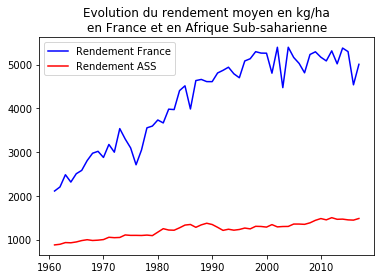

In [165]:
fig = plt.figure()
ax = plt.axes()
plt.plot(rendement_moyen_france,  color='blue', linestyle='solid', label='Rendement France')
plt.plot(rendement_moyen_ass,  color='red', linestyle='solid', label='Rendement ASS')
plt.title("Evolution du rendement moyen en kg/ha\nen France et en Afrique Sub-saharienne")
plt.legend(loc='upper left')

In [166]:
rendement_france_1980 = rendement_moyen_france.loc[1980]
rendement_ass_2017 = rendement_moyen_ass.loc[2017]
ratio_mult = rendement_france_1980 / rendement_ass_2017
print("En développant l'agriculture sub-saharienne des céréales au niveau de rendement de l'agriculture \
française en 1980, on multiplierait son rendement par {:.2f}, pour passer de {:.0f} kg/ha à {:.0f} kg/ha".\
      format(ratio_mult[0], rendement_ass_2017[0], rendement_france_1980[0]))

En développant l'agriculture sub-saharienne des céréales au niveau de rendement de l'agriculture française en 1980, on multiplierait son rendement par 2.52, pour passer de 1481 kg/ha à 3733 kg/ha


In [167]:
# calcul de l'augmentation de la production de céréales dans les pays d'ASS
production_cereales_2013_ass = dataclean[(dataclean.year == YEAR_REFERENCE) &\
                                     (dataclean.country_code.isin(liste_codes_pays_ass)) &\
                                     dataclean.is_cereal][["production_kg","ratio_energie_poids","pourcentage_proteines"]]
production_cereales_2013_ass["augmentation_production_kg"] = \
        production_cereales_2013_ass.production_kg * (ratio_mult[0] - 1)
production_cereales_2013_ass["augmentation_production_kcal"] = \
        production_cereales_2013_ass.augmentation_production_kg * production_cereales_2013_ass.ratio_energie_poids
production_cereales_2013_ass["augmentation_production_kgproteines"] = \
        production_cereales_2013_ass.augmentation_production_kg * production_cereales_2013_ass.pourcentage_proteines
production_supplementaire_kcal = production_cereales_2013_ass.augmentation_production_kcal.sum().sum()
production_supplementaire_kgproteines = production_cereales_2013_ass.augmentation_production_kgproteines.sum().sum()

nombre_humains_nourris_yearref_kcal = production_supplementaire_kcal / (BESOIN_MOYEN_CALORIES_KCAL * 365)
nombre_humains_nourris_yearref_kgproteines = production_supplementaire_kgproteines / (BESOIN_MOYEN_PROTEINES_KG * 365)
pourcentage_humains_nourris_yearref_kcal = nombre_humains_nourris_yearref_kcal / population_mondiale_yearref
pourcentage_humains_nourris_yearref_kgproteines = \
        nombre_humains_nourris_yearref_kgproteines / population_mondiale_yearref

print("{:,.0f} personnes nourries en termes de calories, soit {:,.2%} de la population mondiale".\
      format(nombre_humains_nourris_yearref_kcal, pourcentage_humains_nourris_yearref_kcal))
print("{:,.0f} personnes nourries en termes de protéines, soit {:,.2%} de la population mondiale".\
      format(nombre_humains_nourris_yearref_kgproteines, pourcentage_humains_nourris_yearref_kgproteines))

712,380,068 personnes nourries en termes de calories, soit 10.11% de la population mondiale
855,872,330 personnes nourries en termes de protéines, soit 12.15% de la population mondiale


<a id="sqlalchemy"></a>

---
**<font color=blue>Aller plus loin pour mes connaissances personnelles : utilisation de SQLAlchemy</font>**

In [168]:
# j'importe la librairie sqlalchemy ici plutôt qu'au début de notebook 
# car cette partie est plutôt destinée à un appronfondissement personnel.
import sqlalchemy as db

In [169]:
engine = db.create_engine('sqlite:///fao_alchemy.db', encoding='utf8')
conn_sql = engine.connect()
metadata = db.MetaData()

In [170]:
# création des 4 tables
population = db.Table('population', metadata,
              db.Column('pays', db.String(50), nullable=False), 
              db.Column('code_pays', db.SmallInteger(), nullable=False, primary_key=True),
              db.Column('annee', db.SmallInteger(), nullable=False, primary_key=True),
              db.Column('population', db.Integer())
              )

dispo_alim = db.Table('dispo_alim', metadata,
              db.Column('pays', db.String(50), nullable=False), 
              db.Column('code_pays', db.SmallInteger(), nullable=False, primary_key=True),
              db.Column('annee', db.SmallInteger(), nullable=False, primary_key=True),
              db.Column('produit', db.String(30), nullable=False),
              db.Column('code_produit', db.SmallInteger(), nullable=False, primary_key=True),
              db.Column('origine', db.String(10)),
              db.Column('dispo_alim_tonnes', db.Integer()),
              db.Column('dispo_alim_kcal_p_j', db.Float()),
              db.Column('dispo_prot', db.Float()),
              db.Column('dispo_mat_gr', db.Float())
              )

equilibre_prod = db.Table('equilibre_prod', metadata,
              db.Column('pays', db.String(50), nullable=False), 
              db.Column('code_pays', db.SmallInteger(), nullable=False, primary_key=True),
              db.Column('annee', db.SmallInteger(), nullable=False, primary_key=True),
              db.Column('produit', db.String(30), nullable=False),
              db.Column('code_produit', db.SmallInteger(), nullable=False, primary_key=True),
              db.Column('dispo_int', db.Integer()),
              db.Column('alim_ani', db.Integer()),
              db.Column('semences', db.Integer()),
              db.Column('pertes', db.Integer()),
              db.Column('transfo', db.Integer()),
              db.Column('nourriture', db.Integer()),
              db.Column('autres_utilisations', db.Integer())
              )

sous_nutrition = db.Table('sous_nutrition', metadata,
              db.Column('pays', db.String(50), nullable=False), 
              db.Column('code_pays', db.SmallInteger(), nullable=False, primary_key=True),
              db.Column('annee', db.SmallInteger(), nullable=False, primary_key=True),
              db.Column('nb_personnes', db.Integer())
              )

metadata.create_all(engine)

In [171]:
# insertion des lignes
query = db.insert(population)
ResultProxy = conn_sql.execute(query,table_population.to_dict('records'))

query = db.insert(dispo_alim)
ResultProxy = conn_sql.execute(query,table_dispo_alim.to_dict('records'))

query = db.insert(equilibre_prod)
ResultProxy = conn_sql.execute(query,table_equilibre_prod.to_dict('records'))

query = db.insert(sous_nutrition)
ResultProxy = conn_sql.execute(query,table_sous_nutrition.to_dict('records'))

In [172]:
# requete 1a
# si la définition de la table n'existait pas en mémoire, il faudrait créer un objet db.table avec :
# dispo_alim = db.Table('dispo_alim', metadata, autoload=True, autoload_with = engine)
query = db.select([db.func.max(dispo_alim.columns.annee)])
derniere_annee = conn_sql.execute(query).scalar()  # scalar car un seul résultat

query = db.select([dispo_alim.columns.annee, dispo_alim.columns.pays, \
            db.func.sum(dispo_alim.columns.dispo_prot * 0.001).label('dispo_alimentaire_proteines_kg_habitant_jour')])\
            .where(dispo_alim.columns.annee == derniere_annee).group_by(dispo_alim.columns.pays)\
            .order_by(db.desc('dispo_alimentaire_proteines_kg_habitant_jour')).limit(10)
ResultProxy = conn_sql.execute(query)
ResultSet = ResultProxy.fetchall()
requete1a = pd.DataFrame(ResultSet)
requete1a.columns = ResultSet[0].keys()
requete1a

annee                      pays  \
0   2013                   Islande   
1   2013  Chine - RAS de Hong-Kong   
2   2013                    Israël   
3   2013                  Lituanie   
4   2013                  Maldives   
5   2013                  Finlande   
6   2013                Luxembourg   
7   2013                Monténégro   
8   2013                  Pays-Bas   
9   2013                   Albanie   

   dispo_alimentaire_proteines_kg_habitant_jour  
0                                       0.13306  
1                                       0.12907  
2                                       0.12800  
3                                       0.12436  
4                                       0.12232  
5                                       0.11756  
6                                       0.11364  
7                                       0.11190  
8                                       0.11146  
9                                       0.11137

In [173]:
# requete 1b
query = db.select([dispo_alim.columns.annee, dispo_alim.columns.pays, \
                db.func.sum(dispo_alim.columns.dispo_alim_kcal_p_j).label('dispo_alimentaire_kcal_habitant_jour')])\
                .where(dispo_alim.columns.annee == derniere_annee).group_by(dispo_alim.columns.pays)\
                .order_by(db.desc('dispo_alimentaire_kcal_habitant_jour')).limit(10)
ResultProxy = conn_sql.execute(query)
ResultSet = ResultProxy.fetchall()
requete1b = pd.DataFrame(ResultSet)
requete1b.columns = ResultSet[0].keys()
requete1b

annee                   pays  dispo_alimentaire_kcal_habitant_jour
0   2013               Autriche                                3770.0
1   2013               Belgique                                3737.0
2   2013                Turquie                                3708.0
3   2013  États-Unis d'Amérique                                3682.0
4   2013                 Israël                                3610.0
5   2013                Irlande                                3602.0
6   2013                 Italie                                3578.0
7   2013             Luxembourg                                3540.0
8   2013                 Égypte                                3518.0
9   2013              Allemagne                                3503.0

In [174]:
# requete 2
liste_annees = []
query = db.select([dispo_alim.columns.annee.distinct()])
ResultProxy = conn_sql.execute(query)
ResultSet = ResultProxy.fetchall()
for annee in ResultSet:
    liste_annees.append(annee[0])

if len(liste_annees) == 1:
    query = db.select([dispo_alim.columns.annee, dispo_alim.columns.pays, \
            db.func.sum(dispo_alim.columns.dispo_prot * 0.001).label('dispo_alimentaire_proteines_kg_habitant_jour')])\
            .where(dispo_alim.columns.annee == liste_annees[0]).group_by(dispo_alim.columns.pays)\
            .order_by('dispo_alimentaire_proteines_kg_habitant_jour').limit(10)
else:
    liste_queries = [];
    for i, annee in enumerate(liste_annees):
        inter_query = db.select([db.select([dispo_alim.columns.annee, dispo_alim.columns.pays, \
            db.func.sum(dispo_alim.columns.dispo_prot * 0.001).label('dispo_alimentaire_proteines_kg_habitant_jour')])\
            .where(dispo_alim.columns.annee == liste_annees[i]).group_by(dispo_alim.columns.pays)\
            .order_by('dispo_alimentaire_proteines_kg_habitant_jour').limit(10)])
        liste_queries.append(inter_query);
    query = db.union_all(*liste_queries)

ResultProxy = conn_sql.execute(query)
ResultSet = ResultProxy.fetchall()
requete2 = pd.DataFrame(ResultSet)
requete2.columns = ResultSet[0].keys()
requete2

annee                       pays  \
0    2012                    Libéria   
1    2012              Guinée-Bissau   
2    2012                 Mozambique   
3    2012                      Haïti   
4    2012                 Madagascar   
5    2012                      Congo   
6    2012                   Zimbabwe   
7    2012  République centrafricaine   
8    2012       Sao Tomé-et-Principe   
9    2012                    Ouganda   
10   2013                    Libéria   
11   2013              Guinée-Bissau   
12   2013                 Mozambique   
13   2013  République centrafricaine   
14   2013                 Madagascar   
15   2013                      Haïti   
16   2013                   Zimbabwe   
17   2013                      Congo   
18   2013                    Ouganda   
19   2013       Sao Tomé-et-Principe   

    dispo_alimentaire_proteines_kg_habitant_jour  
0                                        0.03807  
1                                        0.04380  
2                                        0.04692  
3                                        0.04721  
4                                        0.04725  
5                                        0.04949  
6                                        0.05072  
7                                        0.05280  
8                                        0.05304  
9                                        0.05369  
10                                       0.03766  
11                                       0.04405  
12                                       0.04568  
13                                       0.04604  
14                                       0.04669  
15                                       0.04770  
16                                       0.04832  
17                                       0.05141  
18                                       0.05264  
19                                       0.05310

In [175]:
# requete 2 avec le group by
query = db.select([db.func.count(db.func.distinct(dispo_alim.columns.annee))])
nombre_annees = conn_sql.execute(query).scalar()  # scalar car un seul résultat

query = db.select([dispo_alim.columns.annee, dispo_alim.columns.pays, \
            db.func.sum(dispo_alim.columns.dispo_prot * 0.001).label('dispo_alimentaire_proteines_kg_habitant_jour')])\
            .group_by(dispo_alim.columns.pays, dispo_alim.columns.annee)\
            .order_by('dispo_alimentaire_proteines_kg_habitant_jour').limit(nombre_annees)
ResultProxy = conn_sql.execute(query)
ResultSet = ResultProxy.fetchall()
requete2b = pd.DataFrame(ResultSet)
requete2b.columns = ResultSet[0].keys()
requete2b

annee     pays  dispo_alimentaire_proteines_kg_habitant_jour
0   2013  Libéria                                       0.03766
1   2012  Libéria                                       0.03807

In [176]:
# requete 3
query = db.select([equilibre_prod.columns.pays, equilibre_prod.columns.annee, \
                   db.func.sum(equilibre_prod.columns.pertes * 1000).label('pertes_pays_annee')])\
                .group_by(equilibre_prod.columns.pays, equilibre_prod.columns.annee)\
                .order_by(equilibre_prod.columns.pays, equilibre_prod.columns.annee)
ResultProxy = conn_sql.execute(query)
ResultSet = ResultProxy.fetchall()
requete3 = pd.DataFrame(ResultSet)
requete3.columns = ResultSet[0].keys()
requete3.iloc[:,2] = requete3.iloc[:,2].map('{:,.0f}'.format)
requete3.head(20)

pays  annee pertes_pays_annee
0          Afghanistan   2012     1,113,000,000
1          Afghanistan   2013     1,135,000,000
2       Afrique du Sud   2012     1,994,000,000
3       Afrique du Sud   2013     2,193,000,000
4              Albanie   2012       271,000,000
5              Albanie   2013       276,000,000
6              Algérie   2012     2,984,000,000
7              Algérie   2013     3,753,000,000
8            Allemagne   2012     3,734,000,000
9            Allemagne   2013     3,781,000,000
10              Angola   2012     2,796,000,000
11              Angola   2013     4,799,000,000
12  Antigua-et-Barbuda   2012               nan
13  Antigua-et-Barbuda   2013               nan
14     Arabie saoudite   2012       987,000,000
15     Arabie saoudite   2013     1,040,000,000
16           Argentine   2012     2,965,000,000
17           Argentine   2013     3,522,000,000
18             Arménie   2012       213,000,000
19             Arménie   2013       228,000,000

In [177]:
# requete 4
query = db.select([db.func.max(population.columns.annee)])
derniere_annee1 = conn_sql.execute(query).scalar()  # scalar car un seul résultat
query = db.select([db.func.max(sous_nutrition.columns.annee)])
derniere_annee2 = conn_sql.execute(query).scalar()  # scalar car un seul résultat
derniere_annee = min(derniere_annee1, derniere_annee2)

query = db.select([sous_nutrition.columns.annee, sous_nutrition.columns.pays, \
               (1.0 * sous_nutrition.columns.nb_personnes / population.columns.population)\
               .label('proportion_personnes_sous_alimentees')])\
           .where(db.and_(sous_nutrition.columns.annee == population.columns.annee, \
               sous_nutrition.columns.pays == population.columns.pays, sous_nutrition.columns.annee == derniere_annee))\
           .order_by(db.desc('proportion_personnes_sous_alimentees')).limit(10)
ResultProxy = conn_sql.execute(query)
ResultSet = ResultProxy.fetchall()
requete4 = pd.DataFrame(ResultSet)
requete4.columns = ResultSet[0].keys()
requete4.iloc[:,2] = requete4.iloc[:,2].map('{:.2%}'.format)
requete4

annee                                        pays  \
0   2016                   République centrafricaine   
1   2016                                    Zimbabwe   
2   2016                                       Haïti   
3   2016                                      Zambie   
4   2016  République populaire démocratique de Corée   
5   2016                                  Madagascar   
6   2016                                     Ouganda   
7   2016                                       Tchad   
8   2016                                     Libéria   
9   2016                                       Congo   

  proportion_personnes_sous_alimentees  
0                               61.80%  
1                               46.60%  
2                               45.80%  
3                               44.50%  
4                               43.40%  
5                               43.10%  
6                               41.40%  
7                               39.70%  
8                               38.80%  
9                               37.50%

In [178]:
# requete 5
query = db.select([db.func.max(equilibre_prod.columns.annee)])
derniere_annee = conn_sql.execute(query).scalar()  # scalar car un seul résultat

query = db.select([equilibre_prod.columns.annee, equilibre_prod.columns.produit, \
                db.func.avg(1.0 * db.func.coalesce(equilibre_prod.columns.autres_utilisations, 0) / \
                equilibre_prod.columns.dispo_int).label('ratio_autresutilisations_dispointerieure')])\
            .where(db.and_(equilibre_prod.columns.annee == derniere_annee, \
                           equilibre_prod.columns.dispo_int.isnot(None), equilibre_prod.columns.dispo_int > 0))\
            .group_by(equilibre_prod.columns.produit)\
            .order_by(db.desc('ratio_autresutilisations_dispointerieure')).limit(10)
ResultProxy = conn_sql.execute(query)
ResultSet = ResultProxy.fetchall()
requete5 = pd.DataFrame(ResultSet)
requete5.columns = ResultSet[0].keys()
requete5.iloc[:,2] = requete5.iloc[:,2].map('{:.2%}'.format)
requete5

annee                  produit ratio_autresutilisations_dispointerieure
0   2013   Alcool, non Comestible                                  100.00%
1   2013       Plantes Aquatiques                                   92.07%
2   2013           Huile de Palme                                   65.25%
3   2013  Huil Plantes Oleif Autr                                   57.99%
4   2013       Huile de Palmistes                                   54.06%
5   2013  Huile de Colza&Moutarde                                   46.26%
6   2013       Huiles de Poissons                                   40.27%
7   2013            Huile de Coco                                   36.70%
8   2013   Graisses Animales Crue                                   30.48%
9   2013                   Manioc                                   23.68%

In [179]:
# requete 5b
query = db.select([db.func.max(equilibre_prod.columns.annee)])
derniere_annee = conn_sql.execute(query).scalar()  # scalar car un seul résultat

query = db.select([equilibre_prod.columns.annee, equilibre_prod.columns.produit, \
                (1.0 * db.func.sum(equilibre_prod.columns.autres_utilisations) / \
                 db.func.sum(equilibre_prod.columns.dispo_int)).label('ratio_autresutilisations_dispointerieure')])\
            .where(db.and_(equilibre_prod.columns.annee == derniere_annee, \
                           equilibre_prod.columns.dispo_int.isnot(None), equilibre_prod.columns.dispo_int > 0))\
            .group_by(equilibre_prod.columns.produit)\
            .order_by(db.desc('ratio_autresutilisations_dispointerieure')).limit(10)
ResultProxy = conn_sql.execute(query)
ResultSet = ResultProxy.fetchall()
requete5b = pd.DataFrame(ResultSet)
requete5b.columns = ResultSet[0].keys()
requete5b.iloc[:,2] = requete5b.iloc[:,2].map('{:.2%}'.format)
requete5b

annee                  produit ratio_autresutilisations_dispointerieure
0   2013   Alcool, non Comestible                                  100.00%
1   2013  Huil Plantes Oleif Autr                                   73.09%
2   2013       Huile de Palmistes                                   70.37%
3   2013           Huile de Palme                                   69.81%
4   2013                 Girofles                                   61.76%
5   2013  Huile de Colza&Moutarde                                   55.13%
6   2013   Graisses Animales Crue                                   47.02%
7   2013       Huiles de Poissons                                   44.81%
8   2013            Huile de Soja                                   41.62%
9   2013       Plantes Aquatiques                                   37.93%

In [180]:
# fermeture des connexions
conn_sql.close()
engine.dispose()